# Librerias

In [1]:
import sklearn.mixture
import sklearn.feature_extraction.text
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from scipy.stats import shapiro
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import normaltest
import sklearn
from matplotlib.colors import Normalize
import tqdm

### Library versions:
| library name   | library version |
|----------------|-----------------|
| `sklearn`      |   1.0.2         |
| `numpy`        |   1.21.6        |
| `scipy`        |   1.6.3         |
| `pandas`       |   1.3.5         |
| `matplotlib`   |   3.4           |
| `seaborn`      |   0.11.2        |

In [2]:
#plt.ioff()
curr_path=os.getcwd()
base_list=curr_path.split(os.sep)[:-1];
base_path_list=[elem+os.sep for elem in base_list]
base_path=''.join(base_path_list)

phenotypic_path=Path(base_path+'csv-fenotipico')
characterization_path=Path(base_path+'Caracterizaciones')

## Abriendo csv's

In [3]:
phen_csv=pd.read_csv(phenotypic_path/'Table_new_cols.csv')
null_phen_csv=phen_csv[pd.isnull(phen_csv['DSM_IV_TR'])]
subjects_DSM_null=pd.unique(null_phen_csv['SUB_ID'])

#subjects_phen_csv=phen_csv['SUB_ID'].values
phen_csv.head()

,SUB_ID,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,HANDEDNESS_CATEGORY,DSM_IV_TR
0,29006,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,48.0,1.0,NaN
1,29007,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,41.0,1.0,NaN
2,29008,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,59.0,1.0,NaN
3,29009,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,57.0,1.0,NaN
4,29010,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,45.0,1.0,NaN


In [4]:
sample = "adults"

In [5]:
char_csv=pd.read_csv(characterization_path/'21-apr-2021'/f'curvelet_abide_{sample}_sample_male_axial.csv')
bad_log_csv=pd.read_csv(characterization_path/'21-apr-2021'/f'curvelet_abide_{sample}_sample_male_axial-bad-log.csv', na_filter= False)
discard_q_csv=pd.read_csv('discard-q.csv')

In [6]:
display(discard_q_csv)

,ID
0,50133
1,50136
2,50185
3,50192
4,50197
5,50272
6,50273
7,50274
8,50276
9,50277


In [7]:
discarded_quality_b = pd.read_csv(Path(base_path)/'discarded_subjects_quality'/'ABIDE_CHECK_VISUAL - Quality ABIDE.csv')
discarded_quality_b["SUBJECT_ID"] = [int(center.split("_")[-1]) for center in discarded_quality_b["CENTER"].values]
discarded_quality_b.head()

,CENTER,GROUP,DX_GROUP,SUBJECT_ID
0,KKI_50815,CHILDREN,1,50815
1,MaxMun_51352,CHILDREN,1,51352
2,MaxMun_51353,CHILDREN,1,51353
3,Olin_50122,CHILDREN,1,50122
4,Olin_50133,CHILDREN,1,50133


In [8]:
phen_csv[phen_csv['SUB_ID'].isin(discarded_quality_b['SUBJECT_ID'].values)]

,SUB_ID,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,HANDEDNESS_CATEGORY,DSM_IV_TR
154,28764,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,11.608219,2.0,3.0
162,28782,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,10.016438,1.0,3.0
171,28799,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,8.931507,1.0,1.0
173,28802,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,10.304110,1.0,2.0
181,28816,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,10.621918,1.0,2.0
183,28818,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,12.624658,1.0,1.0
188,28823,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,9.183562,1.0,1.0
227,28781,GU_1,ABIDE-II,2,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,10.687671,1.0,0.0
233,28794,GU_1,ABIDE-II,2,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,11.468493,2.0,0.0
290,29599,IP_1,ABIDE-II,2,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,10.150000,1.0,0.0


In [9]:
char_csv.head()

,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,curv_234,curv_235,curv_236,curv_237,curv_238,curv_239,curv_240,curv_241,curv_242,curv_243
0,1,Left Frontal Pole,29007,1,ABIDE-II,BNI_1,41.0,0.600153,0.565616,2.128339,...,5.355379e-19,0.000013,0.221370,1.068919e-19,0.000017,0.231523,0.000353,0.000009,0.223867,3.282888e-10
1,2,Right Frontal Pole,29007,1,ABIDE-II,BNI_1,41.0,1.000760,0.630995,2.380605,...,-3.277652e-19,0.000377,0.313403,-2.856833e-19,0.000348,0.318044,0.000555,0.000340,0.324798,-5.044939e-11
2,3,Left Insular Cortex,29007,1,ABIDE-II,BNI_1,41.0,0.759740,0.599682,2.305480,...,8.169251e-04,0.004860,0.491031,-3.573651e-19,0.004709,0.498993,-0.000221,0.004542,0.504067,2.714414e-07
3,4,Right Insular Cortex,29007,1,ABIDE-II,BNI_1,41.0,0.950301,0.631773,2.426225,...,-6.704851e-19,0.006510,0.521617,1.901886e-20,0.006456,0.521573,0.002723,0.007154,0.549464,7.255717e-11
4,5,Left Superior Frontal Gyrus,29007,1,ABIDE-II,BNI_1,41.0,0.335144,0.522620,1.842251,...,6.698151e-04,0.002305,0.434994,1.004651e-19,0.001478,0.413365,-0.000205,0.001276,0.415128,2.123432e-11


In [10]:
len(np.unique(char_csv['subject_id'].values))

448

In [11]:
display(bad_log_csv)

,bad_log_cell1,bad_log_cell2,bad_log_cell3,bad_log_cell4


In [12]:
char_csv=char_csv.dropna()
discarded_subjects=bad_log_csv['bad_log_cell2'].values.tolist()+discard_q_csv['ID'].values.tolist()+discarded_quality_b["SUBJECT_ID"].values.tolist()
print(discarded_subjects)

for subject in discarded_subjects:
    char_csv=char_csv.query('subject_id!=@subject')

#char_csv=char_csv[~char_csv.subject_id.isin(subjects_DSM_null)]
    
regions=pd.unique(char_csv['region_name'])
region_idx=pd.unique(char_csv['region_index'])


regions_dataframe=pd.DataFrame(data={'index':region_idx, 'region':regions}).set_index('index')
pd.options.display.max_rows=200
display(regions_dataframe)

#region_list=['Left Amygdala', 'Right Amygdala', 'Left Frontal Pole', 'Right Frontal Pole', 
#             'Left Frontal Medial Cortex', 'Right Frontal Medial Cortex', 'Left Cingulate Gyrus, anterior division', 
#             'Right Cingulate Gyrus, anterior division', 'Left Superior Temporal Gyrus, anterior division', 
#             'Left Supracalcarine Cortex', 
#             'Right Temporal Fusiform Cortex, anterior division',
#            'Right Supramarginal Gyrus, anterior division',
#            'Left Angular Gyrus',
#            'Left Juxtapositional Lobule Cortex']

#region_list=['Right Amygdala', 'Left Frontal Pole', 'Right Frontal Pole', 
           #  'Left Frontal Medial Cortex', 'Right Frontal Medial Cortex', 'Left Cingulate Gyrus, anterior division', 
            # 'Right Cingulate Gyrus, anterior division']

#region_idx=[106,116,1,2,49,50,57,58,17,93,74,38,41,51]

#region_list=['left frontal medial cortex']
#region_idx=[49]

region_idx, region_list = zip(*[(k,v) for k,v in regions_dataframe.to_dict()['region'].items()])

[50133, 50136, 50185, 50192, 50197, 50272, 50273, 50274, 50276, 50277, 50283, 50287, 50288, 50299, 50303, 50309, 50327, 50328, 51213, 51296, 51353, 50815, 51352, 51353, 50122, 50133, 50136, 51213, 51296, 51312, 51314, 50272, 50273, 50274, 50276, 50277, 50283, 50287, 50288, 50299, 50303, 50313, 50317, 50322, 50323, 50327, 50328, 50371, 50618, 28764, 28781, 28782, 28794, 28799, 28802, 28816, 28818, 28823, 29599, 29398, 29102, 29741, 29742, 29751]


,region
index,
1,Left Frontal Pole
2,Right Frontal Pole
3,Left Insular Cortex
4,Right Insular Cortex
5,Left Superior Frontal Gyrus
6,Right Superior Frontal Gyrus
7,Left Middle Frontal Gyrus
8,Right Middle Frontal Gyrus
9,Left Inferior Frontal Gyrus (pars triangularis)


In [13]:
def get_feature_number(i):
    features={'alphas':np.arange(243)[0::3], 'betas':np.arange(243)[1::3], 'mu':np.arange(243)[2::3]}
    if np.isin(i, features['alphas']):
        return ['alpha', np.where(features['alphas']==i)[0]+1]
    if np.isin(i, features['betas']):
        return ['beta', np.where(features['betas']==i)[0]+1]
    if np.isin(i, features['mu']):
        return ['mu', np.where(features['mu']==i)[0]+1]

In [14]:
c_u=[['#002626ff', '#0e4749ff', '#95c623ff', '#e55812ff', '#efe7daff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#ffb997ff','#f67e7dff','#843b62ff','#0b032dff','#74546aff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff'],
['#2191fbff','#ba274aff','#841c26ff','#b2ece1ff','#8cdedcff'],
['#0081a7ff','#00afb9ff','#f07167ff','#fed9b7ff','#fdfcdcff'],
['#ba2d0bff','#d5f2e3ff','#73ba9bff','#003e1fff','#01110aff'],
['#de541eff','#494331ff','#d6d6b1ff','#878472ff','#3f3f37ff'],
['#7ebdc2ff','#bb4430ff','#f3dfa2ff','#efe6ddff','#231f20ff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#ffb997ff','#f67e7dff','#843b62ff','#0b032dff','#74546aff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff']]

c_i=[['#95c623', '#e55812'], 
        ['#0A2463', '#D8315B'],
        ['#377771', '#ED6A5E'],
        ['#D00000', '#136F63'],
        ['#E5446D', '#706C61'],
        ['#70163C', '#307351'],
        ['#311847', '#E03616'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9'],
        ['#b9314f', '#8ec75f'],
        ['#494331', '#71c6d9'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9'],
        ['#b9314f', '#8ec75f'],
        ['#494331', '#71c6d9']]

colors = [c_i[m] for m in np.random.choice(a=np.arange(len(c_i)), size=len(region_idx), replace=True)]

In [15]:
def cluster_data(feature_matrix, n_components):
    #clustering_model=sklearn.mixture.BayesianGaussianMixture(n_components=n_components, max_iter=1000, 
    #                                                            init_params='kmeans', weight_concentration_prior_type='dirichlet_process')
    clustering_model=sklearn.cluster.KMeans(n_clusters=n_components)
    features_prep=(feature_matrix-np.mean(feature_matrix))/np.var(feature_matrix)
    clustering_model.fit(features_prep)
    return clustering_model.predict(features_prep)

## Bullseye plot code

In [16]:
def bulls_eye(ax, data, cmap=None, norm=None, raidal_subdivisions=(2, 8, 8, 11),
              centered=(True, False, False, True), add_nomenclatures=True, cell_resolution=128,
              pfi_where_to_save=None, colors_bound='-k'):
    """
    Clockwise, from smaller radius to bigger radius.
    :param ax:
    :param data:
    :param cmap:
    :param norm:
    :param raidal_subdivisions:
    :param centered:
    :param add_nomenclatures:
    :param cell_resolution:
    :param pfi_where_to_save:
    :return:
    """
    line_width = 1.5
    data = np.array(data).ravel()

    if cmap is None:
        cmap = plt.cm.viridis

    if norm is None:
        norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())

    theta = np.linspace(0, 2*np.pi, 768)
    r = np.linspace(0, 1, len(raidal_subdivisions)+1)

    nomenclatures = []
    if isinstance(add_nomenclatures, bool):
        if add_nomenclatures:
            nomenclatures = range(1, sum(raidal_subdivisions)+1)
    elif isinstance(add_nomenclatures, list) or isinstance(add_nomenclatures, tuple):
        assert len(add_nomenclatures) == sum(raidal_subdivisions)
        nomenclatures = add_nomenclatures[:]
        add_nomenclatures = True


    # Create the circular bounds
    line_width_circular = line_width
    for i in range(r.shape[0]):
        if i == range(r.shape[0])[-1]:
            line_width_circular = int(line_width / 2.)
        ax.plot(theta, np.repeat(r[i], theta.shape), colors_bound, lw=line_width_circular)

    # iterate over cells divided by radial subdivision
    for rs_id, rs in enumerate(raidal_subdivisions):
        for i in range(rs):
            cell_id = sum(raidal_subdivisions[:rs_id]) + i
            theta_i = - i * 2 * np.pi / rs + np.pi / 2
            if not centered[rs_id]:
                theta_i += (2 * np.pi / rs) / 2
            theta_i_plus_one = theta_i - 2 * np.pi / rs  # clockwise
            # Create colour fillings for each cell:
            theta_interval = np.linspace(theta_i, theta_i_plus_one, cell_resolution)
            r_interval = np.array([r[rs_id], r[rs_id+1]])
            angle  = np.repeat(theta_interval[:, np.newaxis], 2, axis=1)
            radius = np.repeat(r_interval[:, np.newaxis], cell_resolution, axis=1).T
            z = np.ones((cell_resolution, 2)) * data[cell_id]
            ax.pcolormesh(angle, radius, z, cmap=cmap, norm=norm)

            # Create radial bounds
            if rs  > 1:
                ax.plot([theta_i, theta_i], [r[rs_id], r[rs_id+1]], colors_bound, lw=line_width)
            # Add centered nomenclatures if needed
            if add_nomenclatures:
                if rs == 1 and rs_id ==0:
                    cell_center = (0, 0)
                else:
                    cell_center = ((theta_i + theta_i_plus_one) / 2., r[rs_id] + .5 * r[1] )

                if isinstance(nomenclatures[0], (int, float, complex)):
                    ax.annotate(r"${:.3g}$".format(nomenclatures[cell_id]), xy=cell_center,
                                xytext=(cell_center[0], cell_center[1]),
                                horizontalalignment='center', verticalalignment='center', size=8)
                else:
                    ax.annotate(nomenclatures[cell_id], xy=cell_center,
                                xytext=(cell_center[0], cell_center[1]),
                                horizontalalignment='center', verticalalignment='center', size=12)

    ax.grid(False)
    ax.set_ylim([0, 1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    if pfi_where_to_save is not None:
        plt.savefig(pfi_where_to_save, format='pdf', dpi=200)

# Clusterizacion y visualizacion

#### TODO
Sub bandas significativas p<0.05 en clases 0 - Control y [1,2,3] - Autismo General | la dimension del espacio van a ser los que salieron significativos y la cantidad de clusters, las 2 clases

y ahi dentro hacer el experimento solo en [1,2,3] 3 clusters

Para graficar usamos como ejes las caracteristicas significativas, los colores son o las clases o los clúster

Probar diferentes estrategias de clustering!

In [17]:
def balance_classes_DSM(dataframe, num_class):
    features_merge=dataframe
    if num_class['CONTROL'] > num_class['ASD']:
        np.random.seed(94)
        ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
        print(ctrl_index)
        print(num_class['CONTROL'])
        ctrl_dataframe=features_merge[features_merge['DSM_IV_TR']==0].iloc[ctrl_index,:]
        asd_dataframe=features_merge[features_merge['DSM_IV_TR']!=0]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    else:
        np.random.seed(94)
        asd_index=(np.random.permutation(num_class['ASD'])[0:num_class['CONTROL']])
        ctrl_dataframe=features_merge[features_merge['DSM_IV_TR']==0]
        asd_dataframe=features_merge[features_merge['DSM_IV_TR']!=0].iloc[asd_index,:]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    return features_balanced

In [18]:
def balance_classes(dataframe, num_class):
    features_merge=dataframe
    if num_class['CONTROL'] > num_class['ASD']:
        np.random.seed(94)
        ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
        ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
        asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    else:
        np.random.seed(94)
        asd_index=(np.random.permutation(num_class['ASD'])[0:num_class['CONTROL']])
        ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2]
        asd_dataframe=features_merge[features_merge['DX_GROUP']==1].iloc[asd_index,:]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    return features_balanced

before dropna: 2207
after dropna: 1314
after 999 1314
after QA:  1271
{'ASD': 159, 'CONTROL': 167}
{'ASD': 159, 'CONTROL': 167}


,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,DSM_IV_TR
0,50,Right Frontal Medial Cortex,29588,1,ABIDE-II,IP_1,19.7100,1.545263,0.728382,2.831268,...,IP_1,ABIDE-II,1,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,19.7100,1.0
1,50,Right Frontal Medial Cortex,29595,1,ABIDE-II,IP_1,27.3600,1.847855,0.754174,2.995418,...,IP_1,ABIDE-II,1,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,27.3600,1.0
2,50,Right Frontal Medial Cortex,29627,1,ABIDE-II,IP_1,21.1200,10.186954,8.068037,3.190931,...,IP_1,ABIDE-II,1,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,21.1200,1.0
3,50,Right Frontal Medial Cortex,29580,2,ABIDE-II,IP_1,24.2600,2.120739,0.799758,3.110478,...,IP_1,ABIDE-II,2,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,24.2600,0.0
4,50,Right Frontal Medial Cortex,29583,2,ABIDE-II,IP_1,22.4600,2.199945,0.815707,3.070616,...,IP_1,ABIDE-II,2,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,22.4600,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,50,Right Frontal Medial Cortex,50508,1,ABIDE-I,USM,26.3792,1.039419,0.670175,2.425260,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,26.3792,1.0
322,50,Right Frontal Medial Cortex,50514,1,ABIDE-I,USM,21.4018,1.330930,0.697731,2.698310,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,21.4018,1.0
323,50,Right Frontal Medial Cortex,50525,1,ABIDE-I,USM,32.8487,1.927798,0.867815,2.366528,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,32.8487,1.0
324,50,Right Frontal Medial Cortex,50529,1,ABIDE-I,USM,42.3354,1.522176,0.751185,2.545887,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,42.3354,1.0


datos de ASD: mean: -0.06728009184891712  std: 0.9442676216693663
datos de Control: mean: 0.06405709343699342  std: 1.0463052835425966


(array([ 2.,  0.,  4., 10., 14., 17., 21., 13., 16., 13., 16.,  8., 10.,
         4.,  3.,  4.,  3.,  0.,  2.,  0.,  1.,  0.,  3.,  0.,  0.,  1.,
         0.,  1.,  0.,  1.]),
 array([-1.88140487, -1.66453398, -1.44766309, -1.2307922 , -1.01392131,
        -0.79705042, -0.58017953, -0.36330864, -0.14643775,  0.07043314,
         0.28730403,  0.50417492,  0.72104581,  0.9379167 ,  1.15478759,
         1.37165848,  1.58852937,  1.80540026,  2.02227115,  2.23914204,
         2.45601293,  2.67288382,  2.88975471,  3.10662561,  3.3234965 ,
         3.54036739,  3.75723828,  3.97410917,  4.19098006,  4.40785095,
         4.62472184]),
 <BarContainer object of 30 artists>)

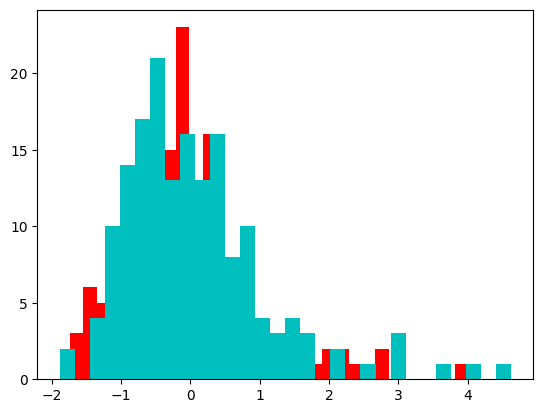

In [19]:
from matplotlib import pyplot as plt

features=char_csv[char_csv['region_index']==50]
phen_csv['subject_id']=phen_csv['SUB_ID']
#remover columna de handedness antes de merge
phen_csv = phen_csv.drop(columns='HANDEDNESS_CATEGORY')
print('before dropna:', len(phen_csv))
phen_csv=phen_csv.query('DSM_IV_TR>=0 & DSM_IV_TR<=4 & GENERO==1').dropna()
print('after dropna:', len(phen_csv))
phen_csv=phen_csv[phen_csv!=-9999]
print('after 999', len(phen_csv))

for sub in (discard_q_csv['ID'].values.tolist()+discarded_quality_b["SUBJECT_ID"].values.tolist()):
    phen_csv = phen_csv.query('subject_id!=@sub')
print('after QA: ', len(phen_csv))

features_merge=features.merge(phen_csv, on='subject_id')

#print(len(np.unique(features_merge['subject_id'])))

#print(f'{sample}: ', len(phen_csv.query('EDAD>=19')))
#print(f'{sample} ASD: ', len(phen_csv.query('EDAD>=19').query('DX_GROUP==1')))
#print(f'{sample} control: ', len(phen_csv.query('EDAD>=19').query('DX_GROUP==2')))

#print(np.shape(features_merge))

num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}

print(num_class)

#features_balanced=balance_classes(features_merge, num_class)
features_balanced = features_merge
num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}
print(num_class_balanced)

#features_balanced.iloc[:,:-4].to_csv('children_region_50.csv')

display(features_balanced)

pd.concat([features_balanced.iloc[:, 0:7], features_balanced.iloc[:, -5:]], axis=1).to_csv(f'{sample}_group.csv')

feature_matrix_p=features_balanced.iloc[:,7:250].values.astype(float)

feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)



asd_index=np.where(features_balanced['DX_GROUP']==1)

control_index=np.where(features_balanced['DX_GROUP']==2)

subband=33

#0 alpha, 1 beta, 2 mu
feature=(subband-1)*3 + (1)

asd_row=feature_matrix_p[asd_index,feature].squeeze()

control_row=feature_matrix_p[control_index, feature].squeeze()

#w_value, p_value=scipy.stats.wilcoxon(asd_row, control_row)

print('datos de ASD: mean: '+str(np.mean(asd_row))+ '  '+'std: '+str(np.std(asd_row)))
print('datos de Control: mean: '+str(np.mean(control_row))+ '  '+'std: '+str(np.std(control_row)))

plt.hist(asd_row, bins=30, color='r')
plt.hist(control_row, bins=30, color='c')

#print(p_value)


In [20]:
#descartar el centro IP en todas sus presentaciones...
#discard_centers = ['IP_1']
#for center in discard_centers:
#    char_csv = char_csv[char_csv['site_id']!=center]

char_csv['site_id'].unique()

array(['BNI_1', 'ETH_1', 'IP_1', 'IU_1', 'KUL_3', 'NYU_1', 'ONRC_2',
       'TCD_1', 'USM_1', 'Caltech', 'CMU', 'Leuven', 'MaxMun', 'NYU',
       'Olin', 'Pitt', 'SBL', 'Trinity', 'UM', 'USM'], dtype=object)

phen_csv = phen_csv.dropna()

#char_DSM = char_csv.merge(phen_csv.dropna(), on='subject_id')

sub_ids = pd.unique(char_csv['subject_id'])

phen_csv_merged = phen_csv[phen_csv['subject_id'].isin(sub_ids)]

num_class={'ASD':(phen_csv_merged['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(phen_csv_merged['DX_GROUP']==1).value_counts()[0]}

phen_csv_balanced = balance_classes(phen_csv_merged, num_class)

char_DSM = char_csv.merge(phen_csv_balanced.dropna(), on='subject_id') 

char_DSM.iloc[:,0:250].to_csv('adults_curvelet_sample.csv', index=False)

print(np.unique(char_DSM['subject_id']).shape)

display(char_DSM.iloc[7600:7610, :250])
#display(phen_csv_balanced[['subject_id','DX_GROUP', 'DSM_IV_TR']].values)


In [21]:
def get_quartiles(features):
    return np.array([np.percentile(features, 25), np.percentile(features, 75)] )

In [22]:
def compare_quartiles(quartiles):
    return [np.where(quartiles[:,0]==np.min(quartiles[:,0]))[0].squeeze()+1, np.where(quartiles[:,1]==np.max(quartiles[:,1]))[0].squeeze()+1]
    

# Probando false discovery rate

In [23]:
def run_statistical_test(data_A, data_B):
    _, p_shap_c1 = normaltest(data_A)
    _, p_shap_c2 = normaltest(data_B)
    
    if (p_shap_c1>0.05 and p_shap_c2>0.05):
        t_value, p_value=scipy.stats.ttest_ind(data_A, data_B, equal_var=False)
        test='t-test'         
    else:
        w_value, p_value=scipy.stats.mannwhitneyu(data_A, data_B)
        test='wilcoxon'
    
    return p_value, test
    

idx = region_idx[-4]
region_name = region_list[-4]

features=char_csv[char_csv['region_index']==idx]
phen_csv['subject_id']=phen_csv['SUB_ID']
phen_csv=phen_csv.dropna()
phen_csv=phen_csv[phen_csv!=-9999]
features_merge=features.merge(phen_csv.dropna(), on='subject_id')
    
    
    #TODO hacer funcion que balancee las clases
num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}
    
print(num_class)
    #np.random.seed(94)
    #ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
    #ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
    #asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
    
    #features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
features_balanced=balance_classes(features_merge, num_class)
num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}

feature_matrix_p=features_balanced.iloc[:,7:250].values
    
feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)
    
dx_group=features_balanced['DX_GROUP'].values
    
subject_idx = features_balanced['subject_id'].values
    
sub_bands_region=[]

asd_idx = np.where(dx_group==1)[0].tolist()
ctrl_index = np.where(dx_group==2)[0].tolist()
class_k = len(features_balanced)

print(ctrl_index)
num_samples = 100

p_vals = []

for k in tqdm.tqdm(range(len(feature_matrix_p.T))):
    feature_vector = feature_matrix_p[:,k]
    asd_features = feature_vector[asd_idx]
    ctrl_features = feature_vector[ctrl_index]
    
    for j in range(num_samples):
        asd_sample = np.random.choice(asd_features, size=class_k * 70 // 100, replace=True)
        ctrl_sample = np.random.choice(ctrl_features, size=class_k * 70 // 100, replace=True)
        p_value, _ = run_statistical_test(asd_sample, ctrl_sample)
        p_vals.append(p_value)

print(len(p_vals))

p_vals_sort = np.sort(p_vals)
rank = [i+1 for i in range(len(p_vals))]
num_tests = len(p_vals)

q_vals = [p_vals_sort[-1]]

for j, r in enumerate(rank[::-1]):
    
    if r == num_tests:
        continue
        
    i = r-1
    p_val = p_vals_sort[i]
    
    pr = p_val * (num_tests/r)
    
    if pr < q_vals[j-1]:
        q_vals.append(pr)
    else:
        q_vals.append(q_vals[j-1])
    

In [24]:
def generate_q_values(p_vals):
    p_vals_sort = np.sort(p_vals)
    rank = [i+1 for i in range(len(p_vals))]
    num_tests = len(p_vals)

    q_vals = [p_vals_sort[-1]]

    for j, r in enumerate(rank[::-1]):

        if r == num_tests:
            continue

        i = r-1
        p_val = p_vals_sort[i]

        pr = p_val * (num_tests/r)

        if pr < q_vals[j-1]:
            q_vals.append(pr)
        else:
            q_vals.append(q_vals[j-1])
    
    return q_vals

In [25]:
def false_discovery_rate(feature_matrix_p, dx_group, k_partition, num_samples):
    p_vals=[]
    asd_idx = np.where(dx_group==1)[0].tolist()
    ctrl_index = np.where(dx_group==2)[0].tolist()
    class_k = len(features_balanced)
    
    for k in tqdm.tqdm(range(len(feature_matrix_p.T))):
        feature_vector = feature_matrix_p[:,k]
        asd_features = feature_vector[asd_idx]
        ctrl_features = feature_vector[ctrl_index]

        for j in range(num_samples):
            asd_sample = np.random.choice(asd_features, size=class_k * k_partition // 100, replace=True)
            ctrl_sample = np.random.choice(ctrl_features, size=class_k * k_partition // 100, replace=True)
            p_value, _ = run_statistical_test(asd_sample, ctrl_sample)
            p_vals.append(p_value)
    
    q_vals = generate_q_values(p_vals)
    
    return q_vals, np.sort(p_vals)[::-1]
    

In [26]:
def map_p_q(p_vals_asc, q_vals, p_val):
    #p_vals asc, p_values en orden ascendente
    #q vals, q values en orden ascendente
    dif = np.abs(p_vals_asc - p_val)
    dif_idx = np.where(dif == dif.min())[0][0]
    return q_vals[dif_idx]

q_vals, p_vals_asc = false_discovery_rate(feature_matrix_p, dx_group, 70, 100)

map_p_q(p_vals_asc, q_vals, )

plt.plot(p_vals_asc, q_vals)

In [27]:

#phen_csv=phen_csv.drop(columns='HANDEDNESS_CATEGORY')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import normaltest
import sklearn
from matplotlib.colors import Normalize

regions_subbands=[]

for i, idx in enumerate(region_idx):
    region_name=region_list[i]
    print(region_name)
    features=char_csv[char_csv['region_index']==idx]
    phen_csv['subject_id']=phen_csv['SUB_ID']
    phen_csv=phen_csv.dropna()
    phen_csv=phen_csv[phen_csv!=-9999]
    features_merge=features.merge(phen_csv.dropna(), on='subject_id')
    
    
    #TODO hacer funcion que balancee las clases
    num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}
    
    print(num_class)
    #np.random.seed(94)
    #ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
    #ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
    #asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
    
    #features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    
    #no vamos a balancear clases...
    features_balanced = features_merge
    #features_balanced=balance_classes(features_merge, num_class)
    
    num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}
    
    print('balanced')
    print(num_class_balanced)

    feature_matrix_p=features_balanced.iloc[:,7:250].values
    
    feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)
    
    dx_group=features_balanced['DX_GROUP'].values
    
    subject_idx = features_balanced['subject_id'].values
    
    sub_bands_region=[]
    
    q_vals, p_vals_asc = false_discovery_rate(feature_matrix_p, dx_group, 70, 100)
    
    for k, feature_group in enumerate(np.arange(243).reshape(81,3)):
        
        significative_features={}
        feature_labels=['alpha', 'beta', 'mu']
        sig_features_list=[]
        sig_features_labels=[]
        for j, feat in enumerate(feature_group):
                #dsm=features_balanced['DSM_IV_TR'].values
                feature_matrix=feature_matrix_p[:, feat].reshape(-1,1)
                feature_vector=feature_matrix.reshape(-1)
                # 1 probamos con shappiro...
                _, p_shap_c1 = normaltest(feature_vector[np.where(dx_group==1)])
                _, p_shap_c2 = normaltest(feature_vector[np.where(dx_group==2)])
                
                if (p_shap_c1>0.05 and p_shap_c2>0.05):
                    
                    t_value, p_value=scipy.stats.ttest_ind(feature_vector[np.where(dx_group==1)], 
                                                   feature_vector[np.where(dx_group==2)], equal_var=False)
                    test='t-test'
                    
                else:
                    w_value, p_value=scipy.stats.mannwhitneyu(feature_vector[np.where(dx_group==1)], 
                                                   feature_vector[np.where(dx_group==2)])
                    
                    test='wilcoxon'
                    
                
                print('caracteristica numero: ' + str(feat+1))
                print('sub-banda: ' + str(k+1))
                print(test+': '+str(p_value))
            
                q_value = map_p_q(p_vals_asc, q_vals, p_value)
                
                if q_value<0.05:
                    #significative_features[feature_labels[j]]=p_value
                    #sig_features_list.append(feat)
                    #sig_features_labels.append(feature_labels[j])
                    
                    fig, axs = plt.subplots(2,2,figsize=(10,10), dpi=200)
                    
                    sub_bands_region.append(k+1)
                    
                    #asd=(np.std(feature_vector[np.where(dx_group==1)])/np.shape(feature_vector[np.where(dx_group==1)])[0])**-1*feature_vector[np.where(dx_group==1)]
                    #control=(np.std(feature_vector[np.where(dx_group==2)])/np.shape(feature_vector[np.where(dx_group==2)])[0])**-1*feature_vector[np.where(dx_group==2)]
                    
                    asd=feature_vector[np.where(dx_group==1)]
                    
                    control=feature_vector[np.where(dx_group==2)]
                    
                    print('quartiles')
                    quartiles = np.array([get_quartiles(asd), get_quartiles(control)])
                    comparison = compare_quartiles(quartiles)
                    quartile_idx = np.array(comparison)-1
                    comp_values = [row[comp] for row,comp in zip(quartiles.T, quartile_idx)]
                    
                    print(comparison)
                    print(comp_values)
                    
                    val_idx=0
                    comp_dict = {}
                    for comp,val in zip(comparison, comp_values):
                        features = feature_vector[np.where(dx_group==comp)]
                        subs_idx_df = subject_idx[np.where(dx_group==comp)]
                        sub_idx = (np.where(np.abs(features)>=abs(val))[0]).squeeze()
                        subs = subs_idx_df[sub_idx]
                        comp_dict[comp]=subs
                    
                    feature_concat=[*asd.reshape(-1).tolist(), *control.reshape(-1).tolist()]
                    #print(concat)
                    
                    asd_dx=1*np.ones(np.shape(feature_vector[np.where(dx_group==1)]))
                    ctrl_dx=2*np.ones(np.shape(feature_vector[np.where(dx_group==2)]))
                    
                    concat_dx=[*asd_dx.tolist(), *ctrl_dx.tolist()]
                    #print(concat_dx)
                    
                    scatter_dataframe_dx_group=pd.DataFrame(data={feature_labels[j]:feature_concat,
                                                'dx_group':concat_dx})
                    
                    
                    sns.boxplot(x='dx_group', y=feature_labels[j], data=scatter_dataframe_dx_group, palette=colors[i], ax=axs[0][0])
                    sns.distplot(scatter_dataframe_dx_group[feature_labels[j]], ax=axs[0][1], color='0.23', kde=False)
                    sns.distplot(scatter_dataframe_dx_group[scatter_dataframe_dx_group['dx_group']==1][feature_labels[j]], color=colors[i][0], ax=axs[1][0], kde=False)
                    sns.distplot(scatter_dataframe_dx_group[scatter_dataframe_dx_group['dx_group']==2][feature_labels[j]], color=colors[i][1], ax=axs[1][1], kde=False)
                    axs[1][0].set_title('Distribution '+feature_labels[j]+' '+'ASD')
                    axs[0][1].set_title('Comparison '+feature_labels[j]+' '+'ASD vs Controls')
                    axs[1][1].set_title('Distribution '+feature_labels[j]+' '+'Controls')
                    axs[0][0].set_title('Differences distribution ASD vs Controls')
                
                    #axs[0][1].hist(feature_concat)
                    #axs[1][0].hist(asd)
                    #axs[1][1].hist(control)
                    
                    fig.suptitle('Region: '+region_name+' Sub-band: '+str(k+1)+'\n Feature: '+feature_labels[j]+', Test: '+test+' P-value: '+str(np.round(p_value, decimals=4))+' Q-value: '+str(np.round(q_value, decimals=4)), fontsize=16)
                    
                    if not os.path.exists(os.getcwd()+f'/results_{sample}/'+region_name+'/1-sig'):
                        os.makedirs(os.getcwd()+f'/results_{sample}/'+region_name+'/1-sig')
                    fig.savefig(os.getcwd()+f'/results_{sample}/'+region_name+'/1-sig/'+'feature'+str(feat+1)+'-subband'+str(k+1)+'.pdf')
                    plt.close(fig)
                    pd.DataFrame.from_dict(comp_dict, orient='index').transpose().to_csv(os.getcwd()+f'/results_{sample}/'+region_name+'/1-sig/'+'subjects-feature'+str(feat+1)+'-subband'+str(k+1)+'.csv',index=False)
        feature_matrix_list=np.array(sig_features_list)
    regions_subbands.append(np.unique(sub_bands_region))

    fig,axs=plt.subplots(1,1, figsize=(5,5), dpi=200, subplot_kw=dict(projection='polar'))

    curv_bands=np.zeros(81)
    
    if not os.path.exists(os.getcwd()+f'/results_{sample}/'+region_name):
        os.makedirs(os.getcwd()+f'/results_{sample}/'+region_name)
        
    if not np.unique(sub_bands_region).size == 0:
        curv_bands[[subband-1 for subband in np.unique(sub_bands_region)]]=1
    
    fig.suptitle('Discriminant Subbands \n Region: '+region_name, fontsize=14)
    
    bulls_eye(axs, curv_bands, cmap='RdBu', norm=Normalize(vmin=-1.6, vmax=1.6), raidal_subdivisions=(1,16,32,32),
    centered=(True, True, True, True), add_nomenclatures=False, cell_resolution=16,
              pfi_where_to_save=os.getcwd()+f'/results_{sample}/'+region_name+'/sub-bands-plot.pdf', colors_bound='0.20')
    
    plt.tight_layout()
    plt.close(fig)
    

Left Frontal Pole
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.49it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3612829950228046
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.342956820149512
caracteristica numero: 3
sub-banda: 1
t-test: 0.7660886848558833
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.15656750231335836
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.1571321631876464
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.33051223397825225
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.17743146402564125
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.13609976890283265
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.41850084284328404
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.40113784941751995
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.34642072888040654
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.41850084284328404
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.1379045632448202
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.08933077558536667
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.

caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.24655353591936452
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.2689423340195565
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.1681148279294279
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.12011233722542192
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.11501363260793085
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.16723022941332577
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.22309283848121042
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.2439651061540794
caracteristica numero: 225
sub-banda: 75
t-test: 0.9318284772344154
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.265077003748928
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.2910975242129963
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.26200518735837175
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.3195116588226204
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.35996277090014794
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Frontal Pole
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.65it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.49812401912945253
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4967170584308073
caracteristica numero: 3
sub-banda: 1
t-test: 0.8954086002719577
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.20931121719195234
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2540293957291584
caracteristica numero: 6
sub-banda: 2
t-test: 0.8702610039277502
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.39478792783923006
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.33821546812431075
caracteristica numero: 9
sub-banda: 3
t-test: 0.36214465966738707
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.3216152398285127
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.24990301595628084
caracteristica numero: 12
sub-banda: 4
t-test: 0.3621446596673841
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3481575339517321
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3893672263418913
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.20897322

caracteristica numero: 120
sub-banda: 40
wilcoxon: 0.31993191348301286
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.2517742214554092
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.18205431703398212
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.4564700219797533
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.16605544087373375
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.09920277344208878
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.21407683248422948
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.3086676644235512
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.2681670098533302
caracteristica numero: 129
sub-banda: 43
t-test: 0.691415409540109
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.4518111011314626
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.4116260358333455
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.21717350521634993
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.27636358024704055
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Insular Cortex
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.60it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2536527988043936
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.38262161953461804
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.1999694613174131
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.15432223362020675
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.15544219315108987
caracteristica numero: 6
sub-banda: 2
t-test: 0.5554853797287644
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.12153012740577496
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.16752476162116225
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.2359263628213079
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.42079809887241754
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4304751693723477
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.2359263628213079
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.13304359066103721
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.14744362134792133
caracteristica numero: 15
sub-banda: 5
t-test: 0.98

caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.10743979471431137
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.29029179632533997
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.24175817421172902
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.36569560758416897
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.48031012895965486
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.001795821910033734
quartiles
[2, 1]
[-3.5220794627340705e-19, 3.71639413028911e-19]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.3683517743738498
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.3875650420493332
caracteristica numero: 168
sub-banda: 56
t-test: 0.9047553538421431
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.09028378270018428
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.09143733368014606
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.29473616113212076
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.1571321631876464
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.12707380231403365
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.3326450035250562
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.07278010201474747
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.04413252332245642
caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.0039298996306029585
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.04546480753824198
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.03511491012448352
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.136871262891059
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.1107356743879368
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.014688556576273057
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.4751592354668942
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.4976550287730604
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.3674656789021654
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.2137343511932589
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.1719828034711674
caracteristica numero: 240
sub-banda: 80
t-test: 0.7298021793613481
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.37635764315677334
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.24212524214888376
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.39932083971435345


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Insular Cortex
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.68it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.09777457122313227
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.23810415950458874
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.020458496985486213
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.04145802282328222
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.09279690843894184
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.024604251980036785
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.021465280455479855
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.014601331303934796
quartiles
[1, 2]
[-0.8329874927032532, 0.5964536412654795]
caracteristica numero: 9
sub-banda: 3
t-test: 0.2964634110616562
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.02057482596274982
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.015266519610709553
quartiles
[1, 2]
[-0.7777833066239528, 0.589961650322768]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 12
sub-banda: 4
t-test: 0.29646341106165575
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.027001653372546817
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.02951195392458622
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.12415983256767704
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.0015432569447065014
quartiles
[1, 2]
[-0.8308616250693501, 0.6112913063464627]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.0018025921863343171
quartiles
[1, 2]
[-0.8909673602173158, 0.7802322871132662]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 18
sub-banda: 6
t-test: 0.8636545080543518
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.008317001498318693
quartiles
[1, 2]
[-0.7990156119944765, 0.619626693058568]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.008614882717437171
quartiles
[1, 2]
[-0.8091032773224064, 0.6946182974649491]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 21
sub-banda: 7
t-test: 0.5642948412207758
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.015357148504803677
quartiles
[1, 2]
[-0.8402595874694871, 0.6479060570232194]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.01927033295636048
quartiles
[1, 2]
[-0.820009506725293, 0.6623478150815099]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 24
sub-banda: 8
t-test: 0.5642948412207757
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.0011194535643970897
quartiles
[1, 2]
[-0.8711566588164412, 0.7282343180321833]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.0025622156489819867
quartiles
[1, 2]
[-0.9167366021983971, 0.7452224946943995]
caracteristica numero: 27
sub-banda: 9
wilcoxon: 0.10410891007234224
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.02549893657876232
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.07213178418654362
caracteristica numero: 30
sub-banda: 10
t-test: 0.5644157695045907
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.018351926869913687
quartiles
[1, 2]
[-0.8212803787910541, 0.5383020465057664]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.01793280346989529
quartiles
[1, 2]
[-0.8440425702363996, 0.5587771543692707]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 33
sub-banda: 11
t-test: 0.0017166202908800998
quartiles
[2, 1]
[-0.8087983806190917, 0.7866417237925363]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.0009635749309184065
quartiles
[1, 2]
[-0.9291123633684841, 0.6847295340274946]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.001950238111143434
quartiles
[1, 2]
[-0.9440061074720222, 0.6802186569525622]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 36
sub-banda: 12
t-test: 0.0017166202908800953
quartiles
[2, 1]
[-0.8087983806190916, 0.7866417237925376]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.04293908334925295
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.04625679038329374
caracteristica numero: 39
sub-banda: 13
t-test: 0.8710660860971566
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.011145618957181263
quartiles
[1, 2]
[-0.8535366159611664, 0.7425756169686478]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.01196256121472083
quartiles
[1, 2]
[-0.8560431672178413, 0.7258955434635777]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
t-test: 0.33468569680704663
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.03659725457169237
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.037166168362762805
caracteristica numero: 45
sub-banda: 15
t-test: 0.14239751085210406
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.0034878268942843127
quartiles
[1, 2]
[-0.8172706637750586, 0.7262893115551963]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.004012926506839457
quartiles
[1, 2]
[-0.8266127164740954, 0.7597871096705472]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 48
sub-banda: 16
t-test: 0.14239751085210345
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.0014853977840904552
quartiles
[1, 2]
[-0.9028286735696538, 0.7713136500220679]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.004529305320842783
quartiles
[1, 2]
[-0.8818939095807796, 0.7531127590183115]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 51
sub-banda: 17
t-test: 0.9778297066379548
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.01954777595289029
quartiles
[1, 2]
[-0.8330545610479159, 0.6626280528939629]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.018833387081121256
quartiles
[1, 2]
[-0.7792840258378004, 0.7342357253458325]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.15460172201391265
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.07778549890628375
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.09338413775941917
caracteristica numero: 57
sub-banda: 19
t-test: 0.2872341618992937
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.05624937433475332
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.07847216548051927
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.16112224277428516
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.035572756464310906
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.06410135305771461
caracteristica numero: 63
sub-banda: 21
t-test: 0.9230171055165041
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.04022173815279511
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.1008536153007995
caracteristica numero: 66
sub-banda: 22
t-test: 0.9230171055165071
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.2547834687033537
caracteristica numero: 68
sub-

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.005998044588164072
quartiles
[1, 2]
[-0.8669013186048016, 0.6386164373937517]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.3494622333439532
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.002100979807871678
quartiles
[1, 2]
[-0.884581784551749, 0.7516136085142963]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.0014684300550441769
quartiles
[1, 2]
[-0.8452332378719465, 0.7507230330179355]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 81
sub-banda: 27
t-test: 0.9977428771877992
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.008670037049318685
quartiles
[1, 2]
[-0.8769488682000544, 0.6826638450967258]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.010377627576631054
quartiles
[1, 2]
[-0.8668229987685461, 0.7202824992528629]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 84
sub-banda: 28
t-test: 0.7962196646442665
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.015266519610709553
quartiles
[1, 2]
[-0.820369877721443, 0.5650577870963374]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.013026772741937635
quartiles
[1, 2]
[-0.8292165802471352, 0.643837648830214]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 87
sub-banda: 29
wilcoxon: 0.1786569189034034
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.014428217226777455
quartiles
[1, 2]
[-0.8159904550492771, 0.6065040602320105]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.021344702507401045
caracteristica numero: 90
sub-banda: 30
wilcoxon: 0.1786569189034034
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.009209638711925427
quartiles
[1, 2]
[-0.8859414853318538, 0.6434375922544272]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.009268113850242418
quartiles
[1, 2]
[-0.8910998608434292, 0.7062583639408172]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 93
sub-banda: 31
t-test: 0.8568767657051428
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.041982148279758956
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.03204368331366863
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.3107405188763144
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.018193787834795815
quartiles
[1, 2]
[-0.8500893976680615, 0.6438101093598358]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.018671719831749548
quartiles
[1, 2]
[-0.7945376846371962, 0.7765515366323748]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.4401941758361578
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.010672471644068557
quartiles
[1, 2]
[-0.8180279269307701, 0.7554103184214536]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.011424095740350011
quartiles
[1, 2]
[-0.7791315503538125, 0.8019678240823189]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.3211940485950094
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.03678609562144691
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.04261816555564392
caracteristica numero: 105
sub-banda: 35
t-test: 0.8928009888805407
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.06864489426033328
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.08126483977068716
caracteristica numero: 108
sub-banda: 36
t-test: 0.08904304191234433
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.15154573371042473
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.2237952199262082
caracteristica numero: 111
sub-banda: 37
t-test: 0.4377602734679009
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.17348549562068827
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.33051223397825225
caracteristica numero: 114
sub-banda: 38
t-test: 0.4377602734679005
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.265077003748928
caracteristica numero

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.016481230690896697
quartiles
[1, 2]
[-0.804039978050008, 0.5910130253013257]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 120
sub-banda: 40
t-test: 0.8987823435714017
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.013961236711940148
quartiles
[1, 2]
[-0.8229615047572587, 0.6189743046711087]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.014385215823889307
quartiles
[1, 2]
[-0.8991159784016958, 0.7112618697000315]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.4401941758361578
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.010280936795188322
quartiles
[1, 2]
[-0.874548094841162, 0.6807575214196266]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.01196256121472083
quartiles
[1, 2]
[-0.8181549990553171, 0.7070518556036369]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.259332397520289
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.004055026040416636
quartiles
[1, 2]
[-0.8682877806175463, 0.7043096429616746]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.0027451042940962824
quartiles
[1, 2]
[-0.848086084676388, 0.7387706108007046]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 129
sub-banda: 43
t-test: 0.9394376581205165
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.013345480693100523
quartiles
[1, 2]
[-0.8662870407976672, 0.6949567601781295]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.015357148504803677
quartiles
[1, 2]
[-0.900499460006835, 0.7890865046317166]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 132
sub-banda: 44
t-test: 0.7717009918975632
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.008210945254143403
quartiles
[1, 2]
[-0.7597830777537553, 0.557687918046685]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.007925392788808942
quartiles
[1, 2]
[-0.8521672612223006, 0.6719668588015488]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 135
sub-banda: 45
t-test: 0.7557856950694555
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.006119009099248985
quartiles
[1, 2]
[-0.8901627816167788, 0.591909166720752]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.006262862220852334
quartiles
[1, 2]
[-0.8160136796224287, 0.7316734976282376]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 138
sub-banda: 46
t-test: 0.7557856950694494
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.02599186495489143
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.024133524202100156
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.4868704542945306
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.014428217226777455
quartiles
[1, 2]
[-0.7753585002773651, 0.687022562808915]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.012637657657522134
quartiles
[1, 2]
[-0.8015378774975314, 0.7610706737135859]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 144
sub-banda: 48
t-test: 0.3604217609016176
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.008642421294315342
quartiles
[1, 2]
[-0.8741451014365363, 0.6446293443864153]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.010772361188625268
quartiles
[1, 2]
[-0.8515340887225006, 0.7239076870538297]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.039314314780250055
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.05558689736388875
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.09221241422006282
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.48780797784594815
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.019828604081512907
quartiles
[1, 2]
[-0.8506710962630104, 0.7326732904880386]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.024133524202100156
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.17560325778436103
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.05732226668495604
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.05299837833263845
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.21134593347945896
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.07761454696997497
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.08161913108627417
caracteristica numero: 159
sub-banda: 53
t-test: 0.5182419542608285
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.24359653098142692
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.23956212234255886
caracteristica numero: 162
sub-banda: 54
t-test: 0.5182419542608325
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.05882370917546701
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.06322135445191338
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.36569560758416897
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.01798474341627115
quartiles
[1, 2]
[-0.7499256515671495, 0.699477605134305]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
t-test: 0.6597607096544681
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.0669509191548644
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.07642586115590712
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.012146876321963783
quartiles
[2, 1]
[0.015433057509786404, 0.05198561219211717]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.3916233030214714
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.4462291997007155
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.035572756464310906
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.23556446707234396
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.23160389270784587
caracteristica numero: 177
sub-banda: 59
t-test: 0.9769789741746339
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.18612112402714814
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.20228108516203563
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.17078665127252995
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.136871262891059
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.10126943797339233
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.12440090044564722
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.031208095061335334
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.03324446147181426
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.018671719831749548
quartiles
[1, 2]
[0.034300805326858634, 0.6162608636217817]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 192
sub-banda: 64
t-test: 0.4291132959369286
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.04682924601552079
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.04893728195307125
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.25705269938905756
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.04104255100471956
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.051367746481778345
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.08577755719049579
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.02670985543721368
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.03911494437436221
caracteristica numero: 201
sub-banda: 67
t-test: 0.5659632113594313
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.06191902952901274
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.04893728195307125
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.4152893656574117
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.30125610114117185
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.22204162355211116
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.2704963510032955
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.4175827135558525
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.1637219022443695
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.15182187982589812
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.21270882407826197
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.2144196329428626
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.17378703385464078
caracteristica numero: 228
sub-banda: 76
t-test: 0.7912455762629031
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.007284909292869227
quartiles
[1, 2]
[-0.317284511552297, 0.7635847561187273]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.004671333149284383
quartiles
[1, 2]
[0.09270910919256004, 0.6720220390457866]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.491793112477162
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.05909998521372341
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.10126943797339233
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.09838429729690529
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.4139147356456735
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.48733920846082385
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.0994080413194891
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.013305277426880268
quartiles
[1, 2]
[-0.42825199729901287, 0.7216188138622668]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.017726320993375184
quartiles
[1, 2]
[0.021531762614104256, 0.6281596769200836]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
t-test: 0.549615555478203
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.10940873203552587
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.12904266328758973
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.00847834129405498
quartiles
[2, 1]
[0.05380631751350147, 0.10431021811965709]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Superior Frontal Gyrus
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.63it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2154499475518727
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.1848638428162705
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.23268035380383345
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.014732337061376735
quartiles
[1, 2]
[-0.753408299971492, 0.6189908301837668]
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.009964285490301471
quartiles
[1, 2]
[-0.7571859977003004, 0.7265230349341574]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 6
sub-banda: 2
t-test: 0.48884470511514433
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.054669794082641
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.038718672660811276
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.003451051133220721
quartiles
[1, 2]
[-0.8913219779395383, 0.8540518426914564]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.02283006433933993
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.01782930725723895
quartiles
[1, 2]
[-0.705102677046206, 0.36878090272533637]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.003451051133220721
quartiles
[1, 2]
[-0.8913219779395383, 0.8540518426914556]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.011353915762722037
quartiles
[1, 2]
[-0.7239987886866173, 0.5896375872312565]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.007050994718712563
quartiles
[1, 2]
[-0.7948130339159203, 0.7582327219982825]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.3803808622194251
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.013265178814940883
quartiles
[1, 2]
[-0.7956244984725398, 0.6364863715709262]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.016969982854057406
quartiles
[1, 2]
[-0.7749074713558857, 0.709413838546219]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.10137356900063127
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.0062214588377850835
quartiles
[1, 2]
[-0.7573882779759322, 0.6401370211537685]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.006959300826951333
quartiles
[1, 2]
[-0.8057333853265807, 0.7681889046077457]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 21
sub-banda: 7
t-test: 0.1837507548448565
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.004560529564890763
quartiles
[1, 2]
[-0.7297535297280338, 0.6855559596245632]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.004026915998999876
quartiles
[1, 2]
[-0.7912293988684709, 0.7701519485257734]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 24
sub-banda: 8
t-test: 0.18375075484485873
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.00932691363053908
quartiles
[1, 2]
[-0.7437662169504355, 0.5876658101421769]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.007798509069962425
quartiles
[1, 2]
[-0.8048013328325219, 0.6736526974087089]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 27
sub-banda: 9
t-test: 0.7553978221529267
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.013225184640127242
quartiles
[1, 2]
[-0.7729060756297228, 0.595958508602324]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.008343702783970237
quartiles
[1, 2]
[-0.78271869154404, 0.8343191474656846]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 30
sub-banda: 10
wilcoxon: 0.1568496446022567
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.32077311602475944
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.3124031428483909
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.20998817156570315
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.033418988649974835
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.0372616862783224
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.20998817156570315
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.013426202058389316
quartiles
[1, 2]
[-0.7596988588998692, 0.5792649727485417]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.00740441201781798
quartiles
[1, 2]
[-0.8603163782510161, 0.7263684098878326]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.47398912336035753
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.004916892578734263
quartiles
[1, 2]
[-0.7926328777251481, 0.5766747728011463]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.007120463175728229
quartiles
[1, 2]
[-0.8107552344865794, 0.7223667682533588]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
t-test: 0.7437180001232493
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.0036002753974605324
quartiles
[1, 2]
[-0.7760468307685675, 0.6603612422085974]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.003612968420865624
quartiles
[1, 2]
[-0.7855537920704767, 0.7775458116783218]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 45
sub-banda: 15
t-test: 0.45313631210922967
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.008532728279597859
quartiles
[1, 2]
[-0.7319426056293702, 0.545148191284323]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.008054088492750454
quartiles
[1, 2]
[-0.7970993991721442, 0.6826929099165789]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 48
sub-banda: 16
t-test: 0.45313631210922833
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.012109817612928347
quartiles
[1, 2]
[-0.6910790645069336, 0.5403569112294442]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.009475343084073471
quartiles
[1, 2]
[-0.7478520293779178, 0.7268954602431825]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 51
sub-banda: 17
t-test: 0.27919988342640784
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.0037290254319042393
quartiles
[1, 2]
[-0.7148565396398413, 0.605068959149775]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.0027650254848183087
quartiles
[1, 2]
[-0.8208190513569533, 0.7864267683043255]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.3033068240387749
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.32330223660178964
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.3343551319423166
caracteristica numero: 57
sub-banda: 19
t-test: 0.5024195399945446
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.27518515690018164
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.2858790734866233
caracteristica numero: 60
sub-banda: 20
t-test: 0.921710578993727
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.21407683248422948
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.14690234788479334
caracteristica numero: 63
sub-banda: 21
t-test: 0.394649755335875
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.09797767217975528
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.024200305663995683
caracteristica numero: 66
sub-banda: 22
t-test: 0.394649755335876
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.3835190286052047
caracteristica numero: 68
sub-banda: 2

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.0012682896511646195
quartiles
[1, 2]
[-0.7379167756941654, 0.7149880886508673]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.41574780706215425
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.00448282679201918
quartiles
[1, 2]
[-0.7387178806072066, 0.5394635439228087]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.004271511315275267
quartiles
[1, 2]
[-0.7918505767359922, 0.8181318847427976]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 81
sub-banda: 27
wilcoxon: 0.2736177842555889
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.008560036387389615
quartiles
[1, 2]
[-0.722217978392492, 0.5741669645913928]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.010058374719628076
quartiles
[1, 2]
[-0.7121910509489897, 0.7191709069641401]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.3803808622194251
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.0077733478965903045
quartiles
[1, 2]
[-0.7159951626313054, 0.5293987476039836]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.01131896647520008
quartiles
[1, 2]
[-0.8347779830198622, 0.7060547963173573]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 87
sub-banda: 29
t-test: 0.4870811563372097
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.0074526947241723785
quartiles
[1, 2]
[-0.6796620968312631, 0.5939615939016925]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.00883736230913742
quartiles
[1, 2]
[-0.7636333337292949, 0.6873251819283914]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 90
sub-banda: 30
t-test: 0.48708115633721094
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.00878127541529823
quartiles
[1, 2]
[-0.6509373175210202, 0.5951881115212099]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.011565586995109463
quartiles
[1, 2]
[-0.7070655706195604, 0.7632737399924079]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.023150237921157387
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.01362985217568055
quartiles
[1, 2]
[-0.673263209973832, 0.5257908949983785]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.012072856956031774
quartiles
[1, 2]
[-0.7465793539439891, 0.6474599921511355]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 96
sub-banda: 32
t-test: 0.5493579781340954
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.004655358415224636
quartiles
[1, 2]
[-0.7254745021402049, 0.5683009113575862]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.004735722244943559
quartiles
[1, 2]
[-0.7879727505689882, 0.8235465383314153]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.3723478129412615
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.007723239769168436
quartiles
[1, 2]
[-0.7199978113828233, 0.49994841722551064]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.005938361057924673
quartiles
[1, 2]
[-0.8607684061358531, 0.7503693264185427]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.24841138314561162
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.08933077558536667
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.10147781713738757
caracteristica numero: 105
sub-banda: 35
wilcoxon: 0.3090817507383242
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.15883417150211243
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.19248670690502723
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.11207410961685704
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.19636916568578933
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.13584326696135257
caracteristica numero: 111
sub-banda: 37
t-test: 0.7217364232690504
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.14907545097424169
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.07213178418654362
caracteristica numero: 114
sub-banda: 38
t-test: 0.7217364232690415
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.13380316970228567
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.0014910933248744075
quartiles
[1, 2]
[-0.7717451824153561, 0.7501210481329179]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.48265258341372336
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.006846164909276196
quartiles
[1, 2]
[-0.7601604913354159, 0.6246637511986965]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.008532728279597859
quartiles
[1, 2]
[-0.8364957852270246, 0.8250740221237969]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.01736985685566875
quartiles
[1, 2]
[-0.6986339661742718, 0.7770191780060715]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.009933093611278134
quartiles
[1, 2]
[-0.7113715731882212, 0.5794800344461328]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.013305277426880268
quartiles
[1, 2]
[-0.698165540983908, 0.7423603941009153]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.4272445370336305
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.010772361188625268
quartiles
[1, 2]
[-0.6895417348854176, 0.5874789920206651]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.0160045791691153
quartiles
[1, 2]
[-0.7463014281740951, 0.8231102255389464]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 135
sub-banda: 45
t-test: 0.9641646746110747
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.007097240223163838
quartiles
[1, 2]
[-0.6499497808929615, 0.5397985165824867]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.007214026744082213
quartiles
[1, 2]
[-0.6791016687373388, 0.7297140117116587]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 138
sub-banda: 46
t-test: 0.9641646746110837
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.009180522423668087
quartiles
[1, 2]
[-0.6663012796106763, 0.5611878489724473]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.010442527648781579
quartiles
[1, 2]
[-0.7550569201171065, 0.7384138884475929]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.0226397570957526
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.008670037049318685
quartiles
[1, 2]
[-0.6901789644673963, 0.537771490928753]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.008317001498318693
quartiles
[1, 2]
[-0.720111189095156, 0.7922379273392579]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 144
sub-banda: 48
t-test: 0.683928741907023
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.006516444393707413
quartiles
[1, 2]
[-0.7279867426909199, 0.6441868012072076]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.004735722244943559
quartiles
[1, 2]
[-0.8021337645197258, 0.8624663712460152]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.3835190286052047
caracteristica numero: 148
sub-banda: 50
t-test: 0.8304809780754241
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.24766735009301594
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.03187510373221007
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.12929025017983536
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.11987717672476955
caracteristica numero: 153
sub-banda: 51
t-test: 0.19561494835467078
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.05312549290077594
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.050384281915082825
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.1537642597304466
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.040630462284493754
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.024133524202100156
caracteristica numero: 159
sub-banda: 53
t-test: 0.6961646285265273
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.031125536646604755
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
t-test: 0.6961646285265253
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.02170816428500074
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.024876697345891055
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.10918869001855996
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.01856459915328392
quartiles
[1, 2]
[-0.8133079984698734, 0.6935817859352349]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.026277099914816155
caracteristica numero: 168
sub-banda: 56
t-test: 0.9818108022551041
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.036221951601061675
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.021891847265074326
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.05506136275436984
caracteristica numero: 172
sub-banda: 58
t-test: 0.4765570825622112
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.11207410961685704
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.010772361188625268
quartiles
[1, 2]
[0.09692652440839905, 0.1453400848612097]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 175
sub-banda: 59
t-test: 0.6357340272154346
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.11684959882919022
caracteristica numero: 177
sub-banda: 59
t-test: 0.9545169443946295
caracteristica numero: 178
sub-banda: 60
t-test: 0.37856207272422926
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.049056582882617626
caracteristica numero: 180
sub-banda: 60
t-test: 0.6840204812067476
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.014342324818018403
quartiles
[1, 2]
[-1.335571238653983, 0.8804739864567961]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.012599305170415388
quartiles
[1, 2]
[-1.1859551548491556, 0.7275678582038876]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 183
sub-banda: 61
t-test: 0.8176327774814256
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.0810881297861662
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.08990167767446794
caracteristica numero: 186
sub-banda: 62
t-test: 0.8176327774814174
caracteristica numero: 187
sub-banda: 63
t-test: 0.3168125963260427
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.04953611156050431
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.25705269938905756
caracteristica numero: 190
sub-banda: 64
t-test: 0.45537171563979983
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.12440090044564722
caracteristica numero: 192
sub-banda: 64
t-test: 0.8770130192521114
caracteristica numero: 193
sub-banda: 65
t-test: 0.8616033562679892
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.34555353296370245
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.4751592354668942
caracteristica numero: 196
sub-banda: 66
t-test: 0.8207152293085296
caracteristica numero: 197
s

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.012258642850991746
quartiles
[2, 1]
[-2.48665154008333e-19, 2.5277393891920307e-19]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.015539792937088466
quartiles
[1, 2]
[-0.8077296799759299, 0.6294113168576174]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.020112848823770933
caracteristica numero: 216
sub-banda: 72
t-test: 0.056580753038634746
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.07608879364388249
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.054539761557569226
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.4249399130046244
caracteristica numero: 220
sub-banda: 74
t-test: 0.4129891505523834
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.08358857743820236
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.22803581116869792
caracteristica numero: 223
sub-banda: 75
t-test: 0.5771046292938307
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.10002570752050949
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.05350828739464492
caracteristica numero: 226
sub-banda: 76
t-test: 0.8325425044499912
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.15544219315108987
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.12953816612012814
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Superior Frontal Gyrus
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.58it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.46907723131661366
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4943722233147508
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.43880339658661155
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3258395494802474
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2704963510032955
caracteristica numero: 6
sub-banda: 2
t-test: 0.7006587879374715
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.49812401912945253
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.49062092523520273
caracteristica numero: 9
sub-banda: 3
t-test: 0.24256521916040075
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.22874694431442244
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.19345289539439137
caracteristica numero: 12
sub-banda: 4
t-test: 0.24256521916040027
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.06454490873937488
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.04694441624715707
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.02

quartiles
[1, 2]
[-0.06843993637714343, 0.5704587335980482]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.3542612623736572
caracteristica numero: 184
sub-banda: 62
t-test: 0.05681239864397082
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.005424466970640891
quartiles
[1, 2]
[-0.1108858218690155, 0.54572609675881]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.3542612623736572
caracteristica numero: 187
sub-banda: 63
t-test: 0.043899025411513366
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.011636901533401203
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.4920275826291084
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.02515165813972927
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.015957570468581286
caracteristica numero: 192
sub-banda: 64
t-test: 0.8321346382437018
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.16693603120777156
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.13507574827377983
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.3604026609306532
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.13609976890283265
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.10273465296524043
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.3880153627405069
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.08819707004296129
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Middle Frontal Gyrus
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.71it/s]


caracteristica numero: 1
sub-banda: 1
t-test: 0.09342044754909648
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.11661897360862356
caracteristica numero: 3
sub-banda: 1
t-test: 0.03862935432804434
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3925267600080675
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.37546539846397664
caracteristica numero: 6
sub-banda: 2
t-test: 0.7615094256921661
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3582050699076106
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3617234380221699
caracteristica numero: 9
sub-banda: 3
t-test: 0.5954875108355779
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.41941941634919844
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4564700219797533
caracteristica numero: 12
sub-banda: 4
t-test: 0.5954875108355786
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.45740254554864546
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.4304751693723477
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.3324314675

caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.2597133602864351
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.2996200333743337
caracteristica numero: 237
sub-banda: 79
t-test: 0.5908766115769928
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.1749965178589618
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.19152347426188693
caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.3330722110037573
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.31032546427318963
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.3288099683790585
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.4990620069720511


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Middle Frontal Gyrus
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.58it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.18738369169531782
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.15404307953056173
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.4939032770313234
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.08895167535871784
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.10918869001855996
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.33435507798611847
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.111850237577587
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.1657625789414744
caracteristica numero: 9
sub-banda: 3
t-test: 0.38447004914580307
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.04602938733272521
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.06007497273545612
caracteristica numero: 12
sub-banda: 4
t-test: 0.38447004914580274
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.07100789253516518
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.12707380231403365
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.15544219315108987
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.1786569189034034
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.4180417223684453
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.11387662356184047
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.10357880489951471
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.40979723449611705
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.050384281915082825
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.027222243786484534
caracteristica numero: 129
sub-banda: 43
t-test: 0.4570821857666575
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.09124432022698425
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.06120461638846956
caracteristica numero: 132
sub-banda: 44
t-test: 0.28080318298075196
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.11708054715212002
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.0616324871962287
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.2137343511932589
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.26392293214806695
caracteristica numero: 156
sub-banda: 52
t-test: 0.6287560310061426
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.15516170176709349
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.23919717537003438
caracteristica numero: 159
sub-banda: 53
t-test: 0.236481944456322
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.43093707365090644
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.45134556308150714
caracteristica numero: 162
sub-banda: 54
t-test: 0.236481944456323
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.3262632244210353
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.3468546292533652
caracteristica numero: 165
sub-banda: 55
t-test: 0.5584902793326998
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.2341199511117943
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.28627890914553783
caracteristica numero: 1

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 169
sub-banda: 57
t-test: 0.5025590365611384
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.3119871268919915
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.4859330078448571
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.016481230690896697
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.04369548776909509
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.19571881324336743
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.013507344653586852
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.020809165546192557
caracteristica numero: 177
sub-banda: 59
t-test: 0.131772256597914
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.008697730160469489
quartiles
[1, 2]
[-1.135712371348347, 0.7265626557370208]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.013305277426880268
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.2906945297058797
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.33179124070142635
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.37057006934517533
caracteristica numero: 183
sub-banda: 61
t-test: 0.5408890648684296
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.2681670098533302
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.3174138697322214
caracteristica numero: 186
sub-banda: 62
t-test: 0.5408890648684264
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.31157135062053554
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.3612829950228046
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.4518111011314626
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.016193802821720327
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.02057482596274982
caracteristica numero: 192
sub-banda: 64
t-test: 0.022342139282394126
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 217
sub-banda: 73
t-test: 0.46528602369022043
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.30084670708279565
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.44344216926976876
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.038521766731813574
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.07442041002640526
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.33008633698195344
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.0025997770974593606
quartiles
[1, 2]
[-1.233631757102419, 0.7383464819808916]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.004800901738487405
quartiles
[1, 2]
[-1.3648438395179145, 0.7243606112800427]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 225
sub-banda: 75
t-test: 0.28046027001762236
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.028731574314427022
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.04682924601552079
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.05611638333970641
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.2898893244584075
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.33864545543408997
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.4950756549878862
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.35645036884899783
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.39886692619585506
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.41551851434542986
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.19734714689202015
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.234480619569171
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.37457381940500656
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.019380905947842843
caracteris

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Inferior Frontal Gyrus (pars triangularis)
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.63it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.021769246740132895
quartiles
[1, 2]
[-0.600159154659916, 0.26320032892436646]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.036503131869510305
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.010974584509220724
quartiles
[1, 2]
[-0.8320522978413962, 0.7008282082924551]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.0018437036530657052
quartiles
[1, 2]
[-0.7854101938677319, 0.7091665030680403]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.002795151955630245
quartiles
[1, 2]
[-0.7548352763134747, 0.6728182000962191]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.385090609581928
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.23268035380383345
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.37412828087253547
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.12585393276693135
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.14182675477473605
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.41116865382101064
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.12585393276693135
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.009505275601027416
quartiles
[1, 2]
[-0.842760117823319, 0.7820285467996614]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.04177185798130422
caracteristica numero: 15
sub-banda: 5
t-test: 0.7595388013027405
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.058685951749630406
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.1447505947175411
caracteristica numero: 18
sub-banda: 6
t-test: 0.10743050153174633
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.03238305123637328
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.0566498385949871
caracteristica numero: 21
sub-banda: 7
t-test: 0.579900188596581
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.09377714617223198
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.36216406428098996
caracteristica numero: 24
sub-banda: 8
t-test: 0.5799001885965812
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.031125536646604755
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.03502392357276299
caracteristica numero: 27
sub-banda: 9
t-test: 0.08130092136358993
caracteristica numero: 28
sub-banda: 10
wilcoxon

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.011744589083016514
quartiles
[1, 2]
[-0.680091534202576, 0.6306308444988376]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 30
sub-banda: 10
wilcoxon: 0.24157382530123822
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.027968430111136165
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.03981636010275114
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.03187510373221007
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.011744589083016514
quartiles
[1, 2]
[-0.9290260986987343, 0.6748837857663635]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.13816371767028685
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.03187510373221007
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.0025715597441268003
quartiles
[1, 2]
[-0.8601966803693563, 0.6909331542880026]
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.009933093611278134
quartiles
[1, 2]
[-0.8740376176708471, 0.642864256812552]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.2933184660333463
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.013961236711940148
quartiles
[1, 2]
[-0.8993397386136819, 0.6786194074936356]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.05440997374644349
caracteristica numero: 42
sub-banda: 14
t-test: 0.5074591890168269
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.014864352630800893
quartiles
[1, 2]
[-0.8877070845873986, 0.7118685956303173]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.0197158646026691
quartiles
[1, 2]
[-0.897786449582092, 0.6722875222069744]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 45
sub-banda: 15
t-test: 0.24939969961234534
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.00889376292429635
quartiles
[1, 2]
[-0.7938655472283397, 0.6984375782974827]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.028119693462153213
caracteristica numero: 48
sub-banda: 16
t-test: 0.24939969961234634
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.03129083452093193
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.039314314780250055
caracteristica numero: 51
sub-banda: 17
t-test: 0.3743433151701876
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.016336975425855008
quartiles
[1, 2]
[-0.7833997366936564, 0.663373609453498]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.041982148279758956
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.0757528412952049
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.026564946936828124
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.049898207292488346
caracteristica numero: 57
sub-banda: 19
t-test: 0.9779409322541159
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.0069365424888327976
quartiles
[1, 2]
[-0.7994260643193172, 0.7188806220078214]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.01354807445823013
quartiles
[1, 2]
[-0.8298490887029727, 0.8553841427720301]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.31011798205897356
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.0028357812308931747
quartiles
[1, 2]
[-0.8502061510661949, 0.8350172300489322]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.004623555103997343
quartiles
[1, 2]
[-0.861249010720661, 0.7232945117824545]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 63
sub-banda: 21
t-test: 0.38365290302948296
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.049056582882617626
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.11615869193890932
caracteristica numero: 66
sub-banda: 22
t-test: 0.38365290302948474
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.006959300826951333
quartiles
[1, 2]
[-0.8374872449591748, 0.7520943439589545]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.011925990684334899
quartiles
[1, 2]
[-0.8151071969120232, 0.7986008233058359]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 69
sub-banda: 23
wilcoxon: 0.2404757991677242
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.0006489485090973319
quartiles
[1, 2]
[-0.8651816247654455, 0.6527558827966042]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.0027650254848183087
quartiles
[1, 2]
[-0.8226116451130017, 0.6463478960534801]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 72
sub-banda: 24
t-test: 0.04652223561513183
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.00636743989353137
quartiles
[1, 2]
[-0.8064062188331422, 0.6665946174924435]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.014864352630800893
quartiles
[1, 2]
[-0.7210479870595529, 0.7836566242944769]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.006646608593357436
quartiles
[2, 1]
[0.034146514171093725, 0.10618492584496873]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.020809165546192557
quartiles
[1, 2]
[-0.8041738814908637, 0.5821025422687403]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.009625833963686138
quartiles
[1, 2]
[-0.8020391160336771, 0.5126466922204262]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.35469870133849657
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.012792079739033523
quartiles
[1, 2]
[-0.916201911945729, 0.6544055649808742]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.03385860899726449
caracteristica numero: 81
sub-banda: 27
t-test: 0.3082304098388002
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.03204368331366863
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.15348577420442422
caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.07821405722233613
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.018671719831749548
quartiles
[1, 2]
[-0.8537427599544708, 0.6561040207883394]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.07164845787281994
caracteristica numero: 87
sub-banda: 29
t-test: 0.44448598323000066
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.033070685707287634
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.041667033179261265
caracteristica numero: 90
sub-banda: 30
t-test: 0.4444859832300039
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.03187510373221007
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.06249523227664519
caracteristica numero: 93
sub-banda: 31
t-test: 0.6442445996495465
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.0002714770281467484
quartiles
[1, 2]
[-0.8660482305568089, 0.6308487194507579]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.00015293881043528998
quartiles
[1, 2]
[-0.9230189758860301, 0.7904009854346243]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.06573938169716677
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.005781771790764072
quartiles
[1, 2]
[-0.7994365292916596, 0.6801210632149846]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.011076929015482259
quartiles
[1, 2]
[-0.836317045141254, 0.7336630309906162]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.03754944398724152
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.027296107192670917
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.06206269004884677
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.4840583487709225
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.003957402680159064
quartiles
[1, 2]
[-0.8648607063466605, 0.7150034748490461]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.007308672888488391
quartiles
[1, 2]
[-0.8639491781780312, 0.6820352587990461]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 105
sub-banda: 35
t-test: 0.5602098965809215
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.01383616234380481
quartiles
[1, 2]
[-0.7976170323385015, 0.6824069543836336]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.016724079381345566
quartiles
[1, 2]
[-0.7678837221777247, 0.7566947772440358]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.0012034172172587607
quartiles
[2, 1]
[-1.5293925468252483e-18, 1.7478221680884415e-18]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.012109817612928347
quartiles
[1, 2]
[-0.8176590729780532, 0.6771529963838976]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.019105478980509964
quartiles
[1, 2]
[-0.7760659434603603, 0.7060897421891299]
caracteristica numero: 111
sub-banda: 37
t-test: 0.19946986233097544


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.0551923769473188
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.12978641120269535
caracteristica numero: 114
sub-banda: 38
t-test: 0.19946986233097566
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.001979576370393048
quartiles
[1, 2]
[-0.8214939251400666, 0.6367092375980599]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.004883500167036963
quartiles
[1, 2]
[-0.7788854613448206, 0.6242168627745415]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.08295798960848039
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.007849046479393381
quartiles
[1, 2]
[-0.7623191178649124, 0.6893366637541504]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.026277099914816155
caracteristica numero: 120
sub-banda: 40
t-test: 0.10206396762393131
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.005918583900059159
quartiles
[1, 2]
[-0.833193650191753, 0.6788366191191333]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.010410033527966444
quartiles
[1, 2]
[-0.8414480841828416, 0.7449062156185893]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.1565674604115354
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.009595569755068638
quartiles
[1, 2]
[-0.8410138743574223, 0.6777868441631081]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.004768212678296504
quartiles
[1, 2]
[-0.8461838826047376, 0.6940325226730124]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.11731181871044843
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.021164909725309294
quartiles
[1, 2]
[-0.8537333105093992, 0.5560176445115342]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.07376093164840215
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.20527654404377416
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.018458002157249433
quartiles
[1, 1]
[-0.8591946593747514, 0.5868316831433573]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
t-test: 0.18827540037858082
caracteristica numero: 132
sub-banda: 44
t-test: 0.7924010576664853
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.03187510373221007
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.10400276347561038
caracteristica numero: 135
sub-banda: 45
t-test: 0.4613035112649302
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.054669794082641
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.07392538097350891
caracteristica numero: 138
sub-banda: 46
t-test: 0.46130351126493063
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.03221299839211477
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.03921452645747456
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.4941377425618096
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.0025622156489819867
quartiles
[1, 2]
[-0.9025711695492369, 0.5983907190522695]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.0016715040078224327
quartiles
[1, 2]
[-0.8450055329157089, 0.7764393797469277]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 144
sub-banda: 48
t-test: 0.8681370666881456
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.004735722244943559
quartiles
[1, 2]
[-0.8010353940180519, 0.6820833573558645]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.0063254247773467075
quartiles
[1, 2]
[-0.9191629142558575, 0.7429039421727388]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.4609015532157951
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.009933093611278134
quartiles
[1, 2]
[-0.7448035303666491, 0.4784785092124192]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.011565586995109463
quartiles
[1, 2]
[-0.841630910442308, 0.6919266341909587]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.3542612623736572
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.012753321972736603
quartiles
[1, 2]
[-0.7219571751955103, 0.48918241412561836]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.014557886064583114
quartiles
[1, 2]
[-0.8693319290326673, 0.7566980393450821]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
t-test: 0.29780056335638694
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.03221299839211477
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.03603548507779772
caracteristica numero: 156
sub-banda: 52
t-test: 0.11458923686832119
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.031208095061335334
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.04052796654437881
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.15968969020770196
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.07005530375218792
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.08800916645248519
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.15968969020770196
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.011672701745885392
quartiles
[1, 2]
[-0.6756945245660968, 0.2446978512982692]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.014732337061376735
quartiles
[1, 2]
[-0.8950704926822015, 0.4961909889383404]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.06528946188374056
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.007097240223163838
quartiles
[1, 2]
[-0.7171614275222178, 0.35343118334052415]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.007237586383304521
quartiles
[1, 2]
[-0.8558250969653609, 0.5857252758769943]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.3529501007981395
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.031125536646604755
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.037166168362762805
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.04740737045269974
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.022138798059738493
quartiles
[1, 2]
[-0.7981569335704424, 0.4631062637239468]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.02353942837827409
quartiles
[1, 2]
[-0.8620383264659452, 0.7498741091506109]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.35382401561573057
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.02606292976927556
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.03707085062733703
caracteristica numero: 177
sub-banda: 59
t-test: 0.2952463634595578
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.016626574995997914
quartiles
[1, 2]
[-0.7880876253454348, 0.4139653865175285]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.021045760954061136
quartiles
[1, 2]
[-0.8418718235433357, 0.576460496369377]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.106789192167907
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.024740164994976395
quartiles
[1, 2]
[-0.7509205185266049, 0.5035779745517969]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.028271637338889433
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.21032713064508818
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.037935940939132516
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.0570525456283884
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.21032713064508818
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.011530072259956815
quartiles
[1, 2]
[-0.774245747977192, 0.4284616240399105]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.01404516008682036
quartiles
[1, 2]
[-0.8620370585360038, 0.6683245305645833]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 189
sub-banda: 63
t-test: 0.11417500910399067
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.0023212445254853125
quartiles
[1, 2]
[-0.7834577078304876, 0.543419740916892]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.0031131105121431964
quartiles
[1, 2]
[-0.8958775915649055, 0.7024079830342169]
caracteristica numero: 192
sub-banda: 64
t-test: 0.6494779476790209


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.0063464015602325416
quartiles
[1, 2]
[-0.762995639650672, 0.520231200787845]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.00700501534624491
quartiles
[1, 2]
[-0.8729666817989643, 0.69376228292468]
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.1317842320325875
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.011672701745885392


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.7231330051051368, 0.46511555452741726]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.014997384141289444
quartiles
[1, 2]
[-0.7808172551526915, 0.7077795794174262]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.1057111805585097
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.008237347328513226
quartiles
[1, 2]
[-0.7475413617438513, 0.44205761486512307]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.00847834129405498
quartiles
[1, 2]
[-0.8436793402476371, 0.6592477920809368]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 201
sub-banda: 67
wilcoxon: 0.37457381940500656
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.016146318112114862
quartiles
[1, 2]
[-0.6671717003412208, 0.42727753380456157]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.018833387081121256
quartiles
[1, 2]
[-0.8116510605264982, 0.6596346405243747]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.02238808650120786
quartiles
[1, 2]
[-4.307153777303479e-19, 4.550747641880601e-19]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.14209089378251444
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.1740889052454997
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.350986546543676
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.23303979118353502
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.3061882676363671
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.3612828338070603
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.00878127541529823
quartiles
[1, 2]
[-0.685096638472716, 0.23720652037767143]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.011042722326163287
quartiles
[1, 2]
[-0.8899732441383006, 0.5529636232176577]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.2681670098533302
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.0060986994537944
quartiles
[1, 2]
[-0.6959560935390601, 0.38194526947330704]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.0076734161463113465
quartiles
[1, 2]
[-0.7960148554891479, 0.680580619326564]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 216
sub-banda: 72
t-test: 0.2624364571810292
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.02744433555885343
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.03520609053254869
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.3808286953870845
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.012035994142787687
quartiles
[1, 2]
[-0.792921714286589, 0.5419704853180729]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.01482023486177217
quartiles
[1, 2]
[-0.908052049664807, 0.691880042716283]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.2513993894632323
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.01927033295636048
quartiles
[1, 2]
[-0.7579536247689342, 0.3932150737608048]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.02563896788276688
caracteristica numero: 225
sub-banda: 75
t-test: 0.9580352061656043
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.033418988649974835
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.05124398467532731
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.12929025017983536
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.016773014741276165
quartiles
[1, 2]
[-0.7722657335905516, 0.5017354459719885]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.021830474313507868
quartiles
[1, 2]
[-0.921925164764112, 0.7293561717873702]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.4224077494736161
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.02599186495489143
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.03484253089173689
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.37613441608159065
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.012792079739033523
quartiles
[1, 2]
[-0.7480509811063244, 0.5335222919471284]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.019105478980509964
quartiles
[1, 2]
[-0.8522158547284219, 0.6756814542931446]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.12830185535285354
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.003916212418112788
quartiles
[1, 2]
[-0.7670070693152506, 0.5455950473286031]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.004183706900226417
quartiles
[1, 2]
[-0.8915608104474756, 0.7186634508231331]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
t-test: 0.4306003137457801
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.005898865175172611
quartiles
[1, 2]
[-0.7922658914934199, 0.5642424206983716]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.006304509393705893
quartiles
[1, 2]
[-0.8858520786063944, 0.6851849228307116]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.498593012078501


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Inferior Frontal Gyrus, pars triangularis
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.70it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.030960961822656778
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.040630462284493754
caracteristica numero: 3
sub-banda: 1
t-test: 0.047006266955883
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.07727349906311172
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.05909998521372341
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.14798553944831522
caracteristica numero: 7
sub-banda: 3
t-test: 0.03207646823452672
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.17019057660497544
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.3061882676363671
caracteristica numero: 10
sub-banda: 4
t-test: 0.11332013944683571
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4578688956221155
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.3061882676363671
caracteristica numero: 13
sub-banda: 5
t-test: 0.026780915012855927
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.011494652275041645
quartiles
[1, 2]
[-0.8868354141698633, 0.74480850789

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.0037029498498697953
quartiles
[1, 2]
[-0.8329658691509574, 0.6137156779096946]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.37658068374326825
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.0034632708311658285
quartiles
[1, 2]
[-0.7821240735675759, 0.6300966512075695]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.015448238998617131
caracteristica numero: 21
sub-banda: 7
t-test: 0.5519705507650778
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.04858076955594819
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.09696525357845553
caracteristica numero: 24
sub-banda: 8
t-test: 0.5519705507650796
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.1386830221957447
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.12512594363512225
caracteristica numero: 27
sub-banda: 9
t-test: 0.9832994054466492
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.13764574062215112
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.12248183177666011
caracteristica numero: 30
sub-banda: 10
wilcoxon: 0.2795176494326307
caracteristica numero: 31
sub-banda: 11
t-test: 0.07265210381459877
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.13380316970228567
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.18896932648860332
caracteristica numero: 34
sub-banda: 12


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.0003816852711667131
quartiles
[1, 2]
[-0.8235058940503022, 0.5382616780940676]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.4013650098208685
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.0074526947241723785
quartiles
[1, 2]
[-0.8509752570157988, 0.6019446404154125]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.013507344653586852
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.004055026040416636
quartiles
[2, 1]
[-0.6653589822992595, 0.6320944307843854]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.06395402892826998
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.09858882978699068
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.004055026040416636
quartiles
[2, 1]
[-0.6653589822992598, 0.6320944307843859]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.0278178450703607
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.021647226688378162
caracteristica numero: 51
sub-banda: 17
t-test: 0.4457822917453783
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.020633200271609458
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.040120080667972034
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.0016526061272511211
quartiles
[2, 1]
[-0.07055909838940587, 0.032646732371025625]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.12634089691322742
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.05909998521372341
caracteristica numero: 57
sub-banda: 19
t-test: 0.2439061449408768
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.22134238744755896
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.28828205983325483
caracteristica numero: 60
sub-banda: 20
t-test: 0.9568230092624057
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.24915660584141414
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.31532192888965793
caracteristica numero: 63
sub-banda: 21
wilcoxon: 0.4821840420187673
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.44437087556757454
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.4203384292080684
caracteristica numero: 66
sub-banda: 22
wilcoxon: 0.4821840420187673
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.06802511888800225
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.09417137422084426
caracteristica numero: 69
sub

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.00448282679201918
quartiles
[1, 2]
[-0.8878155280328761, 0.6073342058843437]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 81
sub-banda: 27
t-test: 0.37214423942556507
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.005018293853095207
quartiles
[1, 2]
[-0.8601439094840083, 0.6644902009711038]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.009870965505471096
quartiles
[1, 2]
[-0.7038990351210714, 0.6869949602307464]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 84
sub-banda: 28
t-test: 0.7978508762608467
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.0616324871962287
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.15911900999326678
caracteristica numero: 87
sub-banda: 29
t-test: 0.027084242022359293
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.15544219315108987
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.1602617080472002
caracteristica numero: 90
sub-banda: 30
t-test: 0.0270842420223595
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.08559351927706205
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.0955608000284962
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.15755626426200564
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.0372616862783224
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.08819707004296129
caracteristica numero: 96
sub-banda: 32
t-test: 0.594101678949253
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.08651667149015962
caracteristica numero: 98
sub-banda

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.3776972485457821
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.014601331303934796
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.033331630991715586
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.0037029370315149364
quartiles
[1, 2]
[-1.4250125828156235e-18, 1.5413082639776213e-18]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.046599585521302306
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.1458238038093143
caracteristica numero: 135
sub-banda: 45
t-test: 0.608793059980383
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.27597049755699593
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.34642072888040654
caracteristica numero: 138
sub-banda: 46
t-test: 0.6087930599803828
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.08395046332499517
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.11870624336437213
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.1858062043632996
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.07197039849761937
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.13228698502015873
caracteristica numero: 144
sub-banda: 48
t-test: 0.8876939180016113
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.06588988788318652
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.12058363304935515
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.18236516171043438
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.2432282567322409
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.49155868495076543
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.17168326516502225
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.1836118536129221
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.2992116463273978
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.4277057625866556
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.3732377085644165
caracteristica numero: 156
sub-banda: 52
t-test: 0.6215161052029254
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.4625354816387118
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.4203384292080684
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.08670219182832106
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.41987886816389103
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.3808286953870845
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Inferior Frontal Gyrus, pars opercularis
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.55it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.15017001442063388
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.18928744252969243
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.01840489942320008
quartiles
[1, 2]
[-0.7384021999388377, 0.6834175533021887]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.12105622945304889
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.24065878479358999
caracteristica numero: 6
sub-banda: 2
t-test: 0.16397830445214948
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.06942572682724032
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.03971553624710134
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.29473616113212076
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.1386830221957447
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.16841036197033932
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.29473616113212076
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.026637318876500966
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.0519

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.02670985543721368
caracteristica numero: 18
sub-banda: 6
t-test: 0.02884238038095378
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.036691575726405884
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.13661376679556692
caracteristica numero: 21
sub-banda: 7
wilcoxon: 0.28428239166339764
caracteristica numero: 22
sub-banda: 8
t-test: 0.20921372895781964
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.38531571812938614
caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.28428239166339764
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.011636901533401203
quartiles
[1, 2]
[-0.9170115577553987, 0.7495459330301807]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.009356435722341398
quartiles
[1, 2]
[-0.7791690775443336, 0.5939129369908227]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 27
sub-banda: 9
t-test: 0.04491627468709754
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.12953816612012814
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.2443339819862877
caracteristica numero: 30
sub-banda: 10
t-test: 0.10222754163875163
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.038130403179986214
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.10918869001855996
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.07693359083531749
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.10528218615326618
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.281498499938062
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.07693359083531749
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.0566498385949871
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.09240694206499378
caracteristica numero: 39
sub-banda: 13
t-test: 0.7023677608584442
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.011780676618706788
quartiles
[1, 2]
[-0.861804398

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.031125536646604755
caracteristica numero: 42
sub-banda: 14
t-test: 0.5692765013702441
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.011708597527297086
quartiles
[1, 2]
[-0.9402281756045777, 0.6291046861411771]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.03707085062733703
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.4943722233147508
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.027001653372546817
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.1908829627394822
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.4943722233147508
caracteristica numero: 49
sub-banda: 17
t-test: 0.04385478441604853
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.03783901369258481
caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.11308511584696584
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.0020854436071866735
quartiles
[1, 2]
[-0.8824390094229327, 0.6071972077688796]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.005052505807881813
quartiles
[1, 2]
[-0.8886582741691653, 0.5380615744379331]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.10116532630371733
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.004687356771756051
quartiles
[1, 2]
[-0.9043271528855685, 0.6531928039934625]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.011636901533401203
quartiles
[1, 2]
[-0.843297402790418, 0.5625408210710995]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 57
sub-banda: 19
t-test: 0.056347105327339796
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.062350791151738034
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.1283018759451125
caracteristica numero: 60
sub-banda: 20
t-test: 0.6805465615691979
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.17228267521117674
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.18517766720569406
caracteristica numero: 63
sub-banda: 21
wilcoxon: 0.00376844763264613
quartiles
[1, 2]
[-0.9218457074420623, 0.8226823439234275]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.08744724680940819
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.1265848707191099
caracteristica numero: 66
sub-banda: 22
wilcoxon: 0.00376844763264613
quartiles
[1, 2]
[-0.9218457074420625, 0.8226823439234281]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.05299837833263845
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.07148790243027553
caracteristica numero: 69
sub-banda: 23
wilcoxon: 0.31951164430690715
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.005406217225996449
quartiles
[1, 2]
[-0.8841912313752156, 0.5820104244319787]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.01383616234380481
quartiles
[1, 2]
[-0.8901536837776082, 0.6877014780597461]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 72
sub-banda: 24
t-test: 0.04127569987079128
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.014003144205299176
quartiles
[1, 2]
[-0.8063580656956881, 0.50263498346761]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.04083608491423238
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.39297870611846425
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.06263993414470857
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.28788090130569666
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.3853157084769577
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.024401581974906734
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.28627890914553783
caracteristica numero: 81
sub-banda: 27
t-test: 0.34287946818973636
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.0044982720897454994
quartiles
[1, 2]
[-0.7956022799037435, 0.574117561515596]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.04557727575540595
caracteristica numero: 84
sub-banda: 28
t-test: 0.22037007117556096
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.004655358415224636
quartiles
[1, 2]
[-0.8307991763816293, 0.5938598750077404]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.01856459915328392
quartiles
[1, 2]
[-0.8295043839719249, 0.5194656403278626]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 87
sub-banda: 29
wilcoxon: 0.45973486963830495
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.10787511395571808
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.3041288566660083
caracteristica numero: 90
sub-banda: 30
wilcoxon: 0.45973486963830495
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.015493957921795804
quartiles
[1, 2]
[-0.8044983385923378, 0.6329430916050062]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.050019373914350754
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.09848660234062656
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.005898865175172611
quartiles
[1, 2]
[-0.8895089675359276, 0.5928056749332482]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.026492739344382923
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.3794856772617644
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.0023904110006934746
quartiles
[1, 2]
[-0.7957100480118106, 0.6654984685099559]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.02283006433933993
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.2890851668086163
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.0034632708311658285
quartiles
[1, 2]
[-0.8447420467182004, 0.6399586743825154]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.012446900982516327
quartiles
[1, 2]
[-0.8333713639726177, 0.6215641620584054]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.31825228672074024
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.007214026744082213
quartiles
[1, 2]
[-0.8748216088325517, 0.4298016686520235]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.02022751045209267
quartiles
[1, 2]
[-0.8371556779142899, 0.5137363053536723]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 105
sub-banda: 35
wilcoxon: 0.19056320036646823
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.028043976859454315
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.05786471809450835
caracteristica numero: 108
sub-banda: 36
t-test: 0.9022334326378725
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.005297860508669658
quartiles
[1, 2]
[-0.8278085688068713, 0.6806006950782572]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.008809279736953677
quartiles
[1, 2]
[-0.8579049949708113, 0.7800933933658178]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.04740737045269974
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.0016031641796306801
quartiles
[1, 2]
[-0.8618510400408744, 0.6514353375156352]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.004040949137951658
quartiles
[1, 2]
[-0.8312897300843791, 0.7162133810178188]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.04740737045269974
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.05800095950371512
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.08876257495790296
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.16547000926648509
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.021830474313507868
quartiles
[1, 2]
[-0.8278020971332235, 0.693945203845898]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.04512874149670653
caracteristica numero: 120
sub-banda: 40
t-test: 0.5992012176498768
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.010280936795188322
quartiles
[1, 2]
[-0.7582704887011699, 0.49340613064166994]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.05124398467532731
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.28627890914553783
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.00815836403745664
quartiles
[1, 2]
[-0.8083689334607339, 0.591920286966973]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.043586776286935254
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.34512023843034156
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.12707380231403365
caracteristica numero: 128
sub-banda: 43
t-test: 0.885470914918371
caracteristica numero: 129
sub-banda: 43
t-test: 0.18131286745962322
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.0021482204153494464
quartiles
[1, 2]
[-0.8478146003854887, 0.6596226373137806]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.029276013751762496
caracteristica numero: 132
sub-banda: 44
t-test: 0.4124540218847371
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.000635779937389636
quartiles
[1, 2]
[-0.8543869715231992, 0.5206966071656216]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.0037290254319042393
quartiles
[1, 2]
[-0.780592028759266, 0.4854416406107992]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.4066015720557666
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.02577964239987431
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.05161598328781444
caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.4066015720557666
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.002795151955630245
quartiles
[1, 2]
[-0.9203273061466517, 0.6463611951374622]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.005069689543826514
quartiles
[1, 2]
[-0.80218394157502, 0.5360604327048251]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.18408050096723028
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.00932691363053908
quartiles
[1, 2]
[-0.913724308790013, 0.5841672064887611]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.027222243786484534
caracteristica numero: 144
sub-banda: 48
t-test: 0.3374001192364009
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.0015198710362841225
quartiles
[1, 2]
[-0.8632243382808729, 0.5986453335204133]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.01752187053156538
quartiles
[1, 2]
[-0.8065990523996198, 0.6406315571450356]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.21821141203048705
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.003214654377738649
quartiles
[1, 2]
[-0.6484100721839594, 0.14022999440336462]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.006690504574182066
quartiles
[1, 2]
[-0.7778450749824932, 0.38533195440373746]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.11987717672476955
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.09616086465877083
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.14262017016139256
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.08055973973396852
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.23628856479371074
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.16227430365282908
caracteristica numero: 156
sub-banda: 52
t-test: 0.25565995605770653
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.3723478129412615
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.2890851668086163
caracteristica numero: 159
sub-banda: 53
t-test: 0.952971866638762
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.12081976861787791
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.17529972137201033
caracteristica numero: 162
sub-banda: 54
t-test: 0.9529718666387595
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.22874694431442244
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.008670037049318685
quartiles
[1, 2]
[-0.762289250274697, 0.4824659419733437]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
t-test: 0.23520648626354815
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.0131852946855616
quartiles
[1, 2]
[-0.7186142810549219, 0.293780375087516]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.023021717679998024
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.08358857743820236
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.0028357812308931747
quartiles
[1, 2]
[-0.7146939538305677, 0.3850175491336001]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.004026915998999876
quartiles
[1, 2]
[-0.7781197137135571, 0.5379781593301225]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.2266172819590695
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.002695866871141138
quartiles
[1, 2]
[-0.7132823646126507, 0.2785071765373803]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.005898865175172611
quartiles
[1, 2]
[-0.7352103721076577, 0.4668941728775398]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 177
sub-banda: 59
t-test: 0.5743647738096542
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.00974772658466435
quartiles
[1, 2]
[-0.689106079923402, 0.2661813868348776]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.034124657124454616
caracteristica numero: 180
sub-banda: 60
t-test: 0.21201790736966014
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.003237620444183484
quartiles
[1, 2]
[-0.696173317870082, 0.19464237002448798]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.009093656482112062
quartiles
[1, 2]
[-0.8661486472858628, 0.40742489025065787]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.06543916896267257
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.004421518154122244
quartiles
[1, 2]
[-0.6419097794726181, 0.25428664628565045]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.012409050317081914
quartiles
[1, 2]
[-0.7507312663243739, 0.46071286818524293]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.06543916896267257
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.0023904110006934746
quartiles
[1, 2]
[-0.6506009859913604, 0.2465253781212248]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.004467428873591861
quartiles
[1, 2]
[-0.7498812065475698, 0.43633592771643037]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 189
sub-banda: 63
t-test: 0.7837049366882638
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.00415479959174341
quartiles
[1, 2]
[-0.6430317977370583, 0.1890402374098333]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.007723239769168436
quartiles
[1, 2]
[-0.7630953568813331, 0.3469155869547629]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 192
sub-banda: 64
t-test: 0.984943932806281
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.009840028898390966
quartiles
[1, 2]
[-0.650471748023233, 0.1690057703633507]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.017777750503433675
quartiles
[1, 2]
[-0.7253508285485439, 0.3863519121903463]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.3403675039405987
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.008343702783970237
quartiles
[1, 2]
[-0.6415952781639751, 0.08918221357945216]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.016578005495207958
quartiles
[1, 2]
[-0.7615153610144154, 0.36427192975548006]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.27479289963320275
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.1057111805585097
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.16605544087373375
caracteristica numero: 201
sub-banda: 67
t-test: 0.9321143034118547
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.33051223397825225
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.4066015720557666
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.054151131139868997
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.30084670708279565
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.20261261703280914
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.21032672834797134
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.21959981725055877
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.31532192888965793
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.4695447872457144
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.10722261051874349
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.004212793985487628
quartiles
[1, 2]
[-0.7304951503429549, 0.5855760401416302]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 216
sub-banda: 72
t-test: 0.7212194324917809
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.008670037049318685
quartiles
[1, 2]
[-0.7017883664895553, 0.31863171054457773]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.013919437384903147
quartiles
[1, 2]
[-0.7551937547604648, 0.5028657821613769]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.19152347426188693
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.0018437036530657052
quartiles
[1, 2]
[-0.6971251742643751, 0.35925996645667835]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.0035499025990665973
quartiles
[1, 2]
[-0.7377463411007805, 0.548624765456655]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.12011233722542192
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.0034878268942843127
quartiles
[1, 2]
[-0.7352375176464576, 0.2333187478986795]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.009007511088181108
quartiles
[1, 2]
[-0.7924566587295696, 0.4156747775693647]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 225
sub-banda: 75
t-test: 0.8546723781739994
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.006516444393707413
quartiles
[1, 2]
[-0.7064173024635371, 0.23882753324404196]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.021344702507401045
quartiles
[1, 2]
[-0.7695985310064424, 0.39080768919937786]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.32077311602475944
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.003677037938505618
quartiles
[1, 2]
[-0.6948926735323211, 0.24656098980815055]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.009686612741004923
quartiles
[1, 2]
[-0.784262796056856, 0.516014486331428]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.22714805977053598
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.0031131105121431964
quartiles
[1, 2]
[-0.6508960146945226, 0.20632884971826282]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.006516444393707413
quartiles
[1, 2]
[-0.7146062248439331, 0.4233589375258302]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.35710776779506137
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.0025343671963089973
quartiles
[1, 2]
[-0.6439059572913766, 0.21599982647575403]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.005369881395718269
quartiles
[1, 2]
[-0.7445968666714806, 0.39177458878583155]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.24212524214888376
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.007190534765514259
quartiles
[1, 2]
[-0.6463769788260664, 0.21726751713350442]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.014214311940906726
quartiles
[1, 2]
[-0.7286942806991171, 0.4288744873490769]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
t-test: 0.958830953244214
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.005998044588164072
quartiles
[1, 2]
[-0.6599760468313092, 0.16725246233891114]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.00971712768543208
quartiles
[1, 2]
[-0.7446572210540557, 0.3684884611236639]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.41850084284328404


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Inferior Frontal Gyrus, pars opercularis
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.71it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3249928744213204
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4249399130046244
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.02057482596274982
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4337104618872653
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3604026609306532
caracteristica numero: 6
sub-banda: 2
t-test: 0.9039282103539185
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4327856294530531
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.4263223848288728
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.0643967926957113
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.12978641120269535
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.12319903365679624
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.0643967926957113
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.336926773615433
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.45833530370539205
caracteristica numero: 15
sub-banda: 5
t-test: 0.7539134

caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.10722261051874349
caracteristica numero: 240
sub-banda: 80
t-test: 0.7173451179928105
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.07164845787281994
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.09920277344208878
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.25629512290717316


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Precentral Gyrus
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.65it/s]


caracteristica numero: 1
sub-banda: 1
t-test: 0.5244665093995656
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.203941988666411
caracteristica numero: 3
sub-banda: 1
t-test: 0.2459433409082159
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3165763884696351
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3750195254532303
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.25705269938905756
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2521493483236608
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2352028777876528
caracteristica numero: 9
sub-banda: 3
t-test: 0.6403614177683078
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.29839563096797733
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3086676644235512
caracteristica numero: 12
sub-banda: 4
t-test: 0.640361417768311
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.27088555510047596
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.21994769963977306
caracteristica numero: 15
sub-banda: 5
t-test: 0.39175947846324

caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.17988692009815355
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.08688800931085056
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.16112224277428516
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.18502015421885704
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.12415987353003921
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.15968969020770196
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.41025425255272047
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.09676369476005792
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.10984977120074818
caracteristica numero: 240
sub-banda: 80
t-test: 0.691629831979748
caracteristica numero: 241
sub-banda: 81
t-test: 0.32390872504456214
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.1836118536129221
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.12854847626641225


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Precentral Gyrus
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.74it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.381724840291243
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4620685801806474
caracteristica numero: 3
sub-banda: 1
t-test: 0.18948087919837006
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.1980007679585699
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.284681162248748
caracteristica numero: 6
sub-banda: 2
t-test: 0.8571559813898458
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3812766882651591
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.4425137735286113
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.16870622989449574
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.33993667790924087
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.29271210573258516
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.16870622989449574
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4494840862948166
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.40113784941751995
caracteristica numero: 15
sub-banda: 5
t-test: 0.06749970

caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.39659942135564347
caracteristica numero: 168
sub-banda: 56
t-test: 0.6826716467321158
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.19216530078497468
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.22099324214924077
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.1678196278029565
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.23088779681372157
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.34209288757681366
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.21648312824356114
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.09163064959989248
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.11387662356184047
caracteristica numero: 177
sub-banda: 59
t-test: 0.9326258501826875
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.07491796590808099
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.1059261510514386
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.49015206449335463
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Temporal Pole
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.74it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.22414688148427514
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.3468546292533652
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.0024885606278048557
quartiles
[1, 2]
[-0.9033049687432411, 0.7794195685469127]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.006119009099248985
quartiles
[1, 2]
[-0.7939828364551509, 0.8530275268666008]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.09920277344208878
caracteristica numero: 6
sub-banda: 2
t-test: 0.6384890808849433
caracteristica numero: 7
sub-banda: 3
wilcoxon: 3.066635299987101e-05
quartiles
[1, 2]
[-0.7632320361842373, 0.8930890448964252]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 8
sub-banda: 3
t-test: 0.0024158099098668733
quartiles
[1, 2]
[-0.7732796339768507, 0.9025680137786329]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 9
sub-banda: 3
t-test: 0.34395112959343843
caracteristica numero: 10
sub-banda: 4
t-test: 0.006351116281082128
quartiles
[1, 2]
[-0.7887585146209349, 0.8010851699945685]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 11
sub-banda: 4
t-test: 0.12518931742571118
caracteristica numero: 12
sub-banda: 4
t-test: 0.34395112959344
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.11615869193890932
caracteristica numero: 14
sub-banda: 5
t-test: 0.27732870239292656
caracteristica numero: 15
sub-banda: 5
t-test: 0.07339963995910401
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.06528946188374056
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.1447505947175411
caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.24414941235720472
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.05493059439990582
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.16112224277428516
caracteristica numero: 21
sub-banda: 7
t-test: 0.7376912094116876
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.04293908334925295
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.14209089378251444
caracteristica numero: 24
sub-banda: 8
t-test: 0.7376912094116871
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.0

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.17078665127252995
caracteristica numero: 30
sub-banda: 10
t-test: 0.8855294017544406
caracteristica numero: 31
sub-banda: 11
t-test: 0.00010568266545499408
quartiles
[1, 2]
[-0.7876129700591161, 0.9991596373868967]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 32
sub-banda: 11
t-test: 0.007257835867562676
quartiles
[1, 2]
[-0.7290285445353579, 0.7930295799101781]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.381724840291243
caracteristica numero: 34
sub-banda: 12
t-test: 0.005720250442324582
quartiles
[1, 2]
[-0.7592746658904539, 0.8761903712441586]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
t-test: 0.08714476577937938
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.381724840291243
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.07795673648546016
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.11478558733256738
caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.17243269433120006
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.06191902952901274
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.15628567346070799
caracteristica numero: 42
sub-banda: 14
t-test: 0.9922553264469129
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.014299543984868462
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.029354485799241346
caracteristica numero: 45
sub-banda: 15
t-test: 0.6502309138453148
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.01782930725723895
caracteristica numero: 47
sub-banda: 16
t-test: 0.07623793248115279
caracteristica numero: 48
sub-banda: 16
t-test: 0.6502309138453157
caracteristica numero: 49
sub-ban

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.026277099914816155
caracteristica numero: 87
sub-banda: 29
wilcoxon: 0.29150077945868597
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.026928455586218047
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.0810881297861662
caracteristica numero: 90
sub-banda: 30
wilcoxon: 0.29150077945868597
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.016481230690896697
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.07761454696997497
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.3844170435337084
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.012599305170415388
quartiles
[1, 2]
[-0.7850692207169949, 0.881156024036767]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.04391356704284092
caracteristica numero: 96
sub-banda: 32
t-test: 0.6706649661592927
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.07294287649994197
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.28268998504704823
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.07037173484140256
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.07847216548051927
caracteristica numero: 101
sub-banda: 34
t-test: 0.2844748137197479
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.08322786497320156
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.043154111311921005
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.1485301726155897
caracteristica numero: 105
sub-banda: 35
t-test: 0.39806004306973175
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.043261950990792525
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.09299234737506135
caracteristica numero: 108
sub-banda: 36
t-test: 0.9194812931422677
caracteristica numero

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.05718728100098284
caracteristica numero: 141
sub-banda: 47
t-test: 0.7804498941514513
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.005553755628554167
quartiles
[1, 2]
[-0.8874700370528845, 0.7425811925234793]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
t-test: 0.024147455997523503
caracteristica numero: 144
sub-banda: 48
wilcoxon: 0.19539412789292004
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.02406689761508058
caracteristica numero: 146
sub-banda: 49
t-test: 0.17364339002673562
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.3529501007981395
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.04671430253620148
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.07541805529617973
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.07425511991394644
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.2262634294776485
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.2701074265108679
caracteristica numero: 153
sub-banda: 51
t-test: 0.6990040433178353
caracteristica numero: 154
sub-banda: 52
t-test: 0.3274929323924728
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.39932083971435345
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.1643032816622086
caracteristica nume

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
t-test: 0.7905050781024748
caracteristica numero: 163
sub-banda: 55
t-test: 0.6863777522975099
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.11274764721125402
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.3643699257877785
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.3803808622194251
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.4704801824074069
caracteristica numero: 168
sub-banda: 56
t-test: 0.9621317666761757
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.027075017151470704
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.04104255100471956
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.08431352444373819
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.08179671288115381
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.1265848707191099
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.2681670098533302
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.03981636010275114
caracteristica nume

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.020868102273673833
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.034124657124454616
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.35908354752047955
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.06307560691011996
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.09338413775941917
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.26739281211419186
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.13920365472245627
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.15741499522101737
caracteristica numero: 201
sub-banda: 67
t-test: 0.631120786242602
caracteristica numero: 202
sub-banda: 68
t-test: 0.7323947654596483
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.3512046004559244
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.1740889052454997
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.47890497739913873
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.20661627375317293
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.3470711518754458
caracteristica numero: 211
sub-banda: 71
t-test: 0.5120334571664924
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.06604066096824869
caracteristica numero: 213
sub-banda: 71
t-test: 0.5807337004421265
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.24990301595628084
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.18455034917857183
caracteristica numero: 216
sub-banda: 72
t-test: 0.8668420926310724
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.054280430367759695
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.08126483977068716
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.2600946116865267
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.10043903896672723
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.15883417150211243
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.08179671288115381
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.02446898561323271
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.022388095756996435
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.26661974343926576


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Temporal Pole
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.48it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.01290896501112071
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.023021717679998024
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.0006516122463408941
quartiles
[1, 2]
[-0.8119232912999563, 0.7660322305094894]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.24915660584141414
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2919042950539733
caracteristica numero: 6
sub-banda: 2
t-test: 0.48997537644480427
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.006452211763780919
quartiles
[1, 2]
[-0.8319856183830594, 0.7620068989856286]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 8
sub-banda: 3
t-test: 0.015994889450711296
caracteristica numero: 9
sub-banda: 3
t-test: 0.5014073733129053
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.010410033527966444
quartiles
[1, 2]
[-0.9124272388561676, 0.7282763838816623]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.04557727575540595
caracteristica numero: 12
sub-banda: 4
t-test: 0.5014073733129055
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.040630462284493754
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.29271210573258516
caracteristica numero: 15
sub-banda: 5
t-test: 0.3758558866578505
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.23556446707234396
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.4397304998862584
caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.176363492353535
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.04293908334925295
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.1749965178589618
caracteristica numero: 21
sub-banda: 7
wilcoxon: 0.05299837833263845
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.049295881656837695
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.16517785748837593
caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.05299837833263845
caracteristica numero: 25
sub-banda: 9
wil

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.0016463520138418888
quartiles
[1, 2]
[-0.877739671311762, 0.8027555733708116]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 33
sub-banda: 11
t-test: 0.1441889542224096
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.000698467650566735
quartiles
[1, 2]
[-0.8116776836085424, 0.846361449888661]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.0018230425382926893
quartiles
[1, 2]
[-0.7895161263176809, 0.764843468580203]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 36
sub-banda: 12
t-test: 0.1441889542224087
caracteristica numero: 37
sub-banda: 13
t-test: 0.07097207494647705
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.31615799985494475
caracteristica numero: 39
sub-banda: 13
t-test: 0.43247824307909366
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.1719828034711674
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.3893672263418913
caracteristica numero: 42
sub-banda: 14
t-test: 0.1359645425477337
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.04208761435467009
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.21236762120465102
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.3241471022259097
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.05506136275436984
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.17168326516502225
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.3241471022259097
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.02606292976927556
caracteristica numero: 50
sub-band

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.02896386581353137
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.4541397728043739
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.008978955228516706
quartiles
[1, 2]
[-0.8735968551762259, 0.6139974444634229]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.0496565764015309
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.2693304176842687
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.04671430253620148
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.13482057084024218
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.16198578689835663
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.09736929554466067
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.17228267521117674
caracteristica numero: 105
sub-banda: 35
t-test: 0.6808227028623764
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.09279690843894184
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.14825803416776584
caracteristica numero: 108
sub-banda: 36
t-test: 0.950632698212583
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.2291029772577871
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.259332397520289
caracteristica numero: 111
sub-banda: 37
t-test: 0.24044425910887082
caracteristica numero:

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.07847216548051927
caracteristica numero: 129
sub-banda: 43
t-test: 0.028111003022178123
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.021525785032809715
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.10357880489951471
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.4662724980371618
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.01643302491355043
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.1008536153007995
caracteristica numero: 135
sub-banda: 45
t-test: 0.02517258768212869
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.020112848823770933
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.08091170994058172
caracteristica numero: 138
sub-banda: 46
t-test: 0.025172587682128874
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.012830939358272325
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.06410135305771461
caracteristica numero: 141
sub-banda: 47
t-test: 0.06269576395462464
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.011889517166475436
quartiles
[1, 2]
[-0.3642999142124893, 0.7179066597372481]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 159
sub-banda: 53
t-test: 0.807710976310596
caracteristica numero: 160
sub-banda: 54
t-test: 0.034516353803588515
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.06336736408623167
caracteristica numero: 162
sub-banda: 54
t-test: 0.8077109763105906
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.25629512290717316
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.4235583637049094
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.08250995303257924
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.33563999050590465
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.4611349346969335
caracteristica numero: 168
sub-banda: 56
t-test: 0.23990429110156428
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.10189551201709757
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.14771475856856442
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.005156391149137906
quartiles
[2, 1]
[-0.07180858318800129, 0.006922981861974469]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.10273465296524043
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.15460172201391265
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.08522633069500501
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.07037173484140256
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.1175434136365025
caracteristica numero: 177
sub-banda: 59
t-test: 0.7845968440646878
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.06942572682724032
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.12272057281938159
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.17560325778436103
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.07778549890628375
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.11964234100028487
caracteristica numero: 183
sub-banda: 61
t-test: 0.9775340350256407
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.06664642758605852
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.11365018624652162
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.00574320156305779
quartiles
[1, 2]
[-0.46936776376418476, 0.7305516905183025]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.26334589180354817
caracteristica numero: 208
sub-banda: 70
t-test: 0.008167434721888363
quartiles
[1, 2]
[-0.8638238601061634, 0.9440610457697617]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.021224697778208543
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.311778502305988
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.35338696158428806
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.47328716674188476
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.34252475088176276
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.1602617080472002
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.27518515690018164
caracteristica numero: 216
sub-banda: 72
t-test: 0.029594754736075327
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.08838527251418027
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.13946446914635852
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.01199922896499157
quartiles
[1, 2]
[0.0539321308695908, 0.09247282951227973]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.1025243983870523
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.16900243166974377
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.26469202856669194
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.07727349906311172
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.11118054086135554
caracteristica numero: 225
sub-banda: 75
t-test: 0.7616050668677095
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.07343287204296149
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.11615869193890932
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.190243767057111
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.1059261510514386
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.17378703385464078
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.13494762049248782
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.0557188977168175
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.08559351927706205
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Superior Temporal Gyrus, anterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.66it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3468546292533652
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4093403389566163
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.09260177340334935
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.21959981725055877
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.39614633703053237
caracteristica numero: 6
sub-banda: 2
t-test: 0.7371044677949751
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.21717350521634993
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.06424894089096787
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.1950697699482536
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.18833408319995926
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.1842371863768092
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.1950697699482536
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.48499563685431596
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.464870750504931
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.03

caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.3593028636771399
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.4332479999761837
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.4337104618872653
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.40068307486019183
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.28707937607668754
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.4226378515297697
caracteristica numero: 237
sub-banda: 79
t-test: 0.8836074626931676
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.32796016269746636
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.43093707365090644
caracteristica numero: 240
sub-banda: 80
t-test: 0.2892269343364589
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.47843665093874954
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.39977488938290756
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.21100601176775557


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Superior Temporal Gyrus, anterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.69it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.14156294848286144
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.22485114524084993
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.09858882978699068
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.1175434136365025
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.26200518735837175
caracteristica numero: 6
sub-banda: 2
t-test: 0.24147092287929098
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.136871262891059
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.1950697699482536
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4490188891172736
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.1976737941486158
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3665802885290757
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.4490188891172736
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.10984977120074818
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.41987886816389103
caracteristica numero: 15
sub-banda: 5
t-test: 0.5781

caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.21236762120465102
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.4835897374362316
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.45600384975803737
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.22732572783491983
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.4038673661394553
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.37859113787854937
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.25648429838327047
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.240292927307244
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.30166574592479234
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.33349962167089553
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.15516170176709349
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.2076244608790066
caracteristica numero: 216
sub-banda: 72
t-test: 0.08374424040135377
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.26315497645847424
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Superior Temporal Gyrus, posterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.72it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.33907565316288757
caracteristica numero: 2
sub-banda: 1
t-test: 0.6901332148717179
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.0011020195796500492
quartiles
[1, 2]
[-0.8029346883364761, 0.8424321971046567]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.42171776162215935
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.24952966261112514
caracteristica numero: 6
sub-banda: 2
t-test: 0.27905092514959157
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3674656789021654
caracteristica numero: 8
sub-banda: 3
t-test: 0.3483837999538979
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.498593012078501
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.4616017309869613
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3665802885290757
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.498593012078501
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4304751693723477
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3525134337753314

caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.26315497645847424
caracteristica numero: 128
sub-banda: 43
t-test: 0.900649997832763
caracteristica numero: 129
sub-banda: 43
t-test: 0.333453877736
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.1867517474110163
caracteristica numero: 131
sub-banda: 44
t-test: 0.5540487458549641
caracteristica numero: 132
sub-banda: 44
t-test: 0.5010634154675953
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.42909002965355786
caracteristica numero: 134
sub-banda: 45
t-test: 0.6320407119596645
caracteristica numero: 135
sub-banda: 45
t-test: 0.49643785840719157
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.36392839124064674
caracteristica numero: 137
sub-banda: 46
t-test: 0.45286526300317875
caracteristica numero: 138
sub-banda: 46
t-test: 0.49643785840719257
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.4910897989368931
caracteristica numero: 140
sub-banda: 47
t-test: 0.9410111856017507
caracteristica numero: 141
sub-banda:

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Superior Temporal Gyrus, posterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.65it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.23737700562745578
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.3934307965359969
caracteristica numero: 3
sub-banda: 1
t-test: 0.0018362894606544283
quartiles
[1, 2]
[-0.7464978428951734, 0.8484288722140545]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.07847216548051927
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.11007076865939003
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.08660898509650894
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.37993318932394504
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.21925225107508023
caracteristica numero: 9
sub-banda: 3
t-test: 0.07926294978870345
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.39524058969022824
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3938830306817378
caracteristica numero: 12
sub-banda: 4
t-test: 0.07926294978870324
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.17621132908816706
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.32288014

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.005052505807881813
quartiles
[1, 2]
[-0.821510522380634, 0.8700092637621084]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 27
sub-banda: 9
t-test: 0.880820681242763
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.0810881297861662
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.12011233722542192
caracteristica numero: 30
sub-banda: 10
t-test: 0.8237873427896236
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.24507263456849615
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.3472887305611509
caracteristica numero: 33
sub-banda: 11
t-test: 0.8358733762319135
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.05186517291471082
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.13304359066103721
caracteristica numero: 36
sub-banda: 12
t-test: 0.8358733762319144
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.10023221772367052
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.19734714689202015
caracteristica numero: 39
sub-banda: 13
t-test: 0.5313306175162074
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.010974584509220724
quartiles
[1, 2]
[-0.8640118482827435,

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.013066247978737518
caracteristica numero: 42
sub-banda: 14
t-test: 0.36081727328109636
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.190243767057111
caracteristica numero: 44
sub-banda: 15
t-test: 0.9590165202117241
caracteristica numero: 45
sub-banda: 15
t-test: 0.5676902702537576
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.19898364744462038
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.29514174540476235
caracteristica numero: 48
sub-banda: 16
t-test: 0.5676902702537565
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.010839405532392602
quartiles
[1, 2]
[-0.7907639744093764, 0.6153956189964066]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.011780676618706788
caracteristica numero: 51
sub-banda: 17
t-test: 0.8720195081545168
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.01721897093209792
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.01762384273218978
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.22116775562441698
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.007823741874578533
quartiles
[1, 2]
[-0.7219378587584127, 0.7020850019263984]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.00755009300415181
quartiles
[1, 2]
[-0.6756799451723392, 0.7505977386784259]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 57
sub-banda: 19
t-test: 0.2849107502363663
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.15656750231335836
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.18738369169531782
caracteristica numero: 60
sub-banda: 20
t-test: 0.9881035326350147
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.29758062996472323
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.34859223501782266
caracteristica numero: 63
sub-banda: 21
wilcoxon: 0.20527654404377416
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.29554758648264773
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.2992116463273978
caracteristica numero: 66
sub-banda: 22
wilcoxon: 0.20527654404377416
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.07229344713037959
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.12561094221714336
caracteristica numero: 69
sub-banda: 23
t-test: 0.7657675888307399
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.03162360845811275
caracteristica numero: 71
sub-

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.08782156152738252
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.2992116463273978
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.48335543878809634
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.22768071140490131
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.35469870133849657
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.3028961492825228
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.15154573371042473
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.2701074265108679
caracteristica numero: 81
sub-banda: 27
t-test: 0.619570543560615
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.08800916645248519
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.1867517474110163
caracteristica numero: 84
sub-banda: 28
t-test: 0.22873311175099117
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.005173888993923466
quartiles
[1, 2]
[-0.8230619069806779, 0.640179624903644]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.027222243786484534
caracteristica numero: 87
sub-banda: 29
t-test: 0.7226978855884925
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.03298407889300299
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.09899781568476834
caracteristica numero: 90
sub-banda: 30
t-test: 0.722697885588494
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.04799119965865588
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.09676369476005792
caracteristica numero: 93
sub-banda: 31
t-test: 0.051806766663975434
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.054539761557569226
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.09163064959989248
caracteristica numero: 96
sub-banda: 32
t-test: 0.37593011904613804
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.1278096611943217
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.27166480075900845
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.474691165245306
caracteristica numero: 100
sub-

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 105
sub-banda: 35
wilcoxon: 0.14825803416776584
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.09240694206499378
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.10657295768673475
caracteristica numero: 108
sub-banda: 36
t-test: 0.5434133034269353
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.048108653234058475
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.05389326400915591
caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.13946446914635852
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.06035584149601624
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.07132762322930783
caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.13946446914635852
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.07642586115590712
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.12248183177666011
caracteristica numero: 117
sub-banda: 39
t-test: 0.8152368412209577
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.0622066104994086
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.01591068018486479
caracteristica numero: 144
sub-banda: 48
t-test: 0.8255166805768663
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.07625718566811922
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.14663221156777417
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.3934307875307659
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.04337000818685465
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.04953611156050431
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.4277057625866556
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.10126943797339233
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.11387662356184047
caracteristica numero: 153
sub-banda: 51
t-test: 0.6156837928969707
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.3061882676363671
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.32288014490881844
caracteristica numero: 156
sub-banda: 52
t-test: 0.6746918593383471
caracteristica num

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Middle Temporal Gyrus, anterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.46it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.20194987798851166
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.3033068240387749
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.0566498385949871
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.07425511991394644
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.470012490463899
caracteristica numero: 6
sub-banda: 2
t-test: 0.8416596725586317
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.019659699228798233
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.477968354250673
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.31615799985494475
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.34642072888040654
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.35996277090014794
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.31615799985494475
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.02943313243035684
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.0646932892891354
caracteristica numero: 15
sub-banda: 5
t-test: 0.026

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.0278178450703607
caracteristica numero: 72
sub-banda: 24
t-test: 0.32000669725302616
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.06989749924990596
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.32330223660178964
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.22414672428839588
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.03754944398724152
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.259332397520289
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.45274234690897963
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.13304359066103721
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.284681162248748
caracteristica numero: 81
sub-banda: 27
wilcoxon: 0.03137375530781368
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.054539761557569226
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.09981950817444452
caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.41964903248535734
caracteristica numero: 85


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.012987400645162081
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.47141568782032783
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.1312827988634651
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.29352095311762577
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.20779249155097923
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.34598702994865593
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.2775444735438762
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.4346356125157337
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.007190534765514259
quartiles
[1, 2]
[-0.833322213909968, 0.7224221228167078]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.08577755719049579
caracteristica numero: 105
sub-banda: 35
t-test: 0.8445259990045115
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.06989749924990596
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.38262161953461804
caracteristica numero: 108
sub-banda: 36
t-test: 0.9758536205074662
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.1829878451782529
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.4175827135558525
caracteristica numero: 111
sub-banda: 37
t-test: 0.05009949547263772
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.25667376561523975
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.18517766720569406
caracteristica numero: 114
sub-banda: 38
t-test: 0.05009949547263814
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.1050681619062091
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.13354964617355292
caracteristica numero: 117
sub-banda: 39
t-test: 0.5739547924572541
caracteristica numero:

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.04304648886112024
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.4548386582765243
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.047873975711052064
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.3178329614850637
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.0360819908416288
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.020516591619144917
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.04337000818685465
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.2439651061540794
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.051990125746811076
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.1107356743879368
caracteristica numero: 132
sub-banda: 44
t-test: 0.9170795379898437
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.04602938733272521
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.1704884471197597
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.22274211900340468
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.05638261368946073
caracteristica numero: 144
sub-banda: 48
wilcoxon: 0.029988570683293678
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.038620117442979086
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.06634300889347033
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.27656010424177385
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.03631548067184498
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.05759299009936889
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.17804352671732748
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.10528218615326618
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.1681148279294279
caracteristica numero: 153
sub-banda: 51
t-test: 0.17606555768337037
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.08651667149015962
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.13103257699255344
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.42839777986368477
caracte

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Middle Temporal Gyrus, anterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.68it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.07864454802953455
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.10896896617067553
caracteristica numero: 3
sub-banda: 1
t-test: 0.2175588884555984
caracteristica numero: 4
sub-banda: 2
t-test: 0.4945661791774443
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.27557768965791024
caracteristica numero: 6
sub-banda: 2
t-test: 0.7607902601889507
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.00508692529646177
quartiles
[1, 2]
[-0.8438740046072665, 0.6224140448073114]
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.08876257495790296
caracteristica numero: 9
sub-banda: 3
t-test: 0.20706597736845364
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.15432223362020675
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.44344216926976876
caracteristica numero: 12
sub-banda: 4
t-test: 0.20706597736845295
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.08486032362390589
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.173485495620688

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.046142976345964266
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.2681670098533302
caracteristica numero: 87
sub-banda: 29
t-test: 0.6252108398893754
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.021344702507401045
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.09596053609947891
caracteristica numero: 90
sub-banda: 30
t-test: 0.6252108398893774
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.015221377688178168
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.09143733368014606
caracteristica numero: 93
sub-banda: 31
t-test: 0.6810491564988221
caracteristica numero: 94
sub-banda: 32
t-test: 0.014650882934650097
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.048462394598392286
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.37635764315677334
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.026564946936828124
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.029041642318455033
caracteristica numero: 99

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.011853140454066323
caracteristica numero: 114
sub-banda: 38
t-test: 0.7384339459430889
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.1805050672447398
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.37546539846397664
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.00292913628328021
quartiles
[2, 1]
[-1.828466509053377e-18, 1.878425021064133e-18]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.3808286953870845
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.2578114389314794
caracteristica numero: 120
sub-banda: 40
t-test: 0.9502836604838744
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.1643032816622086
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.38486631324217074
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.14717269237640113
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.10273465296524043
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.4116260358333455
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.3155308286433419
caracteristica numero: 127
sub-banda: 43
t-test: 0.07546125266506702
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.4606681919496255
caracteristica numero: 129
sub-banda: 43
t-test: 0.4015770983597704
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.00376844763264613
quartiles
[1, 2]
[-0.8438830959038284, 0.7469710047161404]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.015402635936536539
caracteristica numero: 132
sub-banda: 44
t-test: 0.6211767543604436
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.011601196684747263
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.19120305407275856
caracteristica numero: 135
sub-banda: 45
t-test: 0.3186446755800815
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.0278178450703607
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.19313050431974538
caracteristica numero: 138
sub-banda: 46
t-test: 0.3186446755800819
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.05062873021759878
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.2589517236956784
caracteristica numero: 141
sub-banda: 47
t-test: 0.5106009278886326
caracteristica numero: 142
sub-banda: 48
t-test: 0.01444263656079712
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.04568996755504008
caracteristica numero: 144
sub-banda: 48
t-test: 0.16310915706492699
caracteristica numero:

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Middle Temporal Gyrus, posterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.54it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.12105622945304889
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.12129301567566148
caracteristica numero: 3
sub-banda: 1
t-test: 0.035696861081975485
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.13028388916763417
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.15516170176709349
caracteristica numero: 6
sub-banda: 2
t-test: 0.7496043765607965
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.43556121098147094
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.35996277090014794
caracteristica numero: 9
sub-banda: 3
t-test: 0.7734430748771453
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.4494840862948166
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.23810415950458874
caracteristica numero: 12
sub-banda: 4
t-test: 0.7734430748771463
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.18865154001292206
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.21855806813421969
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.272

caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.3582050699076106
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.08055973973396852
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.11870624336437213
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.43139907241774983
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.12153012740577496
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.1908829627394822
caracteristica numero: 129
sub-banda: 43
t-test: 0.6268753392499744
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.12731876030784628
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.1999694613174131
caracteristica numero: 132
sub-banda: 44
t-test: 0.9168780632992211
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.0063254247773467075
quartiles
[1, 2]
[-0.8778382095777038, 0.6358985287288395]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.005918583900059159
quartiles
[1, 2]
[-0.8257382258578043, 0.6776123721576655]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 135
sub-banda: 45
t-test: 0.2058459079974041
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.033418988649974835
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.07933694900712734
caracteristica numero: 138
sub-banda: 46
t-test: 0.20584590799740177
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.02201503034365041
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.07558531591027152
caracteristica numero: 141
sub-banda: 47
t-test: 0.4429739859925311
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.13712909051408662
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.24803921777555604
caracteristica numero: 144
sub-banda: 48
t-test: 0.2978150290535601
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.1265848707191099
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.12153012740577496
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.28788090130569666
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.12634089691322742
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.3107405188763144
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.30454024491123577
caracteristica numero: 159
sub-banda: 53
t-test: 0.2773558234558333
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.42447929325032563
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.4230980551398155
caracteristica numero: 162
sub-banda: 54
t-test: 0.2773558234558297
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.0643967926957113
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.058685951749630406
caracteristica numero: 165
sub-banda: 55
t-test: 0.5697299468376816
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.4171238170125612
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.3577661120828317
caracteristica numero: 168
sub-banda: 56
t-test: 0.21150419286646954
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.12200532786506468
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.13712909051408662
caracteristica numero

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Middle Temporal Gyrus, posterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.63it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.18801695614601405
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.2154499475518727
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.13609976890283265
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.00815836403745664
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.004703429410042694
quartiles
[1, 2]
[-0.8160884405182727, 0.9120946011001774]
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.3783674820322766
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.1125228142864862
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2898893244584075
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.20261261703280914
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.027667936126801383
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.04468376609086139
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.20261261703280914
caracteristica numero: 13
sub-banda: 5
t-test: 0.13697848995714998
caracteristica numero: 14
sub-banda: 5
t-test: 0.18574018

caracteristica numero: 144
sub-banda: 48
wilcoxon: 0.4415856933708319
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.11615869193890932
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.12224341683067702
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.3821731509022905
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.08651667149015962
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.07916341766977253
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.07294287649994197
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.20194987798851166
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.2291029772577871
caracteristica numero: 153
sub-banda: 51
t-test: 0.21621623384820007
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.22239171395972634
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.2811018773079845
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.2787278272486191
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.24766735009301594
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Middle Temporal Gyrus, temporoccipital part
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.57it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.0038618896411332765
quartiles
[1, 2]
[-0.48763330890116235, 0.10999964535885486]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.007308672888488391
quartiles
[1, 2]
[-0.5955350367056409, 0.3484937505216481]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
t-test: 0.0031829389355816575
quartiles
[1, 2]
[-0.8477638655097763, 0.8562297299259]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.008865523311579873
quartiles
[1, 2]
[-0.7692215680089772, 0.8142126181847449]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.034124657124454616
caracteristica numero: 6
sub-banda: 2
t-test: 0.6252821148280832
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.09182426819262313
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.16634863691203589
caracteristica numero: 9
sub-banda: 3
t-test: 0.4857513324774808
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.011076929015482259
quartiles
[1, 2]
[-0.794861318799226, 0.5750626412452473]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.06293012119145278
caracteristica numero: 12
sub-banda: 4
t-test: 0.48575133247748004
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.0209271802463362
quartiles
[1, 2]
[-0.8255516708188693, 0.6002144374460046]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.05236641972691473
caracteristica numero: 15
sub-banda: 5
t-test: 0.8888226687118945
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.000595280261945624
quartiles
[1, 2]
[-0.8284737798684112, 0.8596828585308676]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.0028873165812715834
quartiles
[1, 2]
[-0.8365437084047347, 0.6943947862334039]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 18
sub-banda: 6
t-test: 0.7852664300159853
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.00021693655167873051
quartiles
[1, 2]
[-0.76021088877286, 0.5649642162532296]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.002196422177760461
quartiles
[1, 2]
[-0.8436875727166753, 0.7249613205645778]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 21
sub-banda: 7
t-test: 0.6238171155775409
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.003237620444183484
quartiles
[1, 2]
[-0.792997484310602, 0.678980660086882]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.04591602305535052
caracteristica numero: 24
sub-banda: 8
t-test: 0.6238171155775436
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.009093656482112062
quartiles
[1, 2]
[-0.7886066867852259, 0.7226744340522435]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.08838527251418027
caracteristica numero: 27
sub-banda: 9
t-test: 0.3414049156167869
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.009268113850242418
quartiles
[1, 2]
[-0.7418528958161561, 0.7208311873085236]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.0382279387513097
caracteristica numero: 30
sub-banda: 10
t-test: 0.32959811240205206
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.01196256121472083
quartiles
[1, 2]
[-0.782944768062966, 0.6326786996777609]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.030797107792113573
caracteristica numero: 33
sub-banda: 11
t-test: 0.742355651869012
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.023150237921157387
quartiles
[1, 2]
[-0.777334535695567, 0.7379366917260092]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.06543916896267257
caracteristica numero: 36
sub-banda: 12
t-test: 0.7423556518690131
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.013588910225897694
quartiles
[1, 2]
[-0.8343338587311109, 0.6885766679800822]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.03137375530781368
caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.24230858678597983
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.0028769424523954054
quartiles
[1, 2]
[-0.80337597737206, 0.8602278383774293]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.02057482596274982
quartiles
[1, 2]
[-0.7986583837324694, 0.6920711663217667]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
t-test: 0.4715690527776577
caracteristica numero: 43
sub-banda: 15
wilcoxon: 2.734040071120639e-05
quartiles
[1, 2]
[-0.8289831424085803, 0.8802152967150567]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.00011895790278991931
quartiles
[1, 2]
[-0.822677678110492, 0.8592168757926661]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 45
sub-banda: 15
t-test: 0.15362012289927104
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.004916892578734263
quartiles
[1, 2]
[-0.8486831583447554, 0.7905793356958642]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.029354485799241346
quartiles
[1, 2]
[-0.7747017257194585, 0.5657284914662608]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 48
sub-banda: 16
t-test: 0.1536201228992698
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.0025903403798332903
quartiles
[1, 2]
[-0.789474065059, 0.7727583979624585]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.023085902489816464
quartiles
[1, 2]
[-0.7559859560818973, 0.7373125293901699]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 51
sub-banda: 17
t-test: 0.7477196148071759
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.00038495131660805994
quartiles
[1, 2]
[-0.8671141255631142, 0.7857326464470582]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.0007730369189253814
quartiles
[1, 2]
[-0.8725473383745161, 0.7432359350115678]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.20211542063124732
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.0005434776259372921
quartiles
[1, 2]
[-0.8377188305626722, 0.8849322852799089]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.004097520499753648
quartiles
[1, 2]
[-0.8037519060214631, 0.7528408399731235]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 57
sub-banda: 19
t-test: 0.8847519689663599
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.008670037049318685
quartiles
[1, 2]
[-0.8407663017346332, 0.8100646550099525]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.023085902489816464
quartiles
[1, 2]
[-0.8464733963013882, 0.8417621988289037]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 60
sub-banda: 20
t-test: 0.1903444341377902
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.0011020195796500492
quartiles
[1, 2]
[-0.8106383535784424, 0.615863736015622]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.0022538951988759965
quartiles
[1, 2]
[-0.7844632927588877, 0.6747050555334654]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 63
sub-banda: 21
t-test: 0.619573487698779
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.004286304507116411
quartiles
[1, 2]
[-0.8467352841555955, 0.763672084430664]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.008451262063387165
quartiles
[1, 2]
[-0.8329651562268349, 0.76777685065221]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 66
sub-banda: 22
t-test: 0.6195734876987795
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.00023181028349848485
quartiles
[1, 2]
[-0.8995287010694654, 0.7444767022759837]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.0004085502697956903
quartiles
[1, 2]
[-0.9251650385679752, 0.6936481496516256]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 69
sub-banda: 23
t-test: 0.9324836800741281
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.0031131105121431964
quartiles
[1, 2]
[-0.8703673445303775, 0.7137374550950204]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.01196256121472083
quartiles
[1, 2]
[-0.858658485967514, 0.8746091864285235]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 72
sub-banda: 24
t-test: 0.38034329285931967
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.00815836403745664
quartiles
[1, 2]
[-0.808483391877791, 0.7225907838934539]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.03891639777152131
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.056918060288870614
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.00023386383620518683
quartiles
[1, 2]
[-0.809065464739763, 0.698665953921688]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.000641017479816097
quartiles
[1, 2]
[-0.8047690326607868, 0.6249968702468653]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.18174380383111172
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.00012744561930848027
quartiles
[1, 2]
[-0.8004967573925532, 0.8299131114086893]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.001002537908320492
quartiles
[1, 2]
[-0.8604874714040851, 0.7930391573419548]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 81
sub-banda: 27
t-test: 0.649668871215715
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.00415479959174341
quartiles
[1, 2]
[-0.8148302538277018, 0.7369411662771199]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.00439114563538391
quartiles
[1, 2]
[-0.7208795370252028, 0.932508366510062]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.4660388292495019
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.006602967394910647
quartiles
[1, 2]
[-0.820117236878234, 0.7531666863605966]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.014908583281990705
quartiles
[1, 2]
[-0.8699913859945224, 0.7576987572116001]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 87
sub-banda: 29
t-test: 0.9252137985368841
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.002070011707424709
quartiles
[1, 2]
[-0.8561892138036105, 0.6870723045237084]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.0380330706721036
caracteristica numero: 90
sub-banda: 30
t-test: 0.9252137985368808
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.0040833116039881165
quartiles
[1, 2]
[-0.7884554606950108, 0.7183954309924601]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.015817253933523383
quartiles
[1, 2]
[-0.7822744594735798, 0.8161716625547071]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 93
sub-banda: 31
t-test: 0.42720684464105396
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.022138798059738493
quartiles
[1, 2]
[-0.7513083247938552, 0.6778053267101178]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.0577287283855296
caracteristica numero: 96
sub-banda: 32
t-test: 0.17048056090025537
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.0131852946855616
quartiles
[1, 2]
[-0.7933382685729962, 0.760524580249821]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.07310592949922037
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.34468714685257373
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.00037363238286012743
quartiles
[1, 2]
[-0.9337122561641121, 0.855482810849234]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.00114607879116918
quartiles
[1, 2]
[-0.9063804736937109, 0.7483133610301542]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.4695448398861031
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.00016220334214909487
quartiles
[1, 2]
[-0.8448095959595934, 0.8383911591791986]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 104
sub-banda: 35
t-test: 0.002415095101017385
quartiles
[1, 2]
[-0.8196345062291239, 0.7684646838516973]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 105
sub-banda: 35
t-test: 0.6841786193605035
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.006823733666688839
quartiles
[1, 2]
[-0.8536947099356669, 0.7936123927459995]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 107
sub-banda: 36
t-test: 0.03413145297869933
caracteristica numero: 108
sub-banda: 36
t-test: 0.9837478283349392
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.0012294729388199327
quartiles
[1, 2]
[-0.8587577134470463, 0.6810951154078888]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.0019141208748516072
quartiles
[1, 2]
[-0.8745407893664249, 0.7434627296865537]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
t-test: 0.8475349323178731
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.0007393663922810702
quartiles
[1, 2]
[-0.854239516472854, 0.7823592077820436]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.0018367930789568712
quartiles
[1, 2]
[-0.808570782013142, 0.7384894480266504]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 114
sub-banda: 38
t-test: 0.8475349323178718
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.00012861929770672313
quartiles
[1, 2]
[-0.8762264773648769, 0.6382311484674825]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.0004427279280415991
quartiles
[1, 2]
[-0.8479684982592484, 0.7270108965599535]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 117
sub-banda: 39
t-test: 0.8808153087347439
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.002355597966904978
quartiles
[1, 2]
[-0.8273220858245816, 0.6470088659863908]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.008106078910290642
quartiles
[1, 2]
[-0.8764327469042814, 0.6998983683210999]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 120
sub-banda: 40
t-test: 0.858924316068652
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.00595819679451129
quartiles
[1, 2]
[-0.8139838118561284, 0.711009867121889]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.024000425635628878
quartiles
[1, 2]
[-0.8069699666140661, 0.7585555138741145]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.20460861896913102
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.0012881154465710454
quartiles
[1, 2]
[-0.8605073290490444, 0.7536257183568771]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.0040833116039881165
quartiles
[1, 2]
[-0.7918893907231868, 0.6757823823677924]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.05732226668495604
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.0007099348490305618
quartiles
[1, 2]
[-0.7697814509846079, 0.8092304549715336]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 128
sub-banda: 43
t-test: 0.0037541645696946425
quartiles
[1, 2]
[-0.8321873033971129, 0.8740061224222695]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.37635764315677334
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.0009946315197993762
quartiles
[1, 2]
[-0.865962290944974, 0.8390966243381406]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.00114607879116918
quartiles
[1, 2]
[-0.7890904071976315, 1.0240329873259857]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 132
sub-banda: 44
t-test: 0.22567451229148364
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.01736985685566875
quartiles
[1, 2]
[-0.7640545095732174, 0.7826168633305712]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.043261950990792525
caracteristica numero: 135
sub-banda: 45
t-test: 0.8443840088647034
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.002805259732876018
quartiles
[1, 2]
[-0.8757143668323368, 0.8181769684517626]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.07475183277597225
caracteristica numero: 138
sub-banda: 46
t-test: 0.8443840088647052
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.0028357812308931747
quartiles
[1, 2]
[-0.8081462563785555, 0.6985122436280231]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.014129517903078292
quartiles
[1, 2]
[-0.7577577399409363, 0.7022031271951605]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 141
sub-banda: 47
t-test: 0.9272021004938793
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.0382279387513097
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.08614652136973766
caracteristica numero: 144
sub-banda: 48
wilcoxon: 0.3339272756938647
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.00018151384019099993
quartiles
[1, 2]
[-0.8057536497373834, 0.7037253068725777]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.003916212418112788
quartiles
[1, 2]
[-0.8161719860347353, 0.747840803654953]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.234480619569171
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.005998044588164072
quartiles
[1, 2]
[-0.756373293118539, 0.7670840372355832]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.017019532744084843
quartiles
[1, 2]
[-0.7439005622859616, 0.8350657202883794]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.3178329614850637
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.007798509069962425
quartiles
[1, 2]
[-0.7400982362909475, 0.7436331014120868]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.017675018483923846
quartiles
[1, 2]
[-0.7105487342107941, 0.8653660616573742]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.2775444735438762
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.01591068018486479
quartiles
[1, 2]
[-0.7077211621236721, 0.46910191238447696]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.023670375509682238
quartiles
[1, 2]
[-0.7826750529663659, 0.7489565030558578]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.011636901533401203
quartiles
[1, 2]
[-3.843783205284235e-19, 4.05914186661949e-19]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.016384939903958298
quartiles
[1, 2]
[-0.6095600884349027, 0.2693145705178027]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.020400541806692034
quartiles
[1, 2]
[-0.7527982161704361, 0.729691408700668]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.4742231299545084
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.004544893503715388
quartiles
[1, 2]
[-0.6302924384242943, 0.41157198302361053]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.00522670000100268
quartiles
[1, 2]
[-0.7780399386637462, 0.8112796794601637]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.4742231299545084
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.032468355030158685
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.041667033179261265
caracteristica numero: 165
sub-banda: 55
t-test: 0.1862020236955995
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.01271466584584435
quartiles
[1, 2]
[-0.6986645941640242, 0.5882492280842606]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.030471553093038374
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.2597133602864351
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.015131437743721367
quartiles
[1, 2]
[-0.7652144554325524, 0.7485492350368192]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.031959301727549766
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.13203544350581203
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.01248485158912887
quartiles
[1, 2]
[-0.714894312720711, 0.6821283000164202]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.0326395187809176
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.3377856917245968
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.005018293853095207
quartiles
[1, 2]
[-0.7318262030408762, 0.7087517353707398]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.011424095740350011
quartiles
[1, 2]
[-0.7590762508984775, 0.8433037659518322]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.39569339294793304
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.003354679568701311
quartiles
[1, 2]
[-0.6939744161767836, 0.6747005492629051]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.006262862220852334
quartiles
[1, 2]
[-0.7308477810005289, 0.7931584418500108]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.36591669991216424
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.006734656580754078
quartiles
[1, 2]
[-0.6983659743123236, 0.6262115083634126]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.019325552251286453
quartiles
[1, 2]
[-0.6846645600590089, 0.8302246047441295]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 183
sub-banda: 61
t-test: 0.8758628969966522
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.004406308514160796
quartiles
[1, 2]
[-0.693620404189499, 0.6886901655453006]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.01954777595289029
quartiles
[1, 2]
[-0.750348752479219, 0.7611468148192884]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 186
sub-banda: 62
t-test: 0.8758628969966504
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.0033665922460883726
quartiles
[1, 2]
[-0.7676869602436828, 0.6360073203494228]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.016529557472521474
quartiles
[1, 2]
[-0.8723309729561441, 0.7237610423918275]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.012869894635910227
quartiles
[2, 1]
[-2.838827984083006e-19, 2.5195594398894946e-19]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.002100979807871678
quartiles
[1, 2]
[-0.7641390732341735, 0.7471941079757586]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.0068686612548759084
quartiles
[1, 2]
[-0.8092649460217298, 0.7836984475100496]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 192
sub-banda: 64
t-test: 0.10661630685636027
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.0037029498498697953
quartiles
[1, 2]
[-0.7554987436967237, 0.6852714104303592]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.011249348290009334
quartiles
[1, 2]
[-0.751504838325372, 0.7271193480435606]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.19313050431974538
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.006982125059703211
quartiles
[1, 2]
[-0.7417670853679689, 0.8145240418371869]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.021164909725309294
quartiles
[1, 2]
[-0.7606711364642892, 0.8782959776415593]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.14448312571541527
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.005898865175172611
quartiles
[1, 2]
[-0.7786247841624112, 0.6479616905346783]
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.015131437743721367
quartiles
[1, 2]
[-0.7732302076308307, 0.7500302740195415]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 201
sub-banda: 67
t-test: 0.8532071955415546
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.01196256121472083
quartiles
[1, 2]
[-0.709719032619519, 0.46187100205254317]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.0188875401503514
quartiles
[1, 2]
[-0.7724979655881157, 0.726492940347137]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 204
sub-banda: 68
t-test: 0.2423572913924858
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.014003144205299176
quartiles
[1, 2]
[-0.6200420234215145, 0.3184093801723811]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.016626574995997914
quartiles
[1, 2]
[-0.7270838982453579, 0.7127802525733273]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.3111543374008805
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.004768212678296504
quartiles
[1, 2]
[-0.6271769149936973, 0.3548502407595149]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.005998044588164072
quartiles
[1, 2]
[-0.8089409242105297, 0.7363915424813066]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.21287758197039286
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.01286990104426952
quartiles
[1, 2]
[-0.6758116003389735, 0.3583168168397303]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.017675018483923846
quartiles
[1, 2]
[-0.772814679333886, 0.7103551574198714]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
t-test: 0.7394996062417966
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.023279361705963755
quartiles
[1, 2]
[-0.6891233409019806, 0.5638477773235253]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.04337000818685465
caracteristica numero: 216
sub-banda: 72
t-test: 0.6552361788970174
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.017420402453394025
quartiles
[1, 2]
[-0.7002798222327313, 0.7224236381726288]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.034124657124454616
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.30043756416165723
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.008080046948883824
quartiles
[1, 2]
[-0.7034389111141137, 0.7038865348379886]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.021525785032809715
quartiles
[1, 2]
[-0.692078155742992, 0.7453878339837686]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.2059457627055789
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.003677037938505618
quartiles
[1, 2]
[-0.8072637111916215, 0.695408757599727]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.007823741874578533
quartiles
[1, 2]
[-0.8385353261719207, 0.8315894872415891]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.46533795211247
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.0017098885706715193
quartiles
[1, 2]
[-0.7117300579905359, 0.6219587927458663]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.0028562949719931597
quartiles
[1, 2]
[-0.7694648208732411, 0.7872081805474005]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.17019057660497544
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.013026772741937635
quartiles
[1, 2]
[-0.7441638912661539, 0.5874255637391352]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.03475212418931126
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.2230911059196981
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.010839405532392602
quartiles
[1, 2]
[-0.6920922763902062, 0.47098482269738323]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.037645765505019455
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.48405825633237115
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.002381664362741509
quartiles
[1, 2]
[-0.7501404743051556, 0.645968546168584]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.009209638711925427
quartiles
[1, 2]
[-0.8117751740753139, 0.8477602057177696]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 237
sub-banda: 79
t-test: 0.07985774166477051
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.001323493750649913
quartiles
[1, 2]
[-0.7477738813105546, 0.825733713697254]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.004212793985487628
quartiles
[1, 2]
[-0.7387225098858201, 0.7906703575741634]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
t-test: 0.5438095390954043
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.003249158735474534
quartiles
[1, 2]
[-0.7296988268903155, 0.7323646258391561]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.009180522423668087
quartiles
[1, 2]
[-0.7721830029010832, 0.7752916196687458]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.2352028777876528


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Middle Temporal Gyrus, temporoccipital part
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.57it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.001768971479027579
quartiles
[1, 2]
[-1.0632698213831708, 0.9198077824799322]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.0038618896411332765
quartiles
[1, 2]
[-1.0814416919233616, 0.9375881625882477]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
t-test: 0.010551758601318727
quartiles
[1, 2]
[-0.9721859215787424, 0.8608269395679267]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.005018293853095207
quartiles
[1, 2]
[-0.8390272892767447, 0.7957507302295129]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.009180522423668087
quartiles
[1, 2]
[-0.7962829802849636, 0.8613380637184781]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 6
sub-banda: 2
t-test: 0.8301445772677281
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.020285048794507654
quartiles
[1, 2]
[-0.7817017371530584, 0.7408608094025049]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.051740458856460544
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.026855423517843303
quartiles
[1, 2]
[-0.9270020876171636, 0.7574844631192337]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.0577287283855296
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.021586433690748003
quartiles
[1, 2]
[-0.7639937494016753, 0.8410831325957773]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.026855423517843303
quartiles
[1, 2]
[-0.9270020876171623, 0.7574844631192312]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.10485445273865895
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.05261848145543612
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.35688860702582015
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.12953816612012814
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.1867517474110163
caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.09526155356059174
caracteristica numero: 19
sub-banda: 7
t-test: 0.019302785410419614
quartiles
[1, 2]
[-0.815669636204853, 0.709196410364853]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 20
sub-banda: 7
t-test: 0.06567158348924905
caracteristica numero: 21
sub-banda: 7
t-test: 0.08473671557496393
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.014299543984868462
quartiles
[1, 2]
[-0.8364873918795903, 0.719595240453224]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.005572447175637397
quartiles
[1, 2]
[-0.8361522590945674, 0.6586400749614716]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 24
sub-banda: 8
t-test: 0.08473671557496389
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.00415479959174341
quartiles
[1, 2]
[-0.856060586728671, 0.7783199481164917]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.002434581778111552
quartiles
[1, 2]
[-0.874420913494906, 0.8861577875062041]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 27
sub-banda: 9
t-test: 0.2069667668157971
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.005279990063097302
quartiles
[1, 2]
[-0.9010358067431273, 0.7695349307593562]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.010873063692482837
quartiles
[1, 2]
[-0.8284565147007326, 0.7914997291158288]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 30
sub-banda: 10
wilcoxon: 0.3401513587496515
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.00038495131660805994
quartiles
[1, 2]
[-0.8502314925892722, 0.6470282725840895]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 32
sub-banda: 11
wilcoxon: 4.205354577980044e-05
quartiles
[1, 2]
[-0.9255177377301962, 0.8656043294314926]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.0033191685498529353
quartiles
[1, 2]
[-0.7676527940466724, 0.7774705741019615]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.0005389812330658815
quartiles
[1, 2]
[-0.8508045077549441, 0.7100780772675712]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 2.0198373855532834e-05
quartiles
[1, 2]
[-0.8622326162030528, 0.6231784375456049]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.0033191685498529353
quartiles
[1, 2]
[-0.7676527940466724, 0.7774705741019616]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.06573938169716677
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.02201503034365041
quartiles
[1, 2]
[-0.7368193135745356, 0.7007977767203958]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.21407627255785433
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.08073558000097464
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.09047528693429296
caracteristica numero: 42
sub-banda: 14
t-test: 0.9216049130625998
caracteristica numero: 43
sub-banda: 15
t-test: 0.01741708446302895
quartiles
[1, 2]
[-0.8878038887304212, 0.7799049291967861]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.019325552251286453
quartiles
[1, 2]
[-0.7832294546470923, 0.750017971146325]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.07442041002640526
caracteristica numero: 46
sub-banda: 16
t-test: 0.03368249747856078
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.017675018483923846
quartiles
[1, 2]
[-0.9017101031247536, 0.7976637953355314]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.07442041002640526
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.00310200801135422
quartiles
[1, 2]
[-0.8179363616871225, 0.7397266663995734]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.0034146240987865677
quartiles
[1, 2]
[-0.7724065753856773, 0.7967994592292182]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 51
sub-banda: 17
t-test: 0.6352108561160693
caracteristica numero: 52
sub-banda: 18
t-test: 0.00439369825162958
quartiles
[1, 2]
[-0.7992034220510204, 0.7347847025419371]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 53
sub-banda: 18
t-test: 0.0027053568933869056
quartiles
[1, 2]
[-0.7736725291336515, 0.7996383017438973]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.17423992412106742
caracteristica numero: 55
sub-banda: 19
t-test: 0.002180379074106547
quartiles
[1, 2]
[-0.9725348916917775, 0.819581727388059]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.0017359222566479002
quartiles
[1, 2]
[-0.9556979651802918, 0.8279112555738992]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 57
sub-banda: 19
t-test: 0.7481363706364894
caracteristica numero: 58
sub-banda: 20
t-test: 0.0018487612129467076
quartiles
[1, 2]
[-0.8998960467861493, 0.8344494277112648]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 59
sub-banda: 20
t-test: 0.018418578505239334
quartiles
[1, 2]
[-0.8898590673311715, 0.7131874291322782]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 60
sub-banda: 20
t-test: 0.6206568952595954
caracteristica numero: 61
sub-banda: 21
t-test: 0.033801198619474934
caracteristica numero: 62
sub-banda: 21
t-test: 0.07142564058452056
caracteristica numero: 63
sub-banda: 21
t-test: 0.000783382225154819
quartiles
[2, 1]
[-0.8135862473043096, 0.838201780352928]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.0005928299305971457
quartiles
[1, 2]
[-0.9565818964647002, 0.7852890888979569]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.0007730369189253814
quartiles
[1, 2]
[-0.9344817827702869, 0.8515819301093766]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 66
sub-banda: 22
t-test: 0.00078338222515482
quartiles
[2, 1]
[-0.8135862473043098, 0.838201780352928]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.001123851370060104
quartiles
[1, 2]
[-0.9019074657186297, 0.811385769272297]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.0008969265312180206
quartiles
[1, 2]
[-0.8566075817927221, 0.8171156600836039]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 69
sub-banda: 23
t-test: 0.18296102613945453
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.07864454802953455
caracteristica numero: 71
sub-banda: 24
t-test: 0.03233965614178182
caracteristica numero: 72
sub-banda: 24
t-test: 0.4594001924647859
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.014688556576273057
quartiles
[1, 2]
[-0.9198006122672686, 0.6817379788609924]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.030471553093038374
quartiles
[1, 2]
[-0.9014083784850881, 0.8292867621215428]
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.4676746640813044
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.000656970018243213
quartiles
[1, 2]
[-0.8990676512260121, 0.8484922377455061]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 77
sub-banda: 26
t-test: 0.001537621124322971
quartiles
[1, 2]
[-0.8942021275091436, 0.8109908913020942]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.42701395525537733
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.0022622159305753582
quartiles
[1, 2]
[-0.8518969572833874, 0.6791050818910775]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.019998738912342932
quartiles
[1, 2]
[-0.9299129831600699, 0.7387723749079811]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 81
sub-banda: 27
t-test: 0.6500928734489801
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.036503131869510305
caracteristica numero: 83
sub-banda: 28
t-test: 0.19550335228108412
caracteristica numero: 84
sub-banda: 28
t-test: 0.03208393433615949
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.05389326400915591
caracteristica numero: 86
sub-banda: 29
t-test: 0.19739634401917389
caracteristica numero: 87
sub-banda: 29
t-test: 0.4849571941735591
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.025850221542376473
quartiles
[1, 2]
[-0.8312518984178485, 0.8223066103115292]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.07261760579247756
caracteristica numero: 90
sub-banda: 30
t-test: 0.48495719417356
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.007027971846010648
quartiles
[1, 2]
[-0.8063148461926102, 0.7033038108913243]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.006756828983454902
quartiles
[1, 2]
[-0.7570081474791859, 0.8340297604121374]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 93
sub-banda: 31
t-test: 0.6783830732391029
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.0040691468233595126
quartiles
[1, 2]
[-0.7945411238404132, 0.7395707749048841]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.0028873165812715834
quartiles
[1, 2]
[-0.787994901536315, 0.6985959721008147]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 96
sub-banda: 32
t-test: 0.59741655926712
caracteristica numero: 97
sub-banda: 33
t-test: 0.009636694794462814
quartiles
[1, 2]
[-0.8047468277456694, 0.7677437198906587]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
t-test: 0.006141337695434866
quartiles
[1, 2]
[-0.8601652115581686, 0.81710330973048]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.4244792803288622
caracteristica numero: 100
sub-banda: 34
t-test: 0.03137540324437722
caracteristica numero: 101
sub-banda: 34
t-test: 0.02555598429296675
quartiles
[1, 2]
[-0.8083823891299877, 0.7877513890143193]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.14812206920071658
caracteristica numero: 103
sub-banda: 35
t-test: 0.009006326904335398
quartiles
[1, 2]
[-0.738972814808593, 0.7478106410294654]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.014385215823889307
quartiles
[1, 2]
[-0.7266920350327282, 0.8199867275412303]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 105
sub-banda: 35
t-test: 0.888812852854298
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.0013389259866708068
quartiles
[1, 2]
[-0.9632857064304488, 0.8595115053474698]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.004623555103997343
quartiles
[1, 2]
[-0.9244228213060142, 0.7816101644859621]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.2852797349002647
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.00018397038698053715
quartiles
[1, 2]
[-0.9739728712896376, 0.8415745302655416]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.00024981510583803806
quartiles
[1, 2]
[-0.9057405367303693, 0.8055044138553611]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.136871262891059
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.0010595177724360286
quartiles
[1, 2]
[-0.997928137568276, 0.7884097747575642]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.00041202907620630874
quartiles
[1, 2]
[-0.9643421690585199, 0.7770689993534565]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.136871262891059
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.00595819679451129
quartiles
[1, 2]
[-0.9220125676471846, 0.8047060425808157]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.004833790457986261
quartiles
[1, 2]
[-0.9162488613465481, 0.8155890057695298]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 117
sub-banda: 39
t-test: 0.40836909339281313
caracteristica numero: 118
sub-banda: 40
t-test: 0.011420544056782016
quartiles
[1, 2]
[-0.8840144685186381, 0.8252760794965952]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 119
sub-banda: 40
t-test: 0.002085949947728772
quartiles
[1, 2]
[-0.8545642892565093, 0.8555476122229945]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 120
sub-banda: 40
t-test: 0.7427727424677029
caracteristica numero: 121
sub-banda: 41
t-test: 0.01946453111156507
quartiles
[1, 2]
[-0.9333351027899768, 0.7191502222519361]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 122
sub-banda: 41
t-test: 0.024415526174624762
quartiles
[1, 2]
[-0.9286329694945985, 0.7894854261371619]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.15432223362020675
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.001038835409756654
quartiles
[1, 2]
[-0.8773873954508469, 0.8269066646690266]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.001502544222270613
quartiles
[1, 2]
[-0.9375918312959178, 0.6826776890963526]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.10560377413100769
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.0019575354153865024
quartiles
[1, 2]
[-0.9050771379674516, 0.6774413284632164]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.023801934672505434
quartiles
[1, 2]
[-0.9345982919904927, 0.7485853827871708]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.4425137735286113
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.0908591998922561
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.26124009459911235
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.03740523842103239
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.005724002220961744
quartiles
[1, 2]
[-0.9165788787534099, 0.8402289952466178]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.028886262496951098
quartiles
[1, 2]
[-0.7874633945421783, 0.7184271212197065]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 135
sub-banda: 45
t-test: 0.18164685227452154
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.04208761435467009
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.09757177907466491
caracteristica numero: 138
sub-banda: 46
t-test: 0.18164685227452157
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.0019429655239851177
quartiles
[1, 2]
[-0.8206767895605143, 0.7824730697964253]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.0014628135722978897
quartiles
[1, 2]
[-0.8594095019633501, 0.8115999050069964]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 141
sub-banda: 47
t-test: 0.11146823508429507
caracteristica numero: 142
sub-banda: 48
t-test: 0.0006297863217279734
quartiles
[1, 2]
[-0.7992388680824511, 0.8621643513878323]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.0016339057370789128
quartiles
[1, 2]
[-0.7824339064135817, 0.8812878513276394]
caracteristica numero: 144
sub-banda: 48
t-test: 0.5941840282816195
caracteristica numero: 145
sub-banda: 49
t-test: 0.02276367384878018


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.8105331396495306, 0.8469468191329407]
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.013265178814940883


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.8748480235843477, 0.7835467902219482]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.0789901738860983
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.005424466970640891
quartiles
[1, 2]
[-0.8718859743433919, 0.7326152991077832]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.007501254612529151
quartiles
[1, 2]
[-0.879263483984942, 0.7808771900165357]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.17228267521117674
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.01504195480528812
quartiles
[1, 2]
[-0.903389470140161, 0.6837655444493327]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.018941825626252993
quartiles
[1, 2]
[-0.9415055386352686, 0.7652334021847317]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
t-test: 0.4386461284998905
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.009505275601027416
quartiles
[1, 2]
[-0.8572122952733272, 0.7567790046636526]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.013105826571050532
quartiles
[1, 2]
[-0.8935572508616134, 0.8646710412751701]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.33179124070142635
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.004703429410042694
quartiles
[1, 2]
[-0.7633691777659268, 0.5775444725286367]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 158
sub-banda: 53
t-test: 0.011057777180312903
quartiles
[1, 2]
[-0.8329542069362486, 0.8388880112327181]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 159
sub-banda: 53
t-test: 0.2316980864451068
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.0012246980527801684
quartiles
[1, 2]
[-0.701847692894063, 0.4665854118136638]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 161
sub-banda: 54
t-test: 0.0009660877917699017
quartiles
[1, 2]
[-0.7903972828523285, 0.8250891333629136]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
t-test: 0.23169808644510925
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.0034146240987865677
quartiles
[1, 2]
[-0.7995859388214859, 0.6974957212438346]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.003916212418112788
quartiles
[1, 2]
[-0.855881174810132, 0.832911816324889]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 165
sub-banda: 55
t-test: 0.28437566751291
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.0027650254848183087
quartiles
[1, 2]
[-0.8762450689507829, 0.6927403230320202]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.003834982298631169
quartiles
[1, 2]
[-0.9425728410082816, 0.8009996755676105]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
t-test: 0.17410994670191007
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.004301143484118528
quartiles
[1, 2]
[-0.8759056364011145, 0.6931453573541504]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
t-test: 0.012700132732878176
quartiles
[1, 2]
[-0.888224165027401, 0.7294779711250607]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.34209288757681366
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.005998044588164072
quartiles
[1, 2]
[-0.9203914419811989, 0.7388410910109262]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.008317001498318693
quartiles
[1, 2]
[-0.9049293483923763, 0.7763478155222998]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.17651586386776974
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.0049001710252552025
quartiles
[1, 2]
[-0.8360634307902417, 0.6339334107873245]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
t-test: 0.013516815182373682
quartiles
[1, 2]
[-0.7919449924661549, 0.7395952385001408]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.4536739097285171
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.0040691468233595126
quartiles
[1, 2]
[-0.8625087104945586, 0.6969217152868359]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
t-test: 0.011545022791667057
quartiles
[1, 2]
[-0.946269671658871, 0.8208695309305466]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.42309804198798423
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.005647773329397122
quartiles
[1, 2]
[-0.8013985126786869, 0.7300216389860064]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
t-test: 0.015572391249331251
quartiles
[1, 2]
[-0.832716063267863, 0.8266520298500071]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.2689423340195565
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.015539792937088466
quartiles
[1, 2]
[-0.783965397626901, 0.7585613691314317]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.026492739344382923
quartiles
[1, 2]
[-0.8039402008414849, 0.8725535998331406]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.2689423340195565
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.0112146789880999
quartiles
[1, 2]
[-0.8533589961693848, 0.6930571270050705]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.015817253933523383
quartiles
[1, 2]
[-0.8839086901693043, 0.8486838102949341]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.0491163058501078
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.011672701745885392
quartiles
[1, 2]
[-0.8581799038946277, 0.8107613316353739]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.018141333545951304
quartiles
[1, 2]
[-0.8689412876365579, 0.8098119848184373]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 192
sub-banda: 64
t-test: 0.6779147109325718
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.013919437384903147
quartiles
[1, 2]
[-0.8581292023475777, 0.7038860228392012]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.02170816428500074
quartiles
[1, 2]
[-0.8829651121396386, 0.7451037955147614]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.12224341683067702
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.006668524658365304
quartiles
[1, 2]
[-0.8755693556285226, 0.7332386269003917]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.008451262063387165
quartiles
[1, 2]
[-0.9350288173569399, 0.7899880280696175]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.40979723449611705
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.007308672888488391
quartiles
[1, 2]
[-0.8471108380807479, 0.6513310058661863]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
t-test: 0.010972849936387459
quartiles
[1, 2]
[-0.9440915027569924, 0.8179476888939481]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 201
sub-banda: 67
wilcoxon: 0.234480619569171
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.007308672888488391
quartiles
[1, 2]
[-0.8448871430089249, 0.6351626490410034]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 203
sub-banda: 68
t-test: 0.013603545110544327
quartiles
[1, 2]
[-0.8850295565090499, 0.8496140457014407]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 204
sub-banda: 68
t-test: 0.010823954277379085
quartiles
[2, 1]
[-4.760042869315776e-19, 4.869989438182124e-19]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.00977840962727882
quartiles
[1, 2]
[-0.7313993468958275, 0.6001719988281594]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 206
sub-banda: 69
t-test: 0.019895802400064624
quartiles
[1, 2]
[-0.7801531653041156, 0.8505843784954157]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.3427407082459245
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.0009223250470631416
quartiles
[1, 2]
[-0.7062895424825357, 0.511841022736561]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
t-test: 0.0009412543567803345
quartiles
[1, 2]
[-0.7844067084390585, 0.8602739961363827]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.11940768759596254
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.003249158735474534
quartiles
[1, 2]
[-0.7903131106858381, 0.5989135350708572]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.00358762241232452
quartiles
[1, 2]
[-0.8581339641770538, 0.8476221343440409]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.20796116811711413
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.0027850770505212933
quartiles
[1, 2]
[-0.834253567906563, 0.6924392934237473]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
t-test: 0.00701971024608033
quartiles
[1, 2]
[-0.8791345259785979, 0.8409471959854508]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.0771034026101682
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.007308672888488391
quartiles
[1, 2]
[-0.883939639097898, 0.624069625222423]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
t-test: 0.015962194324847846
quartiles
[1, 2]
[-0.9021490110536108, 0.7476347523847933]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.30248578601506515
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.003237620444183484
quartiles
[1, 2]
[-0.9268182886602376, 0.7754027463552757]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.0049001710252552025
quartiles
[1, 2]
[-0.9642153955173707, 0.7580341374745811]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.19280844145311743
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.0018786124071115185
quartiles
[1, 2]
[-0.8664366050831339, 0.6525845351896287]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.0022538951988759965
quartiles
[1, 2]
[-0.8898825592269328, 0.7078329684913318]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 225
sub-banda: 75
t-test: 0.17009790615232034
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.004183706900226417
quartiles
[1, 2]
[-0.8733004958287109, 0.7486713134471561]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
t-test: 0.006343486221929054
quartiles
[1, 2]
[-0.9151819584940294, 0.9285665728394653]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.07575285900955045
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.005820571699996179
quartiles
[1, 2]
[-0.8109145669966848, 0.8333940608166956]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
t-test: 0.012366801882233032
quartiles
[1, 2]
[-0.826853927986156, 0.8996201128544754]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.2818947340226212
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.005279990063097302
quartiles
[1, 2]
[-0.8054493301506589, 0.6411321222204396]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
t-test: 0.015335312288172398
quartiles
[1, 2]
[-0.8123986922716537, 0.8878478164287451]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.46837575926874636
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.005840058145004362
quartiles
[1, 2]
[-0.8848279068023623, 0.8048267523061545]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.00878127541529823
quartiles
[1, 2]
[-0.9195415080815378, 0.8750863584526256]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.39659942135564347
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.013026772741937635
quartiles
[1, 2]
[-0.8610641999425941, 0.6574889073062313]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.016241407120351905
quartiles
[1, 2]
[-0.8503130887985699, 0.7187151393639359]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
t-test: 0.9340649818194426
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.011925990684334899
quartiles
[1, 2]
[-0.8515600214133071, 0.7352230975251263]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.018779366170270997
quartiles
[1, 2]
[-0.8582716792601619, 0.755947837351557]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.0522407488689611


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Inferior Temporal Gyrus, anterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.70it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.03272537930615315
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.06077907027712836
caracteristica numero: 3
sub-banda: 1
t-test: 0.2570490269351693
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.10528218615326618
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4672072299674683
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.34967707071971144
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.05624937433475332
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.05651610168315282
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.2469245088910768
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.027370137691643655
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.013898510651614255
quartiles
[1, 2]
[-0.16077907491153265, 0.007174353032832528]
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.2469245088910768
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.1839243544941906
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.0321

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.0002178997308101129
quartiles
[1, 2]
[-0.7270155086682307, 0.4949778510562184]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 27
sub-banda: 9
wilcoxon: 0.4452993319863247
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.18174380383111172
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.41941941634919844
caracteristica numero: 30
sub-banda: 10
wilcoxon: 0.4132266909451692
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.12464225436207055
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.09397408852545125
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.2202958980491891
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.19056320036646823
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.12929025017983536
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.2202958980491891
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.08179671288115381
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.024200305663995683
caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.04315236918937797
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.3136526244516047
caracteristica numero: 41

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 3.9458039814576367e-05
quartiles
[1, 2]
[-0.44318654926605305, 0.1818812337201679]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 51
sub-banda: 17
t-test: 0.10227072821708492
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.04457307614520712
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.14962206482867596
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.12343856953906113
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.0187254771697501
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.10722261051874349
caracteristica numero: 57
sub-banda: 19
t-test: 0.5231210009028364
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.18896932648860332
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.23160389270784587
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.261430684217242
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.1645944727298309
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.17168326516502225
caracteristica numero: 63
sub-banda: 21
t-test: 0.07547742352296732
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.12929025017983536
caracteristica numero: 65
sub-b

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.008753349164725492
quartiles
[1, 2]
[-0.7416634681619433, 0.6318745485040149]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.33649744616523186
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.016051706520385067
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.042193294765697345
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.20644824168721393
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.1278096611943217
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.4171238170125612
caracteristica numero: 105
sub-banda: 35
t-test: 0.8771060203366026
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.22485114524084993
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.29676664655656304
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.02383466037762103
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.04625679038329374
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.04293908334925295
caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.17378703385464078
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.005704859869204379
quartiles

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.007823741874578533
quartiles
[1, 2]
[-0.7744007116248934, 0.6621654066336888]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.17378703385464078
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.17168326516502225
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.22099324214924077
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.030390343391110193
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.15911900999326678
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.17988768970125812
caracteristica numero: 120
sub-banda: 40
t-test: 0.7670962396615519
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.1571321631876464
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.030960961822656778
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.25402919369724886
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.15911900999326678
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.15432223362020675
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.08367882850776825
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.3975060084010337
caracteri

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.010248881578883933
quartiles
[1, 2]
[-0.7749548542515071, 0.5673288974913481]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 144
sub-banda: 48
t-test: 0.892976872170416
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.0038215917411032643
quartiles
[1, 2]
[-0.8978490517843474, 0.70779450253598]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.007050994718712563
quartiles
[1, 2]
[-0.8481046210656107, 0.7971670160849618]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.25233681931461915
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.002805259732876018
quartiles
[1, 2]
[-0.7760774921303981, 0.8061546569885971]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.008106078910290642
quartiles
[1, 2]
[-0.8046160748536801, 0.9192675634480969]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.04557727575540595
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.00605825927811232
quartiles
[1, 2]
[-0.7909065219461928, 0.7807516992640349]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.007237586383304521
quartiles
[1, 2]
[-0.7411933677530146, 0.770510048636164]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.328384954551476
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.0372616862783224
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.05786471809450835
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.2432282567322409
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.0705303619414312
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.07294287649994197
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.03255384411698031
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.008614882717437171
quartiles
[1, 2]
[-0.7804078466122708, 0.7243947409401055]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.010345309600201196
quartiles
[1, 2]
[-0.7591827695358013, 0.7489582810238078]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.03255384411698031
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.03359426952193188
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.0407331683113773
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.15699085161952753
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.06864489426033328
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.05854844768458823
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.3472887305611509
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.050384281915082825
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.06864489426033328
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.07847216548051927
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.03548079776265838
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.04468376609086139
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.3360687050184722
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.00759921122479361
quartile

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.01591068018486479
caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.11987717672476955
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.013426202058389316
quartiles
[1, 2]
[-0.7920693940054409, 0.7509750627612732]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.016529557472521474
caracteristica numero: 180
sub-banda: 60
t-test: 0.7399727778090412
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.08596189114770414
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.15600417898837
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.414372829345141
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.1107356743879368
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.15572301888818746
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.414372829345141
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.0380330706721036
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.11455786393065087
caracteristica numero: 189
sub-banda: 63
t-test: 0.6213967269262375
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.011889517166475436
quartiles
[1, 2]
[-0.7851652405390437, 0.741735956034584]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.021284628619576012
caracteristica numero: 192
sub-banda: 64
t-test: 0.5705257750681851
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.005191439660700175
quartiles
[1, 2]
[-0.8519551537008718, 0.7795106302949038]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.009901987013098367
quartiles
[1, 2]
[-0.8099789437443423, 0.7820126677684373]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.3696822301426048
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.002725312740069984
quartiles
[1, 2]
[-0.8119747840253555, 0.708986622001702]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.008210945254143403
quartiles
[1, 2]
[-0.7914275348918653, 0.8269437092674603]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.21202673836682845
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.023670375509682238
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.03071545036959207
caracteristica numero: 201
sub-banda: 67
t-test: 0.5851920174709422
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.028808832090079922
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.0524923304945232
caracteristica numero: 204
sub-banda: 68
t-test: 0.9392992203386263
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.07795673648546016
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.10126943797339233
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.36790830845700045
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.01628913124323486
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.03359426952193188
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.21373401105118317
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.04490581009170321
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.018351926869913687
caracteristica numero: 228
sub-banda: 76
t-test: 0.4485660536542353
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.07881721741864028
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.15460172201391265
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.3006405609039664
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.07180928981076812
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.10984977120074818
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.40591558941370715
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.01667526621219122
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.049898207292488346
caracteristica numero: 237
sub-banda: 79
t-test: 0.834632050952553
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.0023904110006934746
quartiles
[1, 2]
[-0.7775935551282278, 0.7241437964751124]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.0033191685498529353
quartiles
[1, 2]
[-0.8111827593086479, 0.6824920515636613]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
t-test: 0.8990509636988422
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.001921295328891061
quartiles
[1, 2]
[-0.8657644311426078, 0.7408272979315361]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.003834982298631169
quartiles
[1, 2]
[-0.8255941096288721, 0.7765644614679432]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.08914107549689515


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Inferior Temporal Gyrus, anterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.47it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4038673661394553
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.3360687050184722
caracteristica numero: 3
sub-banda: 1
t-test: 0.60111768061916
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.22134238744755896
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.46533795211247
caracteristica numero: 6
sub-banda: 2
t-test: 0.9898107365852227
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.000590388921300158
quartiles
[1, 2]
[-0.854328454290616, 0.739120957797693]
caracteristica numero: 8
sub-banda: 3
wilcoxon: 4.938565861962471e-05
quartiles
[1, 2]
[-0.7343621924675512, 0.5219482705891064]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.11661897360862356
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.42217775348671416
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3943354079761783
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.11661897360862356
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.006200848192398973
quartiles
[1, 2]
[-0.7599421028651916, 0.6469252532541863]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.0157242985489975
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.2912972256249545
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.36790863877172264
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.2547834687033537
caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.2133908279260598
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.35688876102830036
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.1520983600821333
caracteristica numero: 21
sub-banda: 7
wilcoxon: 0.4569362541221995
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.35996277090014794
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.12756404656778958
caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.4569362541221995
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.14798622949682172
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.02951195392458622
caracteristica numero: 27
sub-banda: 9
wilcoxon: 0.16590664444413744
caracteristica numero: 28
sub-banda: 10
w

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.007050994718712563
quartiles
[1, 2]
[-0.7193025624654515, 0.559445047950275]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.21890194646825822
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.4383399704882284
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.19832806819600052
caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.301460028924008
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.2854795035341636
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.1447505947175411
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.19539412789292004
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.22099324214924077
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.3604026609306532
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.19539412789292004
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.2783331032274068
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.20194987798851166
caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.10304867783517024
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.24544241078544254
caracteristica numero: 53
s

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.026564946936828124
caracteristica numero: 96
sub-banda: 32
t-test: 0.07750433565117631
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.0326395187809176
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.05376469554232459
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.10962881301765287
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.3049518805518151
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.40523389094555895
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.06895630831351299
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.2732266324253948
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.2643073379260869
caracteristica numero: 105
sub-banda: 35
wilcoxon: 0.12034782262595528
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.27518515690018164
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.32288014490881844
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.15488058114449021
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.06973996843325637
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.2581912440962638
caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.0008756697411667344
quartiles
[1, 2]
[-0.7181839459300744, 1.0133251096819182]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.054539761557569226
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.48265258341372336
caracteristica numero: 141
sub-banda: 47
t-test: 0.555591456989515
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.05951630637320722
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.35688876102830036
caracteristica numero: 144
sub-banda: 48
wilcoxon: 0.47141568782032783
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.04568996755504008
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.06206269004884677
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.17697301888961114
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.21407683248422948
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.34166123073305077
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.2182114517506587
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.1280556042871263
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.1842371863768092
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.1463624088093028
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.2811018773079845
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.4034121175947842
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.12105622945304889
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.31532192888965793
caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.35033302318935455
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.12634089691322742
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.3776972485457821
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.05512682369178439
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.14501839698375674
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.4611349346969335
caracteristica numero: 183
sub-banda: 61
t-test: 0.015386258765825887
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.15911900999326678
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.4578688956221155
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.09182426819262313
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.27127503846514106
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.35469870133849657
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.1749965178589618
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.32796016269746636
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.1645944727298309
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.27088555510047596
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.443906483913462
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.08179671288115381
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.19377561456551545
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.3979595099537167
caracteristica numero: 228
sub-banda: 76
t-test: 0.3890973858477873
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.13998709462808262
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.4709479150738612
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Inferior Temporal Gyrus, posterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.73it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.1125228142864862
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.04705981351894763
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.010280936795188322
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.42125787654718094
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4606681919496255
caracteristica numero: 6
sub-banda: 2
t-test: 0.6395678018156776
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2771505685933897
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2623881640450413
caracteristica numero: 9
sub-banda: 3
t-test: 0.39616475815427166
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.27793865187368694
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3907204301959166
caracteristica numero: 12
sub-banda: 4
t-test: 0.39616475815427177
caracteristica numero: 13
sub-banda: 5
t-test: 0.25995035532372984
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3078402216692176
caracteristica numero: 15
sub-banda: 5
t-test: 0.87894024

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.0025622156489819867
quartiles
[1, 2]
[-0.8665352305927485, 1.110611418727069]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.046370829732887926
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.0007575608104827094
quartiles
[1, 2]
[-0.6561211872712922, 0.8173365148620032]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.0007856268699105776
quartiles
[1, 2]
[-0.9502504870016549, 1.2330713200552341]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.046370829732887926
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.0496565764015309
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.05026241093996702
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.32330223660178964
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.24212524214888376
caracteristica numero: 167
sub-banda: 56
t-test: 0.4612866058545114
caracteristica numero: 168
sub-banda: 56
t-test: 0.8671516567380111
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.1713840603355012
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.21682815786783616
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.07068926375328093
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.21066641076752818
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.2662336333205217
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.027148547197794186
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.20327665430377767
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.001002537908320492
quartiles
[1, 2]
[-0.9493229119947699, 1.268864840861887]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.004875123591820619
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.03951451130056238
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.046142976345964266
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.2886834817949452
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.24359653098142692
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.26739281211419186
caracteristica numero: 216
sub-banda: 72
t-test: 0.9090073357107674
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.22981597478122562
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.30166574592479234
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.1265848707191099
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.22590988935319517
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.2736177842555889
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.29311640003310757
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.1582654977571522
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Inferior Temporal Gyrus, posterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.58it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.05087412222554918
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.03430297560266554
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.4378766289244748
caracteristica numero: 4
sub-banda: 2
t-test: 0.663838261374075
caracteristica numero: 5
sub-banda: 2
t-test: 0.1283999113050301
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.014908498240027676
quartiles
[2, 1]
[-1.5433654790380191e-18, 1.5239994250019506e-18]
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.05389326400915591
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.046142976345964266
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.08449549627881564
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.15265232310297822
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.19964053086684214
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.08449549627881564
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.20460861896913102
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.0025251453636250002
quartiles
[2, 1]
[-0.7935482108553567, 0.7063981317481407]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.04995857042393136
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.014688556576273057
quartiles
[2, 1]
[-0.7944400968118159, 0.7511319326913478]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.010185032551516964
quartiles
[2, 1]
[-0.8055565325784682, 0.7685021451894475]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 21
sub-banda: 7
t-test: 0.5466651092615731
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.07558531591027152
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.013919437384903147
quartiles
[2, 1]
[-0.711016210193688, 0.776442476471197]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 24
sub-banda: 8
t-test: 0.5466651092615734
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.08322786497320156
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.036691575726405884
caracteristica numero: 27
sub-banda: 9
t-test: 0.14182305825524796
caracteristica numero: 28
sub-banda: 10
t-test: 0.37907827694606977
caracteristica numero: 29
sub-banda: 10
t-test: 0.041149777425559364
caracteristica numero: 30
sub-banda: 10
wilcoxon: 0.395014019102089
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.21925225107508023
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.18865154001292206
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.1999694613174131
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.1602617080472002
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.24915660584141414
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.1999694613174131
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.18019621251803775
caracteristica numero: 38
sub-banda:

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
t-test: 0.3139141828978351
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.10210482808955562
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.1681148279294279
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.19571881324336743
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.012522902348217341
quartiles
[2, 1]
[-0.9349108907203463, 0.7488880140349945]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.0015140752864359118
quartiles
[2, 1]
[-0.8754580055363785, 0.7465590582696844]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.19571881324336743
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.024740164994976395
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.008560036387389615
quartiles
[2, 1]
[-0.7360112268784202, 0.7918948780015168]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 51
sub-banda: 17
t-test: 0.2618531490942843
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.13431120870812396
caracteristica numero: 53
sub-banda: 18
t-test: 0.14092575422915382
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.29271210573258516
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.16112224277428516
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.13431120870812396
caracteristica numero: 57
sub-banda: 19
t-test: 0.44282521849210077
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.14663221156777417
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.07812825994773176
caracteristica numero: 60
sub-banda: 20
t-test: 0.6701527710050195
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.1312827988634651
caracteristica numero: 62
sub-banda: 21
t-test: 0.23231930525550643
caracteristica numero: 63
sub-banda: 21
t-test: 0.7285804503318566
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.048462394598392286
caracteristica numero: 65
sub-banda

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 81
sub-banda: 27
t-test: 0.43431670440949255
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.04869937557640198
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.005666745565811734
quartiles
[2, 1]
[-0.7377583648612871, 0.7486053121288114]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.3470716045276435
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.054539761557569226
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.016920556347732308
caracteristica numero: 87
sub-banda: 29
t-test: 0.6040964373051514
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.1507192999776611
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.04468376609086139
caracteristica numero: 90
sub-banda: 30
t-test: 0.6040964373051556
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.23810415950458874
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.10896896617067553
caracteristica numero: 93
sub-banda: 31
t-test: 0.500359640342257
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.08197458574259342
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.045802883225563945
caracteristica numero: 96
sub-banda: 32
t-test: 0.04160518444442859
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.08179671288115381
caracteristica numero: 98
sub-b

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 129
sub-banda: 43
t-test: 0.6293600299655191
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.0649908449743804
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.008210945254143403
quartiles
[2, 1]
[-0.7591821786869817, 0.8029460376169115]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 132
sub-banda: 44
t-test: 0.42195168119538107
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.09240694206499378
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.04524054069742209
caracteristica numero: 135
sub-banda: 45
t-test: 0.8572505966210808
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.190243767057111
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.06802511888800225
caracteristica numero: 138
sub-banda: 46
t-test: 0.8572505966210783
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.13380316970228567
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.028886262496951098
caracteristica numero: 141
sub-banda: 47
t-test: 0.12440672516000222
caracteristica numero: 142
sub-banda: 48
t-test: 0.21035481424826066
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.05923850437775812
caracteristica numero: 144
sub-banda: 48
wilcoxon: 0.23053021300228033
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.09124432022698425
caracteristica nume

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 183
sub-banda: 61
t-test: 0.4642470163803418
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.033070685707287634
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.01726914133602476
caracteristica numero: 186
sub-banda: 62
t-test: 0.4642470163803387
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.0566498385949871
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.029590950561544094
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.0014656181277197344
quartiles
[1, 2]
[-2.665093104915117e-19, 2.3972246748795835e-19]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.04251162490783248
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.0187254771697501
caracteristica numero: 192
sub-banda: 64
t-test: 0.24374909019364221
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.041667033179261265
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.02577964239987431
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.04468376609086139
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.042193294765697345
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.025429161453304743
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.25705269938905756
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.07310592949922037
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.05979512842626937
caracteristica numero: 201
sub-banda: 67
wilcoxon: 0.35908354752047955
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.2791228235799076
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.28828205983325483
caracte

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 216
sub-banda: 72
t-test: 0.762107817200303
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.050019373914350754
caracteristica numero: 218
sub-banda: 73
t-test: 0.02832871135258108
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.20327665430377767
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.049295881656837695
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.02606292976927556
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.25591677156418124
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.04424233106185533
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.01803681158144268
caracteristica numero: 225
sub-banda: 75
t-test: 0.01657882662415757
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.02577964239987431
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.012599305170415388
quartiles
[2, 1]
[-0.7552955172835931, 0.9031329729293999]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.34122978084805144
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.016822072530055323
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.006602967394910647
quartiles
[2, 1]
[-0.813072084847052, 0.8699257860238969]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.2530859864284385
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.0496565764015309
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.028886262496951098
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.28030749112308123
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.04869937557640198
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.02606292976927556
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.47398912336035753
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.04083608491423238
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.021525785032809715
caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.12200532786506468
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.04682924601552079
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.027742806224646626
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.4226378515297697


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Inferior Temporal Gyrus, temporoccipital part
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.66it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.0540220757809791
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.16634863691203589
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.0027650254848183087
quartiles
[1, 2]
[-0.7332216418169024, 0.8990386769745827]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.022893798868589624
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.05312549290077594
caracteristica numero: 6
sub-banda: 2
t-test: 0.5264372360690834
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.1792716400734563
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.37190312026245703
caracteristica numero: 9
sub-banda: 3
t-test: 0.3709333604340703
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.10043903896672723
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.27675693737664087
caracteristica numero: 12
sub-banda: 4
t-test: 0.3709333604340699
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.12011233722542192
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3033068240

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.12081976861787791
caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.07761417145283067
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.012948131473200446
quartiles
[1, 2]
[-0.77752310488737, 0.6732739682483715]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.0342137208669978
caracteristica numero: 21
sub-banda: 7
wilcoxon: 0.2469245088910768
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.0013597581202952603
quartiles
[1, 2]
[-0.814990942289034, 0.6559010459260575]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.012109817612928347
quartiles
[1, 2]
[-0.8238904175771138, 0.662565715177313]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.2469245088910768
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.0036384750191038318
quartiles
[1, 2]
[-0.8834359797697793, 0.7526443059375475]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 26
sub-banda: 9
t-test: 0.020873873099186112
quartiles
[1, 2]
[-0.8490086764315677, 0.8366346753587479]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 27
sub-banda: 9
t-test: 0.6885775463838675
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.04953611156050431
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.1509944438102926
caracteristica numero: 30
sub-banda: 10
t-test: 0.27617802048993495
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.46533795211247
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.16693603120777156
caracteristica numero: 33
sub-banda: 11
t-test: 0.5599669440615362
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.15968969020770196
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.029276013751762496
caracteristica numero: 36
sub-banda: 12
t-test: 0.5599669440615371
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.07376093164840215
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.19571881324336743
caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.47679767477209595
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.019828604081512907
quartiles
[1, 2]
[-0.7223701660815

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.13507574827377983
caracteristica numero: 42
sub-banda: 14
t-test: 0.5608392030086422
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.0188875401503514
quartiles
[1, 2]
[-0.8210774769400992, 0.6401714745648274]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.04694441624715707
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.2681670098533302
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.006913849886468743
quartiles
[1, 2]
[-0.8131452012205207, 0.7206891781792668]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.033418988649974835
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.2681670098533302
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.005918583900059159
quartiles
[1, 2]
[-0.7660980519999815, 0.8290351537822952]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.021344702507401045
caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.04364051596293619
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.12295964007446669
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.3812766882651591
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.00932691363053908
quartiles
[2, 1]
[-0.07365042522325359, -0.009937462561214864]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.01196256121472083
quartiles
[1, 2]
[-0.7952876471876136, 0.6368753242872427]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.04272492198569013
caracteristica numero: 57
sub-banda: 19
t-test: 0.6061211924468968
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.008587421140946386
quartiles
[1, 2]
[-0.67221624284637, 0.5326842126120614]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.02295768322756641
caracteristica numero: 60
sub-banda: 20
t-test: 0.9307421347771458
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.0382279387513097
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.05050638824581526
caracteristica numero: 63
sub-banda: 21
wilcoxon: 0.4318611650535768
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.1405110493623395
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.18267633778426
caracteristica numero: 66
sub-banda: 22
wilcoxon: 0.4318611650535768
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.04834425041686782
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.11274764721125402
caracteristica numero: 69
sub-banda: 23
t-test: 0.13081808836849365
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.04694441624715707
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.20829819752595402
caracteristica numero: 72
sub-banda: 24
wilcoxon: 0.35557415380683044
caracteristica numero: 73
sub-ba

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.008809279736953677
quartiles
[1, 2]
[-0.7870009971141415, 0.7593418840330869]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.026205546976531418
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.0018299060643102091
quartiles
[1, 2]
[-0.786831834139178, 0.7166631676068946]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.03187510373221007
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.054669794082641
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.0007575608104827094
quartiles
[1, 2]
[-0.7591617805601463, 0.6632587471891507]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.040120080667972034
caracteristica numero: 81
sub-banda: 27
t-test: 0.31427404538478076
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.001303170326006587
quartiles
[1, 2]
[-0.7468912031731537, 0.7118790301262706]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.013919437384903147
quartiles
[1, 2]
[-0.82643823253326, 0.7547563478036039]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.37412824928177757
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.009870965505471096
quartiles
[1, 2]
[-0.77228870340085, 0.65079039802803]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.13558709625893517
caracteristica numero: 87
sub-banda: 29
t-test: 0.40889028218560364
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.005762458038550167
quartiles
[1, 2]
[-0.8222576199920844, 0.7651819559716675]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.08268899246442046
caracteristica numero: 90
sub-banda: 30
t-test: 0.40889028218560197
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.005104213199354176
quartiles
[1, 2]
[-0.802762498301064, 0.6736959239979355]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.02347418365962383
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.2985994287080537
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.0036257015916365118
quartiles
[1, 2]
[-0.8349053327116065, 0.8069485371794033]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.02549893657876232
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.0771034026101682
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.017726320993375184
quartiles
[1, 2]
[-0.7486343565649628, 0.6903917181340158]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.10614143729335607
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.18865154001292206
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.02207684099162967
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.10984977120074818
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.21751917010396027
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.036503131869510305
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.07727349906311172
caracteristica numero: 105
sub-banda: 35
wilcoxon: 0.04380441792472561
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.001502544222270613
quartiles
[1, 2]
[-0.7181896861712317, 0.5424783015453304]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.004866879873354993
quartiles
[1, 2]
[-0.716149780542565, 0.7349023650304887]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.2578114389314794
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.034482059197290735
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.04304648886112024
caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.49953100316194016
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.16929896726297022
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.2370138864402448
caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.49953100316194016
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.0949634956122049
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.22590988935319517
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.12561094221714336
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.008424258772650885
quartiles
[1, 2]
[-0.8096237746296805, 0.6022725297778359]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.05186517291471082
caracteristica numero: 120
sub-banda: 40
wilcoxon: 0.21270882407826197
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.0025997770974593606
quartiles
[1, 2]
[-0.7497543642664235, 0.7999991279606624]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.016969982854057406
quartiles
[1, 2]
[-0.7611442869305276, 0.6128194805966094]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.1008536153007995
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.0001782861356861521
quartiles
[1, 2]
[-0.7865952297511272, 0.7125737685576995]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.0025159538775321962
quartiles
[1, 2]
[-0.7987549100353526, 0.8439872081634161]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.20161899565152597
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.0007274614024475223
quartiles
[1, 2]
[-0.8125056072337347, 0.6854428470608835]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.029119592290498878
caracteristica numero: 129
sub-banda: 43
t-test: 0.7418326178095238
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.0031466329925648796
quartiles
[1, 2]
[-0.7791840194014936, 0.6079287490986149]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.026420695825521208
caracteristica numero: 132
sub-banda: 44
t-test: 0.3686314455962276
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.04512874149670653
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.24507263456849615
caracteristica numero: 135
sub-banda: 45
t-test: 0.6433985080001701
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.04104255100471956
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.2643073379260869
caracteristica numero: 138
sub-banda: 46
t-test: 0.6433985080001723
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.009268113850242418
quartiles
[1, 2]
[-0.8480829204482607, 0.6557142538237243]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.03941430963162505
caracteristica numero: 141
sub-banda: 47
t-test: 0.6598440465776907
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.14962206482867596
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.44483534360296645
caracteristica numero: 144
sub-banda: 48
t-test: 0.6934029554987655
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.0006076728798930956
quartiles
[1, 2]
[-0.8470659924324346, 0.7765647037848409]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.012146876321963783
quartiles
[1, 2]
[-0.8879182939175074, 0.7073326394928146]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.01362985217568055
quartiles
[1, 2]
[0.028669942946522566, 0.0721609163428866]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.021586433690748003
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.04682924601552079
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.02515165813972927
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.005369881395718269
quartiles
[1, 2]
[-0.43854421813602823, 0.0023613757521511866]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.010606327625123138
quartiles
[1, 2]
[-0.7063802550762996, 0.4627712908695546]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
t-test: 0.3020981869524912
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.08763425505180122
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.11615869193890932
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.15968969020770196
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.46580520150352517
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.4034121175947842
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.37725054904421484
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.45973486963830495
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.4249399130046244
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.37725054904421484
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.09279690843894184
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.13304359066103721
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.3086676644235512
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.11118054086135554
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.008106078910290642
quartiles
[1, 2]
[-0.7384581975252946, 0.6284275203121876]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.15684966555356272
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.0023127273521481207
quartiles
[1, 2]
[-0.6133164780891114, 0.2693612171351113]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.005724002220961744
quartiles
[1, 2]
[-0.7914537990891313, 0.6805878630062971]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.17318429059223417
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.004286304507116411
quartiles
[1, 2]
[-0.6473546808172399, 0.40303042461703975]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.010705678159627911
quartiles
[1, 2]
[-0.8027317137088985, 0.7744499234353358]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.33907565316288757
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.009870965505471096
quartiles
[1, 2]
[-0.5858758200266497, 0.4228110725412173]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.028886262496951098
caracteristica numero: 180
sub-banda: 60
t-test: 0.5084779691921224
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.01196256121472083
quartiles
[1, 2]
[-0.5556242395227722, 0.45352524413988066]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.028577575543535013
caracteristica numero: 183
sub-banda: 61
t-test: 0.009873013956340927
quartiles
[2, 1]
[-0.8583999552779589, 0.7662574899911034]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.02098639972083813
quartiles
[1, 2]
[-0.599997995156567, 0.41384318557049704]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.0669509191548644
caracteristica numero: 186
sub-banda: 62
t-test: 0.009873013956341013
quartiles
[2, 1]
[-0.8583999552779582, 0.7662574899911041]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.002172200088700448
quartiles
[1, 2]
[-0.6591016159765142, 0.3414757812107983]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.00636743989353137
quartiles
[1, 2]
[-0.7694369931164582, 0.581821421577032]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.21803824254761206
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.005351795033794126
quartiles
[1, 2]
[-0.6198348483289201, 0.3781918388273855]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.016146318112114862
quartiles
[1, 2]
[-0.68226938163565, 0.6995610357911933]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 192
sub-banda: 64
t-test: 0.8247265308081153
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.007648610604701206
quartiles
[1, 2]
[-0.5802583778461653, 0.37857506369867094]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.020285048794507654
quartiles
[1, 2]
[-0.6771476358571478, 0.6437039871598137]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.12058363304935515
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.023150237921157387
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.05112046022036136
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.37412828087253547
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.012987400645162081
quartiles
[1, 2]
[-0.4079026840599692, -0.011236476101743952]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.0209271802463362
quartiles
[1, 2]
[-0.7354610438989246, 0.487082607181782]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 201
sub-banda: 67
t-test: 0.6284528410937886
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.3732377085644165
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.4499493529128991
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.30660088864438595
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.3612829950228046
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.31993191348301286
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.32838441215018066
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.23810415950458874
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.14288530763816504
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.4641699462630584
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.32288014490881844
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.4148310395503183
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.4378766289244748
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.012146876321963783
quartiles
[1, 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.024401581974906734
caracteristica numero: 216
sub-banda: 72
t-test: 0.24435510686269005
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.007525638912677942
quartiles
[1, 2]
[-0.5901728393739171, 0.25453764894510617]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.01752187053156538
quartiles
[1, 2]
[-0.7741342167473151, 0.5965131959280191]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.043261950990792525
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.004735722244943559
quartiles
[1, 2]
[-0.5840420929600316, 0.29542094809743835]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.009064861533110745
quartiles
[1, 2]
[-0.7529025558513684, 0.601981340228929]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.38262161953461804
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.00932691363053908
quartiles
[1, 2]
[-0.6086381571390984, 0.39646217528861644]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.018618093908702362
quartiles
[1, 2]
[-0.7760338608585418, 0.6884928598412665]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 225
sub-banda: 75
t-test: 0.8990337837420145
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.003755265573362844
quartiles
[1, 2]
[-0.5951957636977524, 0.4447558555831198]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.012333647965959161
quartiles
[1, 2]
[-0.741572827637154, 0.8074940034420804]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.1059261510514386
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.006200848192398973
quartiles
[1, 2]
[-0.5475558640068978, 0.3612427278563969]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.0157242985489975
quartiles
[1, 2]
[-0.746950390783418, 0.740298953733043]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.16068967171560478
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.0101215307782534
quartiles
[1, 2]
[-0.5759116998958289, 0.36616110851505584]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.028424263959248627
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.3712350036300438
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.0023042384881271595
quartiles
[1, 2]
[-0.6232203014357574, 0.35972901250435585]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.006690504574182066
quartiles
[1, 2]
[-0.7075584893367429, 0.6912282298286392]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.18643627056128076
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.005173888993923466
quartiles
[1, 2]
[-0.5988430984935589, 0.4705934182185802]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.015357148504803677
quartiles
[1, 2]
[-0.7298791995016691, 0.7566732130231593]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
t-test: 0.8885056637190463
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.006891222861257805
quartiles
[1, 2]
[-0.5971356469056579, 0.4228841290504735]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.01687125298601218
quartiles
[1, 2]
[-0.6780557205251061, 0.6809032714672838]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.426783410909129


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Inferior Temporal Gyrus, temporoccipital part
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:41<00:00,  5.80it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2704963510032955
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.3395060608188344
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.13558709625893517
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3119871268919915
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4494840862948166
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.09085882165338183
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.034482059197290735
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.009840028898390966
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.3612829950228046
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.12272057281938159
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.06649458426193723
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.3612829950228046
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.028731574314427022
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.047873975711052064
caracteristica numero: 15
sub-banda: 5
t-test

caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.1749965178589618
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.426783410909129
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.41918971089037266
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.13456572434417002
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.3132358920666743
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.2536527988043936
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.37680401372902733
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.49577910623671595
caracteristica numero: 129
sub-banda: 43
t-test: 0.20074418355589257
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.41987886816389103
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.3634870372809047
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.3668015364964643
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.23919717537003438
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.48171552522975386
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.3258395494802474
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.40614555086385395
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.32456987523361225
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.3723478129412615
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.443906483913462
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.4226378515297697
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.342956820149512
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.4452998873901832
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.4346356573880982
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.40159243781217185
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.4887455665026451
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.4288591721024969
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.27557768965791024
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.35688876102830036
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Postcentral Gyrus
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.72it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3803808622194251
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.34642072888040654
caracteristica numero: 3
sub-banda: 1
t-test: 0.0799167863895814
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4148310395503183
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.44344216926976876
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.23683240309527082
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.37190312026245703
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3577661120828317
caracteristica numero: 9
sub-banda: 3
t-test: 0.30917158193668376
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.3241471022259097
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3178329614850637
caracteristica numero: 12
sub-banda: 4
t-test: 0.30917158193668837
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.11387662356184047
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.09838480127340882
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.0537

caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.25290048553986333
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.2012884382893329
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.39026921428460826


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Postcentral Gyrus
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.78it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.25591677156418124
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.2740092129640314
caracteristica numero: 3
sub-banda: 1
t-test: 0.10875227294564668
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.19669483253729353
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.18992466291378907
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.4662724980371618
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2581912440962638
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.18329968381420825
caracteristica numero: 9
sub-banda: 3
t-test: 0.15736926463391462
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.09047528693429296
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.05598364042483061
caracteristica numero: 12
sub-banda: 4
t-test: 0.15736926463391424
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3352114898323306
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.30084670708279565
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.37

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.24878384592672986
caracteristica numero: 114
sub-banda: 38
t-test: 0.23675113445888074
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.3516406830880941
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.3296606600672839
caracteristica numero: 117
sub-banda: 39
t-test: 0.9622633967927054
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.25591677156418124
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.2858790734866233
caracteristica numero: 120
sub-banda: 40
t-test: 0.4473348807836893
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.1458238038093143
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.2144196329428626
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.3165763884696351
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.21751917010396027
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.28707937607668754
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.40568965696233295
caracteristica numer

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Superior Parietal Lobule
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.70it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3687950851655917
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.45274237541922696
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.12272057281938159
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.12488393538893788
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.027222243786484534
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.31678547977800287
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2693304176842687
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3670228953074326
caracteristica numero: 9
sub-banda: 3
t-test: 0.42070954210742895
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.02670985543721368
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.15997553192611497
caracteristica numero: 12
sub-banda: 4
t-test: 0.42070954210743094
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.13764574062215112
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.2943308340624013
caracteristica numero: 15
sub-banda: 5
t-test: 0.1

caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.3866648548625007
caracteristica numero: 240
sub-banda: 80
t-test: 0.22592201408746101
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.3339272756938647
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.3794856772617644
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.12248183177666011


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Superior Parietal Lobule
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.75it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3472887305611509
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.35382401561573057
caracteristica numero: 3
sub-banda: 1
t-test: 0.32014179380476404
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.14394918732042694
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.16488599801180887
caracteristica numero: 6
sub-banda: 2
t-test: 0.10303529258732348
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3119871268919915
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3296606600672839
caracteristica numero: 9
sub-banda: 3
t-test: 0.42023221868947114
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.32077311602475944
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.32077311602475944
caracteristica numero: 12
sub-banda: 4
t-test: 0.4202322186894706
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.08126483977068716
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.10421521402064032
caracteristica numero: 15
sub-banda: 5
t-test: 0.946944

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.13103257699255344
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.07951076813522562
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.005918583900059159
quartiles
[2, 1]
[-0.7108631155924606, 0.7313648781763491]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.10357880489951471
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.11800757411754909
caracteristica numero: 39
sub-banda: 13
t-test: 0.32341868275989927
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.04729129033403613
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.03063397229993388
caracteristica numero: 42
sub-banda: 14
t-test: 0.6609361451305218
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.08073558000097464
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.06649458426193723
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.34209288757681366
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.3033068240387749
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.33864545543408997
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.34209288757681366
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.09596053609947891
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.18019621251803775
caracteristica numero: 51


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.00448282679201918
quartiles
[1, 2]
[-0.8472819122592266, 0.7128520835027272]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.2589517236956784
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.008451262063387165
quartiles
[1, 2]
[-0.7564351303068879, 0.6922521958113441]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.01504195480528812
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.0040833116039881165
quartiles
[2, 1]
[0.07765227415154737, 0.08621968406333355]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.0602152789222402
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.06710356792565604
caracteristica numero: 105
sub-banda: 35
t-test: 0.6349522652258559
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.08286832411275102
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.06864489426033328
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.1305331222345285
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.48968321735895537
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.4249399130046244
caracteristica numero: 111
sub-banda: 37
t-test: 0.9589790735500787
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.16112224277428516
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.13456572434417002
caracteristica numero: 114
sub-banda: 38
t-test: 0.9589790735500814
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.06049666073067255
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.0567838247039531
caracteristica nume

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Supramarginal Gyrus, anterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.77it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2910975242129963
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.2689423340195565
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.28308768460168543
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.43648711768741805
caracteristica numero: 5
sub-banda: 2
t-test: 0.8835492494885488
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.31157121521820197
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3111558144702169
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.4737551302386881
caracteristica numero: 9
sub-banda: 3
t-test: 0.3691156924498278
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.33478320348299706
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.1839243544941906
caracteristica numero: 12
sub-banda: 4
t-test: 0.36911569244982856
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4346356573880982
caracteristica numero: 14
sub-banda: 5
t-test: 0.4913921600089233
caracteristica numero: 15
sub-banda: 5
t-test: 0.41563442393

caracteristica numero: 225
sub-banda: 75
t-test: 0.5949290036043215
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.4304751693723477
caracteristica numero: 227
sub-banda: 76
t-test: 0.9806045624135271
caracteristica numero: 228
sub-banda: 76
t-test: 0.39495786277607325
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.3794856772617644
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.26739281211419186
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.44413849716018516
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.4990620069720511
caracteristica numero: 233
sub-banda: 78
t-test: 0.9774632066747612
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.06263934541142371
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.4369502018997782
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.3626048732663002
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.2137343511932589
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.46907723131661366
caracteristica numero: 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Supramarginal Gyrus, anterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.67it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.13738724973470717
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.17078665127252995
caracteristica numero: 3
sub-banda: 1
t-test: 0.16149596750747253
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.23992737307242307
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.15404307953056173
caracteristica numero: 6
sub-banda: 2
t-test: 0.11224527345348322
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.31825228672074024
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.16989303976610237
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.05759299009936889
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.1808142538111263
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.14421598993184365
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.05759299009936889
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3241471022259097
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.24878384592672986
caracteristica numero: 15
sub-banda: 5
t-test: 0.

caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.4075139467502381
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.4555377380935349
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.21236762120465102
caracteristica numero: 135
sub-banda: 45
t-test: 0.9465496548617018
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.342956820149512
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.4476237205510309
caracteristica numero: 138
sub-banda: 46
t-test: 0.9465496548617023
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.14288530763816504
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.16959583664010147
caracteristica numero: 141
sub-banda: 47
t-test: 0.8563519933122756
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.03735740466213465
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.07084844053271165
caracteristica numero: 144
sub-banda: 48
t-test: 0.6296349658730926
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.22449885665821906
caracteristica numero: 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Supramarginal Gyrus, posterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.75it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3821731509022905
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.21751917010396027
caracteristica numero: 3
sub-banda: 1
t-test: 0.0853452027656439
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3975060084010337
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3216152398285127
caracteristica numero: 6
sub-banda: 2
t-test: 0.7848582759876307
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4415856933708319
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.20460861896913102
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.011008607557405677
caracteristica numero: 10
sub-banda: 4
t-test: 0.6323483935917853
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.2182114517506587
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.011008607557405677
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.19964053086684214
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3857652770744215
caracteristica numero: 15
sub-banda: 5
t-test: 0.5365844

caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.41941941634919844
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.07392538097350891
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.33478320348299706
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.4606681919496255
caracteristica numero: 129
sub-banda: 43
t-test: 0.7225661930502567
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.049056582882617626
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.0557188977168175
caracteristica numero: 132
sub-banda: 44
t-test: 0.9196723532374875
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.2059457627055789
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.41299890017666296
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.12415987353003921
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.08340807464139016
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.1614097564491992
caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.12415987353003921
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Supramarginal Gyrus, posterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:41<00:00,  5.82it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.0711676200157637
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.10831170206997204
caracteristica numero: 3
sub-banda: 1
t-test: 0.1490970421233024
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.029908694133719757
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.0062214588377850835
quartiles
[1, 2]
[-0.8364424911287763, 0.6444060907074523]
caracteristica numero: 6
sub-banda: 2
t-test: 0.9246955974822961
caracteristica numero: 7
sub-banda: 3
t-test: 0.22941127606143263
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.19216530078497468
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.29473616113212076
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.49812401912945253
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.42125787654718094
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.29473616113212076
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.1129728007244698
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.070055303

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 19
sub-banda: 7
t-test: 0.16075474376211707
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.14288530763816504
caracteristica numero: 21
sub-banda: 7
t-test: 0.30344514117398513
caracteristica numero: 22
sub-banda: 8
t-test: 0.040820661044257404
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.09105160903349524
caracteristica numero: 24
sub-banda: 8
t-test: 0.30344514117398447
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.010185032551516964
quartiles
[1, 2]
[-0.8396565856661242, 0.8172168596396474]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.006516444393707413
quartiles
[1, 2]
[-0.8133406955908015, 0.7524839686007674]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 27
sub-banda: 9
t-test: 0.49740565407044945
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.04293908334925295
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.0068686612548759084
quartiles
[1, 2]
[-0.8063012858158629, 0.6060806487941284]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 30
sub-banda: 10
t-test: 0.5914907141879489
caracteristica numero: 31
sub-banda: 11
t-test: 0.2024122836929504
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.11870624336437213
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.4093403389566163
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.1678196278029565
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.20829819752595402
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.4093403389566163
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.07761454696997497
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.05532363725951093
caracteristica numero: 39
sub-banda: 13
t-test: 0.8785103818208126
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.1405110493623395
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.030068624056124045
caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.27166459129954257
caracteristica numero: 43
sub-banda: 15
t-test: 0.07908013108679977
caracteristica numero: 44
sub-band

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.025013861008357154
caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.07359649939425719
caracteristica numero: 52
sub-banda: 18
t-test: 0.152354643292265
caracteristica numero: 53
sub-banda: 18
t-test: 0.11076774387222554
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.39977488938290756
caracteristica numero: 55
sub-banda: 19
t-test: 0.08618957736353552
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.029276013751762496
caracteristica numero: 57
sub-banda: 19
wilcoxon: 0.4034121175947842
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.011388958783495358
quartiles
[1, 2]
[-0.8199450391548854, 0.7002246146597212]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.004198227911086402
quartiles
[1, 2]
[-0.799050411933342, 0.7495327346746965]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.04347826952453999
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.07425511991394644
caracteristica numero: 62
sub-banda: 21
t-test: 0.1634148263516996
caracteristica numero: 63
sub-banda: 21
t-test: 0.9343484131021116
caracteristica numero: 64
sub-banda: 22
t-test: 0.4390503153534606
caracteristica numero: 65
sub-banda: 22
t-test: 0.27775058615550646
caracteristica numero: 66
sub-banda: 22
t-test: 0.9343484131021104
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.043586776286935254
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.03881743267406317
caracteristica numero: 69
sub-banda: 23
t-test: 0.055143103103840026
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.03951451130056238
caracteristica numero: 71
sub-banda: 24
t-test: 0.19881304327502738
caracteristica numero: 72
sub-banda: 24
wilcoxon: 0.015402635936536539
quartiles
[1, 2]
[-0.845699551284882, 0.9240164554470138]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 73
sub-banda: 25
t-test: 0.04444650299819061
caracteristica numero: 74
sub-banda: 25
t-test: 0.029769472901036514
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.2348415952070177
caracteristica numero: 76
sub-banda: 26
t-test: 0.1769945012068917
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.03403578408916226
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.2178651523444763
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.17078665127252995
caracteristica numero: 80
sub-banda: 27
t-test: 0.6392292066494403
caracteristica numero: 81
sub-banda: 27
t-test: 0.3107889360775099
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.10743979471431137
caracteristica numero: 83
sub-banda: 28
t-test: 0.2826100839738496
caracteristica numero: 84
sub-banda: 28
t-test: 0.0060104250845907665
quartiles
[2, 1]
[-1.3378071953584099e-18, 1.456023737947045e-18]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 85
sub-banda: 29
t-test: 0.1593539784535538
caracteristica numero: 86
sub-banda: 29
t-test: 0.3892480303428254
caracteristica numero: 87
sub-banda: 29
wilcoxon: 0.4120835379640837
caracteristica numero: 88
sub-banda: 30
t-test: 0.06085504379319549
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.08614652136973766
caracteristica numero: 90
sub-banda: 30
wilcoxon: 0.4120835379640837
caracteristica numero: 91
sub-banda: 31
t-test: 0.08451171198445744
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.033331630991715586
caracteristica numero: 93
sub-banda: 31
t-test: 0.912768639925337
caracteristica numero: 94
sub-banda: 32
t-test: 0.028653009934077774
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.01916029657082004
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.46907723131661366
caracteristica numero: 97
sub-banda: 33
t-test: 0.06713684036129255
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.028271637338889433
caracteristica numero: 99
sub-banda: 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.004169230833499597
quartiles
[1, 2]
[-0.8362808695350653, 0.8106426819527406]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.08688799067969594
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.014908583281990705
quartiles
[1, 2]
[-0.8284011558706705, 0.8003213917400821]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
t-test: 0.025519212363077255
caracteristica numero: 111
sub-banda: 37
t-test: 0.2826119863241458
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.02226315250062687
caracteristica numero: 113
sub-banda: 38
t-test: 0.02589212373984971
caracteristica numero: 114
sub-banda: 38
t-test: 0.282611986324144
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.054151131139868997
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.04272492198569013
caracteristica numero: 117
sub-banda: 39
t-test: 0.7793852386868066
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.010410033527966444
quartiles
[1, 2]
[-0.8238307134819958, 0.6733453973844523]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.010639354864852296
quartiles
[1, 2]
[-0.7670661167225417, 0.7253987677524254]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 120
sub-banda: 40
wilcoxon: 0.3525134337753314
caracteristica numero: 121
sub-banda: 41
t-test: 0.006086264023708102
quartiles
[1, 2]
[-0.8985994338651158, 0.7789790418202169]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 122
sub-banda: 41
t-test: 0.0022274229203786532
quartiles
[1, 2]
[-0.8220867015663422, 0.7624967873563488]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.19669483253729353
caracteristica numero: 124
sub-banda: 42
t-test: 0.24554292488075094
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.04682924601552079
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.4924964913241623
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.15628567346070799
caracteristica numero: 128
sub-banda: 43
t-test: 0.9186907385522192
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.23268035380383345
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.058685951749630406
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.06911257687183651
caracteristica numero: 132
sub-banda: 44
t-test: 0.5167686276032981
caracteristica numero: 133
sub-banda: 45
t-test: 0.22046325858084134
caracteristica numero: 134
sub-banda: 45
t-test: 0.6290023836544911
caracteristica numero: 135
sub-banda: 45
t-test: 0.9475126086180026
caracteristica numero: 136
sub-banda: 46
t-test: 0.011048639377661186
quartiles
[1, 2]
[-0.88

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.011424095740350011
quartiles
[1, 2]
[-0.8402614961237884, 0.809752066052329]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 138
sub-banda: 46
t-test: 0.9475126086179957
caracteristica numero: 139
sub-banda: 47
t-test: 0.09158872281005688
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.04413252332245642
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.2981916741857619
caracteristica numero: 142
sub-banda: 48
t-test: 0.18009391910923386
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.10336729652379861
caracteristica numero: 144
sub-banda: 48
t-test: 0.1725992253724142
caracteristica numero: 145
sub-banda: 49
t-test: 0.06915425830810616
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.026855423517843303
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.3271112467926658
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.01927033295636048
caracteristica numero: 149
sub-banda: 50
t-test: 0.059599921977804816
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.4676746640813044
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.010974584509220724
quartiles
[1, 2]
[-0

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
t-test: 0.043649730998353495
caracteristica numero: 153
sub-banda: 51
t-test: 0.04185013514396789
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.1582654977571522
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.22485114524084993
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.3262632244210353
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.11365018624652162
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.1312827988634651
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.48546431230960163
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.17957949886364633
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.20897322222290626
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.48546431230960163
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.04145802282328222
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.048226336724430274
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.002220888828836276
quartiles


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.013877746002622017
quartiles
[1, 2]
[-0.8784103078335335, 0.6823894845525718]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
t-test: 0.04616300878438564
caracteristica numero: 168
sub-banda: 56
t-test: 0.003089529525130751
quartiles
[2, 1]
[-0.8172851241830487, 0.8974193718434528]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.01667526621219122
quartiles
[1, 2]
[-0.9203177305491688, 0.6890556707904756]
caracteristica numero: 170
sub-banda: 57
t-test: 0.054344976057722184
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.2547834687033537


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.01711900363291312
quartiles
[1, 2]
[-0.9155361649712498, 0.7064752938803855]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
t-test: 0.05218110394865211
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.17957949886364633
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.01731943656358915
quartiles
[1, 2]
[-0.9547925072108113, 0.6752200257390533]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
t-test: 0.0696899467291297
caracteristica numero: 177
sub-banda: 59
t-test: 0.8386529665999974
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.030797107792113573
caracteristica numero: 179
sub-banda: 60
t-test: 0.04700779096158858
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.4249399130046244
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.08250995303257924
caracteristica numero: 182
sub-banda: 61
t-test: 0.16644544062639716
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.05338044714895737
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.07727349906311172
caracteristica numero: 185
sub-banda: 62
t-test: 0.2531003650243888
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.05338044714895737
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.016481230690896697
quartiles
[1, 2]
[-0.8754485170806943, 0.59505492696201]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 188
sub-banda: 63
t-test: 0.04940301458274956
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.3710142479162648
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.03162360845811275
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.03575726002714434
caracteristica numero: 192
sub-banda: 64
t-test: 0.13957770661191066
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.031208095061335334
caracteristica numero: 194
sub-banda: 65
t-test: 0.10147694459074602
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.20460861896913102
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.012753321972736603
quartiles
[1, 2]
[-0.8891598990341356, 0.5714385564342175]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
t-test: 0.04221983408080275
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.40159243781217185
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.007237586383304521
quartiles
[1, 2]
[-0.8652206260925215, 0.5635618568283763]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
t-test: 0.028166715324476208
caracteristica numero: 201
sub-banda: 67
wilcoxon: 0.4737551302386881
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.07778549890628375
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.10743979471431137
caracteristica numero: 204
sub-banda: 68
t-test: 0.6571159639712334
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.17258288034132002
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.1980007679585699
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.16299611567783795
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.17228267521117674
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.1980007679585699
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.12105527126045046
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.05261848145543612
caracteristica numero: 212
sub-banda: 71
t-test: 0.145076334588208
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.32923520370851395
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
t-test: 0.048243949064469605
caracteristica numero: 216
sub-banda: 72
t-test: 0.8010069939255889
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.019998738912342932
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.021953365854995868
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.32035239936846793
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.011744589083016514
quartiles
[1, 2]
[-0.9186731151263925, 0.7541750128120326]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
t-test: 0.046830412049164966
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.39932083971435345
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.018833387081121256
caracteristica numero: 224
sub-banda: 75
t-test: 0.06290587824560566
caracteristica numero: 225
sub-banda: 75
t-test: 0.9106617729472672
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.016578005495207958
quartiles
[1, 2]
[-0.8632057097722384, 0.6708940405431043]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
t-test: 0.027829890520671637
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.418960074372857
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.1405110493623395
caracteristica numero: 230
sub-banda: 77
t-test: 0.38917019925281393
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.07302281439897547
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.048226336724430274
caracteristica numero: 233
sub-banda: 78
t-test: 0.1834372070745612
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.0626384296017209
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.015221377688178168
quartiles
[1, 2]
[-0.9211944747165901, 0.6123883842740624]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
t-test: 0.04192145539960432
caracteristica numero: 237
sub-banda: 79
t-test: 0.35664580790057077
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.026205546976531418
caracteristica numero: 239
sub-banda: 80
t-test: 0.07495521488530438
caracteristica numero: 240
sub-banda: 80
t-test: 0.9835892702247012
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.029988570683293678
caracteristica numero: 242
sub-banda: 81
t-test: 0.10896427702535343
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.16285234016511052


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Angular Gyrus
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.61it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.02834786516740308
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.06322135445191338
caracteristica numero: 3
sub-banda: 1
t-test: 0.09843029420561929
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.09736929554466067
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.34598702994865593
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.42724418817061305
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4397304998862584
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3178329614850637
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4369502018997782
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.02098639972083813
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.00789987176684858
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.4369502018997782
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.24581248659583788
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.13405702385385088
caracteristica numero: 15
sub-banda: 5
t-test: 0.

caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.32288014490881844
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.45134556308150714
caracteristica numero: 225
sub-banda: 75
t-test: 0.7810493861697144
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.3934307965359969
caracteristica numero: 227
sub-banda: 76
t-test: 0.9304685949638982
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.474691165245306
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.45088009193941475
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.36790863877172264
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.22309043651237637
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.42955164675534685
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.42816708695207517
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.22029356304608738
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.4006833948221783
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.4709479150738612
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Angular Gyrus
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.71it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.11917364338133607
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.2732266324253948
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.026782556892945782
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.02283006433933993
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.07642586115590712
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.4166648769210178
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.002705650087829913
quartiles
[1, 2]
[-0.9005110070637785, 0.753515955894936]
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.004933664958455855
quartiles
[1, 2]
[-0.8506801842097241, 0.6142667816176433]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 9
sub-banda: 3
t-test: 0.15839293118801787
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.1059261510514386
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.2701074265108679
caracteristica numero: 12
sub-banda: 4
t-test: 0.15839293118801812
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.27166480075900845
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.2544062857931799
caracteristica numero: 15
sub-banda: 5
t-test: 0.6865703389786323
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.14103633382610908
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.13920365472245627
caracteristica numero: 18
sub-banda: 6
t-test: 0.43711134373845584
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.09818108213366072
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.06848954363928268
caracteristica numero: 21
sub-banda: 7
t-test: 0.9734765541216543
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.03466191019699234
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.033682193306044675
caracteristica numero: 96
sub-banda: 32
t-test: 0.20754591996209734
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.04145802282328222
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.10831170206997204
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.16547005113881824
caracteristica numero: 100
sub-banda: 34
t-test: 0.5303686498614215
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.3723478129412615
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.13405702385385088
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.021586433690748003
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.03484253089173689
caracteristica numero: 105
sub-banda: 35
wilcoxon: 0.14744362134792133
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.019941890216908918
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.02744433555885343
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.07092808035918559
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.0022290990995152277
quartiles
[1, 2]
[-0.7889753941488433, 0.7829673169842608]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
t-test: 0.3202103050522875
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.0024168256110959256
quartiles
[1, 2]
[-0.8506699688340886, 0.7023932554896173]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.0015491544629591871
quartiles
[1, 2]
[-0.8153666062138986, 0.7998062454407706]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 114
sub-banda: 38
t-test: 0.32021030505228515
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.06604066096824869
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.042405299753049776
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.01271466584584435
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.06558914214536075
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.09201818966422332
caracteristica numero: 120
sub-banda: 40
t-test: 0.4752804225843186
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.07005530375218792
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.05951630637320722
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.4709479150738612
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.030471553093038374
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.035572756464310906
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.37412828087253547
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.018193787834795815
caracter

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.07164845787281994
caracteristica numero: 137
sub-banda: 46
t-test: 0.7530883948302282
caracteristica numero: 138
sub-banda: 46
t-test: 0.0058101979677617635
quartiles
[1, 2]
[-0.8091669100112564, 0.8674781415759065]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 139
sub-banda: 47
t-test: 0.11852406500306444
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.15460172201391265
caracteristica numero: 141
sub-banda: 47
t-test: 0.8433813708287101
caracteristica numero: 142
sub-banda: 48
t-test: 0.05208545470044821
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.035572756464310906
caracteristica numero: 144
sub-banda: 48
t-test: 0.6988459333106414
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.027148547197794186
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.10809324932362402
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.23053021300228033
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.029749470382786625
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.03981636010275114
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.26777977001517256
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.25667376561523975
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.328384954551476
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Lateral Occipital Cortex, superior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.77it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.47141568782032783
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4490188891172736
caracteristica numero: 3
sub-banda: 1
t-test: 0.4746277267894716
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3582050699076106
caracteristica numero: 5
sub-banda: 2
t-test: 0.40247085637934843
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.24990294169934701
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.49155868495076543
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.34859223501782266
caracteristica numero: 9
sub-banda: 3
t-test: 0.350317079839896
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.41345675905523405
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3875650420493332
caracteristica numero: 12
sub-banda: 4
t-test: 0.350317079839896
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.39117179330020013
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.19409866172055695
caracteristica numero: 15
sub-banda: 5
t-test: 0.3297716777

caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.1507192999776611
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.2341199511117943
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.162563154745823
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.20327665430377767
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.3111558144702169
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.3947871182761926
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.22449885665821906
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.3195116588226204
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.4374130769065602
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.19120305407275856
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.23556446707234396
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.2536527988043936
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.23846819370128963
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.305775892336245
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Lateral Occipital Cortex, superior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.69it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.09476500660597864
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.0669509191548644
caracteristica numero: 3
sub-banda: 1
t-test: 0.6297077362353765
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.36790863877172264
caracteristica numero: 5
sub-banda: 2
t-test: 0.7119353186349688
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.3214045795463256
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.1287954053483798
caracteristica numero: 8
sub-banda: 3
t-test: 0.06939861676698457
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.026348816106767578
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.43556121098147094
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3119871268919915
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.026348816106767578
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.29676664655656304
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.1947457395270415
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.329

caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.27166480075900845
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.3144868025738299
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.24618286173054083
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.17896411339795099
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.22803581116869792
caracteristica numero: 225
sub-banda: 75
t-test: 0.6084931728154723
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.1407735253487512
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.16841036197033932
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.09797767217975528
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.1947457395270415
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.24212524214888376
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.42540052673695217
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.28788090130569666
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.3634870372809047
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Lateral Occipital Cortex, inferior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.34it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.47750008798017846
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4592682913512983
caracteristica numero: 3
sub-banda: 1
t-test: 0.33895872327576315
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.26546226315081667
caracteristica numero: 5
sub-banda: 2
t-test: 0.6225257476851667
caracteristica numero: 6
sub-banda: 2
t-test: 0.16232739957281356
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4120835379640837
caracteristica numero: 8
sub-banda: 3
t-test: 0.8674753291012713
caracteristica numero: 9
sub-banda: 3
t-test: 0.8756723357149477
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.40568965696233295
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4038673661394553
caracteristica numero: 12
sub-banda: 4
t-test: 0.8756723357149452
caracteristica numero: 13
sub-banda: 5
t-test: 0.7631283268232367
caracteristica numero: 14
sub-banda: 5
t-test: 0.501565661712714
caracteristica numero: 15
sub-banda: 5
t-test: 0.5821987302941606
car

caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.09879316786182757
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.13354964617355292
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.11501363260793085
caracteristica numero: 192
sub-banda: 64
t-test: 0.5006448200399398
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.14262017016139256
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.13380316970228567
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.2943308340624013
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.47328716674188476
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.4499493529128991
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.34989752958258474
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.40113784941751995
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.42171776162215935
caracteristica numero: 201
sub-banda: 67
t-test: 0.6053985348503557
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.18580630789785418
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Lateral Occipital Cortex, inferior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.59it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.49062092523520273
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.47750008798017846
caracteristica numero: 3
sub-banda: 1
t-test: 0.31445395519611563
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.1614097564491992
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.27166480075900845
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.36150315908559333
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.07425511991394644
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.03359426952193188
caracteristica numero: 9
sub-banda: 3
t-test: 0.22456915663924001
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.18770015894637437
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.1504444901898478
caracteristica numero: 12
sub-banda: 4
t-test: 0.22456915663923974
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4667398410722502
caracteristica numero: 14
sub-banda: 5
t-test: 0.3664766839076369
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.0693

caracteristica numero: 120
sub-banda: 40
wilcoxon: 0.414372829345141
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.08707412415646054
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.08091170994058172
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.31867184498948264
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.08971107646245602
caracteristica numero: 125
sub-banda: 42
t-test: 0.2528001977743832
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.20460861896913102
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.07229344713037959
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.08449549627881564
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.01856459915328392
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.11433046226215215
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.17228267521117674
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.00508692529646177
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.1571321631876464
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.09696525357845553
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.12731876030784628
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.3241471022259097
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.37368291040837665
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.4485537620127298
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.40477825340736706
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.43232335093870095
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.40204715941708413
caracteristica numero: 201
sub-banda: 67
t-test: 0.39125321766133403
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.2992116463273978
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.3119871268919915
caracteristica numero: 204
sub-banda: 68
t-test: 0.4012272740371424
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.3835190286052047
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.3925267600080675
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Intracalcarine Cortex
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.70it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4892143844795552
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.48733920846082385
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.4411217732051431
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.37368291040837665
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.38396796791292764
caracteristica numero: 6
sub-banda: 2
t-test: 0.4755347033161681
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.19409866172055695
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.21032713064508818
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.017572793495533326
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.408883566532651
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3061882676363671
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.017572793495533326
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4383399704882284
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.10147781713738757
caracteristica numero: 15
sub-banda: 5
t-test: 0.9

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.35033302318935455
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.24507263456849615
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.4168944039402984
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.3494622333439532
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.4564700219797533
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.3178329468562944
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.3925267600080675
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.39297870611846425
caracteristica numero: 129
sub-banda: 43
t-test: 0.5751476035552163
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.47890497739913873
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.4327856294530531
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.10853033301810927
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.47843665093874954
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.4611349346969335
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Intracalcarine Cortex
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.72it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.09299234737506135
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.12343875368050505
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.06424894089096787
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.1842371863768092
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.1704884471197597
caracteristica numero: 6
sub-banda: 2
t-test: 0.5062859720489115
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2600946116865267
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.31825228672074024
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4025020136426659
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.1637219022443695
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.21579402290305694
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.4025020136426659
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.28189539234835737
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.38531571812938614
caracteristica numero: 15
sub-banda: 5
t-test: 0.299

quartiles
[2, 1]
[-0.817373123502388, 0.7262398776323338]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.39705264534031603
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.3875650420493332
caracteristica numero: 204
sub-banda: 68
t-test: 0.3266728118802913
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.2076244608790066
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.2886834817949452
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.1508560557157072
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.38531571812938614
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.34166123073305077
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.13115661373527104
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.4555377380935349
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.4148310395503183
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.027075017151470704
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.19056320036646823
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.2137343511932589
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Frontal Medial Cortex
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:41<00:00,  5.79it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.07294287649994197
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.049898207292488346
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.22874694431442244
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.09028378270018428
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.07458598089785426
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.38509068694446097
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.15940418289578673
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.1312827988634651
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.16841036197033932
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.12200532786506468
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.1063570394500643
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.16841036197033932
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.008922081327587029
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.006262862220852334
caracteristica numero: 15
sub-banda: 5
wil

caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.07376093164840215
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.07881721741864028
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.2432282567322409
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.3943354079761783
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.34166123073305077
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.13090509055753557
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.17348549562068827
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.14341658142415037
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.3061852809911779
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.029908694133719757
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.0522407488689611
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.26777977001517256
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.12512594363512225
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.14448312571541527
caracteri

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Frontal Medial Cortex
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.78it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.1523751745008769
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.2585713391191613
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.031208095061335334
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4350983897343279
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.39614633703053237
caracteristica numero: 6
sub-banda: 2
t-test: 0.1229844256884993
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.28828205983325483
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2775444735438762
caracteristica numero: 9
sub-banda: 3
t-test: 0.21689007339992664
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.18643627056128076
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.2009582060391536
caracteristica numero: 12
sub-banda: 4
t-test: 0.2168900733999272
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3781441116765165
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.1614097564491992
caracteristica numero: 15
sub-banda: 5
t-test: 0.64770717

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 72
sub-banda: 24
wilcoxon: 0.1728834188168965
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.06989749924990596
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.06484193461191524
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.30825380599631635
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.281498499938062
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.34252475088176276
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.3296606600672839
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.026420695825521208
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.026420695825521208
caracteristica numero: 81
sub-banda: 27
t-test: 0.3263201261143661
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.016920556347732308
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.022893798868589624
caracteristica numero: 84
sub-banda: 28
t-test: 9.857811169910905e-05
quartiles
[1, 2]
[-1.4140547505877744e-18, 1.2518869823082855e-18]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.15741499522101737
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.17348549562068827
caracteristica numero: 87
sub-banda: 29
t-test: 0.24776427005790178
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.0638069682347025
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.07164845787281994
caracteristica numero: 90
sub-banda: 30
t-test: 0.24776427005789986
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.12634089691322742
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.13738724973470717
caracteristica numero: 93
sub-banda: 31
t-test: 0.6728025851783328
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.19539412789292004
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.13946446914635852
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.12319903365679624
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.16752476162116225
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.16488599801180887
caracteristica numero: 99
su

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.004198227911086402
quartiles
[1, 2]
[-0.7020446259775808, 1.0041255616120757]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.011816860340313845
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.06911257687183651
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.061489604840063564
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.37412828087253547
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.05124398467532731
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.04591602305535052
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.22520374702392643
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.09240694206499378
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.09736929554466067
caracteristica numero: 177
sub-banda: 59
t-test: 0.1895501337797069
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.046485094682868405
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.043586776286935254
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.06950416769854628
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.01793280346989529
carac

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.0372616862783224
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.04032360476770145
caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.15432223362020675
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.04953611156050431
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.04705981351894763
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.49155868495076543


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Juxtapositional Lobule Cortex
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.72it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4070577199431977
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4203384292080684
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.44483534360296645
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.10549652564813827
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.14663221156777417
caracteristica numero: 6
sub-banda: 2
t-test: 0.5843505166256199
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.20261261703280914
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.15940418289578673
caracteristica numero: 9
sub-banda: 3
t-test: 0.867559940338449
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.1509944438102926
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.12034782262595528
caracteristica numero: 12
sub-banda: 4
t-test: 0.8675599403384497
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4971860416574685
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3723478129412615
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.1847067

caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.04953611156050431
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.03971553624710134
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.10874956033504413
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.34902713498533433
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.35033302318935455
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.48780794723951887
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.3216152398285127
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.3979595099537167
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.44599668571168455
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.289487114491139
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.2807055248225214
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.002795151955630245
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.14880264487360528
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.1908829627394822
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Juxtapositional Lobule Cortex
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.73it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.25591677156418124
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.17348549562068827
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.2740092129640314
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.40159243781217185
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4485537620127298
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.09971634988113959
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.474691165245306
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.46346943878977764
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4742231299545084
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.4672072299674683
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.48265258341372336
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.4742231299545084
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.25667376561523975
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.37368291040837665
caracteristica numero: 15
sub-banda: 5
t-test: 0.8

quartiles
[1, 2]
[-0.002347858708778282, 0.03829696203974464]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.4536739097285171
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.44344216926976876
caracteristica numero: 129
sub-banda: 43
t-test: 0.3483696944679022
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.4924964913241623
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.4662724980371618
caracteristica numero: 132
sub-banda: 44
t-test: 0.96936122773373
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.24729578037340105
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.14448312571541527
caracteristica numero: 135
sub-banda: 45
t-test: 0.6420028779490199
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.24581248659583788
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.2178651523444763
caracteristica numero: 138
sub-banda: 46
t-test: 0.642002877949021
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.32923520370851395
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.4337104618872653
caracteristica numero: 141

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Subcallosal Cortex
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:41<00:00,  5.81it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.39117179330020013
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4798417170551637
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.23088779681372157
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3525134337753314
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3862149895085686
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.1801959005824993
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2689423340195565
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.29839563096797733
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.39659942135564347
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.1867517474110163
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.16634863691203589
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.39659942135564347
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.37457381940500656
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.33563999050590465
caracteristica numero: 15
sub-banda: 5
t-test: 0.

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.002452455880132556
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.3803808622194251
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.190243767057111
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.24915660584141414
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.3322180132644894
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.3313646863143901
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.2791228235799076
caracteristica numero: 159
sub-banda: 53
t-test: 0.1599100420361
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.38711487256627464
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.39026921428460826
caracteristica numero: 162
sub-banda: 54
t-test: 0.15991004203609918
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.4569362541221995
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.46533795211247
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.3934307965359969
caracteristica numero: 1

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.0013862146146294
quartiles
[1, 2]
[-0.18593674521325598, 0.5565177463613932]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 201
sub-banda: 67
wilcoxon: 0.03566491045677143
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.2589517236956784
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.3573273422811955
caracteristica numero: 204
sub-banda: 68
t-test: 0.16550797404836035
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.17168326516502225
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.1867517474110163
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.44553107663988417
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.3403675039405987
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.35469870133849657
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.43093578302783825
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.4831211487683389
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.3880153627405069
caracteristica numero: 213
sub-banda: 71
t-test: 0.5569835816050359
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.2116861757352831
caracteristica num

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Subcallosal Cortex
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.64it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.20628085675688718
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.2443339819862877
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.10043903896672723
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.10614143729335607
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.1305331222345285
caracteristica numero: 6
sub-banda: 2
t-test: 0.727549756615839
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.10464105848168503
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.05651610168315282
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.3309383505810565
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.39524058969022824
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.36569560758416897
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.3309383505810565
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3481575339517321
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.34468714685257373
caracteristica numero: 15
sub-banda: 5
t-test: 0.673

caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.3626048732663002
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.328384954551476
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.4831211487683389
caracteristica numero: 129
sub-banda: 43
t-test: 0.7704691714310581
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.11708054715212002
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.09009257968355983
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.4896832155726731
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.29514174540476235
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.39977488938290756
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.34555353296370245
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.35382401561573057
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.4522767054554156
caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.34555353296370245
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.4277057625866556
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Paracingulate Gyrus
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.63it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.240292927307244
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.34772303229659296
caracteristica numero: 3
sub-banda: 1
t-test: 0.40673753952405567
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.2662336333205217
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.16870622989449574
caracteristica numero: 6
sub-banda: 2
t-test: 0.45815270041978795
caracteristica numero: 7
sub-banda: 3
t-test: 0.26534703410428795
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.042405299753049776
caracteristica numero: 9
sub-banda: 3
t-test: 0.47173708769703404
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.08876257495790296
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.07197039849761937
caracteristica numero: 12
sub-banda: 4
t-test: 0.4717370876970357
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.13028388916763417
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.1704884471197597
caracteristica numero: 15
sub-banda: 5
t-test: 0.70972583

caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.28707937607668754
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.15516170176709349
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.13456572434417002
caracteristica numero: 129
sub-banda: 43
t-test: 0.2911157201885935
caracteristica numero: 130
sub-banda: 44
t-test: 0.4746235390576554
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.45973486963830495
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.09777437774061909
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.05786471809450835
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.13998709462808262
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.4704801824074069
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.03659725457169237
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.10442797896573575
caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.4704801824074069
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.32456987523361225
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Paracingulate Gyrus
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.75it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.19734714689202015
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.20062829903717583
caracteristica numero: 3
sub-banda: 1
t-test: 0.9241988271590071
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.305775892336245
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.036221951601061675
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.10326128663847084
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.10918869001855996
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.02360482557304611
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.1808142538111263
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.0750843805411436
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.004933664958455855
quartiles
[1, 2]
[-0.8368729317164985, 0.7179730396827383]
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.1808142538111263
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.1122983018039761
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.009445493

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.08215274990143778
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.05841119670405042
caracteristica numero: 120
sub-banda: 40
wilcoxon: 0.30289618049300715
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.04729129033403613
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.038521766731813574
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.2693304176842687
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.236651072747668
caracteristica numero: 125
sub-banda: 42
t-test: 0.7872968104185849
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.2811018773079845
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.09260177340334935
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.1509944438102926
caracteristica numero: 129
sub-banda: 43
t-test: 0.06036317569148848
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.2154499475518727
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.3074268660864018
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.1057111805585097
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.08990167767446794
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.45460569898085035


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Cingulate Gyrus, anterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:41<00:00,  5.79it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.48827676407565446
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4341730145650953
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.342956820149512
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.39659942135564347
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.30043756416165723
caracteristica numero: 6
sub-banda: 2
t-test: 0.4457913238612623
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.004967362721840888
quartiles
[1, 2]
[-0.8204883523492391, 0.5295239652322075]
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.006891222861257805
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4383399704882284
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.026205546976531418
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.027968430111136165
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.4383399704882284
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.32330223660178964
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.195069

caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.41941941634919844
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.4203384292080684
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.038718672660811276
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.10896896617067553
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.11207410961685704
caracteristica numero: 225
sub-banda: 75
t-test: 0.07919731335937862
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.2732266324253948
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.2616224974384725
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.30125610114117185
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.10273465296524043
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.11455786393065087
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.3457695974040863
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.18706755448611212
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.22064441228422277
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Cingulate Gyrus, anterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:41<00:00,  5.80it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.14798622949682172
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.12488393538893788
caracteristica numero: 3
sub-banda: 1
t-test: 0.5661268736968477
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.03538903406477861
caracteristica numero: 5
sub-banda: 2
t-test: 0.044992972970391024
caracteristica numero: 6
sub-banda: 2
t-test: 0.7630522018475075
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.07864454802953455
caracteristica numero: 8
sub-banda: 3
t-test: 0.11098714130638598
caracteristica numero: 9
sub-banda: 3
t-test: 0.5530517400334809
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.240292927307244
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.20897322222290626
caracteristica numero: 12
sub-banda: 4
t-test: 0.55305174003348
caracteristica numero: 13
sub-banda: 5
t-test: 0.22657907737862062
caracteristica numero: 14
sub-banda: 5
t-test: 0.20276198861447045
caracteristica numero: 15
sub-banda: 5
t-test: 0.49885023370164305

caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.10043903896672723
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.09066709259533512
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.049056582882617626
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.10210482808955562
caracteristica numero: 149
sub-banda: 50
t-test: 0.23435340240088112
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.12609725096393615
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.38307024562390696
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.4148310395503183
caracteristica numero: 153
sub-banda: 51
t-test: 0.22104609577840512
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.4555377380935349
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.46300243472165836
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.35338696158428806
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.35382401561573057
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.33864545543408997
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Cingulate Gyrus, posterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.64it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.34166123073305077
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.37368291040837665
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.18865154001292206
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.08707412415646054
caracteristica numero: 5
sub-banda: 2
t-test: 0.22299115591983082
caracteristica numero: 6
sub-banda: 2
t-test: 0.5533882021928265
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.33907565316288757
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.38486631324217074
caracteristica numero: 9
sub-banda: 3
t-test: 0.21821786833804124
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.3165763884696351
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.30949607977213023
caracteristica numero: 12
sub-banda: 4
t-test: 0.2182178683380425
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2012884382893329
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.20228108516203563
caracteristica numero: 15
sub-banda: 5
t-test: 0.953698

caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.19865569473399713
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.19377561456551545
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.34859223501782266
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.4397304998862584
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.40159243781217185
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.2532764953109525
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.34989752958258474
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.32077311602475944
caracteristica numero: 225
sub-banda: 75
t-test: 0.0380963313967375
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.34902713498533433
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.3617234380221699
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.4304751693723477
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.07213178418654362
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.07310592949922037
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Cingulate Gyrus, posterior division
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:41<00:00,  5.80it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.136871262891059
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.08819707004296129
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.36216406428098996
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.22344387219015727
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2910975242129963
caracteristica numero: 6
sub-banda: 2
t-test: 0.5260106658361248
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.09377714617223198
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.10464105848168503
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4522767054554156
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.35338696158428806
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3275355932878699
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.4522767054554156
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.24655353591936452
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.21202673836682845
caracteristica numero: 15
sub-banda: 5
t-test: 0.107

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.013225184640127242
quartiles
[1, 2]
[-0.8220112430432233, 0.7151891120159709]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.4125411596123204
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.1805050672447398
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.18643627056128076
caracteristica numero: 57
sub-banda: 19
t-test: 0.9980338948034548
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.2886834817949452
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.18801695614601405
caracteristica numero: 60
sub-banda: 20
t-test: 0.4757491592156716
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.162563154745823
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.09105160903349524
caracteristica numero: 63
sub-banda: 21
wilcoxon: 0.443906483913462
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.23556446707234396
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.19120305407275856
caracteristica numero: 66
sub-banda: 22
wilcoxon: 0.443906483913462
caracteristica numero: 67
sub-banda: 23
t-test: 0.39936444165480256
caracteristica numero: 68
sub-banda: 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.009870965505471096
quartiles
[1, 2]
[-1.0140743148099072, 0.7561693389447153]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 87
sub-banda: 29
wilcoxon: 0.12978641120269535
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.0649908449743804
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.08179671288115381
caracteristica numero: 90
sub-banda: 30
wilcoxon: 0.12978641120269535
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.025082680255480057
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.020400541806692034
caracteristica numero: 93
sub-banda: 31
t-test: 0.3416443549508926
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.02570922460392003
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.023279361705963755
caracteristica numero: 96
sub-banda: 32
t-test: 0.19670425261169894
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.026637318876500966
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.02865448889164589
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.10722261051874349
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.00889376292429635
quartiles
[1, 2]
[-0.

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.006982125059703211
quartiles
[1, 2]
[-0.8304410393659915, 0.6913212654048904]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.02943313243035684
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.28788090130569666
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.2996200333743337
caracteristica numero: 105
sub-banda: 35
t-test: 0.7770325054111719
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.10940873203552587
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.06035584149601624
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.34122978084805144
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.11708054715212002
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.06410135305771461
caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.08614652136973766
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.20628085675688718
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.16401242482776285
caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.08614652136973766
caracteristica numero: 115
sub-banda: 39
t-test: 0.13018588153114521
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.008343702783970237
quartiles
[1, 2]
[-0.5499503944017182, 0.6381277695952841]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.3000286727888036
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.006494970951845785
quartiles
[1, 2]
[-0.8942853170713249, 0.7262664735862857]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.004623555103997343
quartiles
[1, 2]
[-0.7753943394520385, 0.7567916474124206]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
t-test: 0.8798738227778051
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.005138945991475777
quartiles
[1, 2]
[-0.23880548893569156, -0.21228203391342548]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.0022538951988759965
quartiles
[1, 2]
[-0.15271778038661687, -0.15267338001151948]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.17019057660497544
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.4578688956221155
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.40477825340736706
caracteristica numero: 159
sub-banda: 53
t-test: 0.7434672618168963
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.3119871268919915
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.44808870561335584
caracteristica numero: 162
sub-banda: 54
t-test: 0.7434672618168916
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.02563896788276688
caracteristica numero: 164
sub-banda: 55
t-test: 0.05255425503368102
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.3866648548625007
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.004227405243083968
quartiles
[1, 2]
[-0.9668888941596405, 0.6270630182822423]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.0024976615965182853
quartiles
[1, 2]
[-0.7757170343063664, 0.6739072701649645]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
t-test: 0.5360939808795924
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.01563181216940576
quartiles
[1, 1]
[-0.8404487142833963, 0.5784506293200915]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.009180522423668087
quartiles
[1, 2]
[-0.5952425386399334, 0.6477276886416989]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.1008536153007995
caracteristica numero: 172
sub-banda: 58
t-test: 0.05652111605784831
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.005173888993923466
quartiles
[1, 2]
[-0.17816038650655047, 0.5653439695215171]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.15628567346070799
caracteristica numero: 175
sub-banda: 59
t-test: 0.0005699116987840384
quartiles
[1, 2]
[-0.6896456945151493, 0.8046308260217666]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 3.7565344530793215e-05
quartiles
[1, 2]
[-0.0988930032237, 0.642450955595573]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 177
sub-banda: 59
t-test: 0.9637862037709213
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.0023904110006934746
quartiles
[1, 2]
[-1.3063978096007487, 0.8552766164857553]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.0016031641796306801
quartiles
[1, 2]
[-1.3400414121602504, 0.7620467061367471]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.008210945254143403
quartiles
[1, 2]
[-1.8172954199986075e-19, 2.824795747602488e-19]
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.23088779681372157
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.2443339819862877
caracteristica numero: 183
sub-banda: 61
t-test: 0.051970486793689465
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.4318611650535768
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.44808870561335584
caracteristica numero: 186
sub-banda: 62
t-test: 0.05197048679368957
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.14315077804218473
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.10765729580618472
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.2144196329428626
caracteristica numero: 190
sub-banda: 64
t-test: 0.2943230788202478
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.04272492198569013
caracteristica numero: 192
sub-banda: 64
t-test: 0.6336784536703703
caracteristica numero:

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.3364976328839524
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.00818461754818951
quartiles
[1, 2]
[-0.936715775928547, 0.6624670345669488]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.004183706900226417
quartiles
[1, 2]
[-0.6484733257736235, 0.6844593753333232]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.4686096653978512
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.005315784727625276
quartiles
[1, 1]
[-0.9142275578388285, 0.6189101705661679]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.0024168256110959256
quartiles
[1, 2]
[-0.8620624696503181, 0.7626100778287589]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 201
sub-banda: 67
t-test: 0.39314720739798314
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.005685774364995423
quartiles
[1, 2]
[-0.20051783419471547, -0.16974200198337527]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.002156186836571204
quartiles
[1, 2]
[-0.12561321782438223, -0.12554779859839843]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.4249399130046244
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.031208095061335334
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.01840489942320008
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.4529750848558187
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.011601196684747263
quartiles
[2, 1]
[-0.8918508596099178, 1.0542877543130893]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.02834786516740308
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.3734599285814669
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.029749470382786625
caracteristica numero: 212
sub-banda: 71
t-test: 0.06801268099396823
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.15769816165816547
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.005572447175637397
quartiles
[1, 2]
[-0.9505149813397269, 0.6185463836939185]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.002364257929729404
quartiles
[1, 2]
[-0.8894088482440276, 0.6618856079138644]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 216
sub-banda: 72
t-test: 0.5331977436497454
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.021344702507401045
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.012792079739033523
quartiles
[1, 2]
[-0.6762362811108127, 0.6506920188315908]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.3696822301426048
caracteristica numero: 220
sub-banda: 74
t-test: 0.06405440529059743
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.004833790457986261
quartiles
[1, 2]
[-0.17888362809040767, 0.5624157150360515]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.10853047235418617
caracteristica numero: 223
sub-banda: 75
t-test: 0.09407173927150482
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.0068686612548759084
quartiles
[1, 2]
[-0.04823934718311797, 0.6338563364352743]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.2137343511932589
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.02919771600858153
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.02075036980745762
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.18267633778426
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.4249399130046244
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.41987886816389103
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.01657756404991972
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.4300133602009868
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.44808870561335584
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.2557263157004691
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.026928455586218047
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.02098639972083813
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.18896932648860332
caracteristica numero: 238
sub-banda: 80
t-test: 0.08752803505498309
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
t-test: 0.5767744746793293
caracteristica numero: 241
sub-banda: 81
t-test: 0.2352310902582147
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.02283006433933993
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.3907204301959166


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Precuneous Cortex
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.73it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.12634089691322742
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.16900243166974377
caracteristica numero: 3
sub-banda: 1
t-test: 0.32256928951074204
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.008263823944777288
quartiles
[2, 1]
[-0.8689446555984677, 1.0588695310622847]
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.00977840962727882
caracteristica numero: 6
sub-banda: 2
t-test: 0.8762117462885529
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3033068240387749
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.21855806813421969
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.14368271783390346
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.16343171392896066
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.0957605146209562
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.14368271783390346
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.06880051649985755
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.10252439

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.0028873165812715834
quartiles
[2, 1]
[-0.9437287952963546, 1.1144209326410295]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 30
sub-banda: 10
t-test: 0.882564663031221
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.24655353591936452
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.11661897360862356
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.33478320348299706
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.37725054904421484
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.3326450035250562
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.33478320348299706
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.3525134337753314
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.4383399704882284
caracteristica numero: 39
sub-banda: 13
t-test: 0.3527970345842494
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.18329968381420825
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.12440090044564722
caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.10210482808955562
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.2943308340624013
caracteristica numero: 44
sub-b

quartiles
[1, 2]
[-0.7696365887144003, 0.6682842339562649]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.0112146789880999
caracteristica numero: 177
sub-banda: 59
t-test: 0.04345004214990826
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.00425676378770819
quartiles
[1, 2]
[-0.7598835704240876, 0.6215556170137966]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
t-test: 0.010826116945314261
caracteristica numero: 180
sub-banda: 60
t-test: 0.5242463951331926
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.04490581009170321
caracteristica numero: 182
sub-banda: 61
t-test: 0.20898924055374127
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.00655957973988017
quartiles
[2, 1]
[-0.6757137520302122, 0.8632002032943016]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.07442041002640526
caracteristica numero: 185
sub-banda: 62
t-test: 0.37950192297905005
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.00655957973988017
quartiles
[2, 1]
[-0.6757137520302132, 0.863200203294304]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.03350653473165985
caracteristica numero: 188
sub-banda: 63
t-test: 0.18659700886820724
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.443906483913462
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.03502392357276299
caracteristica numero: 191
sub-banda: 64
t-test: 0.1973355450459898
caracteristica numero: 192
sub-banda: 64
wilcoxon: 0.42079809887241754
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.08819707004296129
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.09676369476005792
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.4859330078448571
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.12319903365679624
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.11893978123582033
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.4327856294530531
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.07229344713037959
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.06063773689988761
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.00605825927811232
quartiles
[1, 2]
[-0.7919842567887782, 0.7570872349692921]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 225
sub-banda: 75
t-test: 0.5899273320288287
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.00655957973988017
quartiles
[1, 2]
[-0.7642149504156408, 0.6006029204125032]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
t-test: 0.017553860316844635
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.2803094428450741
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.06817965621330924
caracteristica numero: 230
sub-banda: 77
t-test: 0.2503087344321815
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.17258271325628166
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.13431120870812396
caracteristica numero: 233
sub-banda: 78
t-test: 0.6056010291587166
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.18096890915829822
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.0342137208669978
caracteristica numero: 236
sub-banda: 79
t-test: 0.15655381573364222
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.39659942135564347
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.07575285900955045
caracteristica numero: 239
sub-banda: 80
t-test: 0.3531873317336601
caracteristica numero: 240
sub-banda: 80
t-test: 0.5839689902563674
caracteristica numero: 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Precuneous Cortex
{'ASD': 159, 'CONTROL': 167}
balanced
{'ASD': 159, 'CONTROL': 167}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.67it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.16488599801180887
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.11870624336437213
caracteristica numero: 3
sub-banda: 1
t-test: 0.2514980260717804
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.2803094428450741
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.20931121719195234
caracteristica numero: 6
sub-banda: 2
t-test: 0.9339121917701368
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.002735192358507015
quartiles
[1, 2]
[-0.8861830780219432, 0.6119424813697559]
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.0019575354153865024
quartiles
[1, 2]
[-0.6482362829800458, 0.5504987403999351]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 9
sub-banda: 3
t-test: 0.552596856556487
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.4471588074573401
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.45833530370539205
caracteristica numero: 12
sub-banda: 4
t-test: 0.5525968565564846
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4397304998862584
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3835190286052047
caracteristica numero: 15
sub-banda: 5
t-test: 0.4306843961795336
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.4704801824074069
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.3683517743738498
caracteristica numero: 18
sub-banda: 6
t-test: 0.2154503701450027
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.11893978123582033
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.17988768970125812
caracteristica numero: 21
sub-banda: 7
t-test: 0.24630168875555986
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.470012490463899
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.480778

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.0035624361216407547
quartiles
[1, 2]
[-0.6909219131117028, 0.6156871652325324]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 36
sub-banda: 12
t-test: 0.48519161295914004
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.30660088864438595
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.42217775348671416
caracteristica numero: 39
sub-banda: 13
t-test: 0.0670269293831713
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.3481575339517321
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.22590988935319517
caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.47141568782032783
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.23339953668392238
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.2517742214554092
caracteristica numero: 45
sub-banda: 15
t-test: 0.1620709758884165
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.45973486963830495
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.41850084284328404
caracteristica numero: 48
sub-banda: 16
t-test: 0.1620709758884163
caracteristica numero: 49
sub-banda: 17
t-test: 0.11392798103783944
caracteristica numero: 50
sub-banda

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
t-test: 0.9135682370696756
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.22064441228422277
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.4625354816387118
caracteristica numero: 114
sub-banda: 38
t-test: 0.9135682370696792
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.05800095950371512
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.03403578408916226
caracteristica numero: 117
sub-banda: 39
t-test: 0.5120525464003082
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.08688800931085056
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.17590712704155853
caracteristica numero: 120
sub-banda: 40
t-test: 0.18980140078228636
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.31909163584062794
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.3309383505810565
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.27205484164278226
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.23628856479371074
caracteristica nume

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.0021166209279607708
quartiles
[1, 2]
[-0.7565898252977712, 0.9535530053182812]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.19832806819600052
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.007849046479393381
quartiles
[1, 2]
[-0.6834450303589088, 1.328139845774939]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.003998980544991133
quartiles
[1, 2]
[-0.5967931259181452, 0.9956140622932085]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
t-test: 0.058555351220223144
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.03911494437436221
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.014864352630800893
caracteristica numero: 156
sub-banda: 52
t-test: 0.11673295567044782
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.11777533206190044
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.009415725233575116
quartiles
[1, 2]
[-0.5167211175175159, 0.16497064765470526]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 159
sub-banda: 53
t-test: 0.6238314358936659
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.28428239166339764
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.24990301595628084
caracteristica numero: 162
sub-banda: 54
t-test: 0.6238314358936821
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.3577661003023202
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.13816371767028685
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.1537642597304466
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.023279361705963755
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.027370137691643655
caracteristica numero: 168
sub-banda: 56
t-test: 0.13283571253689558
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.06787085214040373
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.06484193461191524
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.14609293956992508
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.05923850437775812
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
t-test: 0.007225598768637011
quartiles
[1, 2]
[-0.7592662639076654, 0.7612676482526934]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.020809165546192557
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.008424258772650885
quartiles
[1, 2]
[-0.7792291831238077, 0.5281112267089805]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
t-test: 0.02913917275785671
caracteristica numero: 183
sub-banda: 61
t-test: 0.8915687038727996
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.004671333149284383
quartiles
[1, 2]
[-0.7468613036410318, 0.7731958438497752]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 185
sub-banda: 62
t-test: 0.00889711841478476
quartiles
[1, 2]
[-0.7045829995705409, 0.8180660414420069]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 186
sub-banda: 62
t-test: 0.8915687038728093
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.005173888993923466
quartiles
[1, 2]
[-0.7478194500050996, 0.7478775052354876]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 188
sub-banda: 63
t-test: 0.0036815757654204907
quartiles
[1, 2]
[-0.7412558849685188, 0.8687506415201713]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.10853047235418617
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.00883736230913742
quartiles
[1, 2]
[-0.8180980478053071, 0.6351612381531595]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
t-test: 0.009862726781349286
quartiles
[1, 2]
[-0.823918725915687, 0.7885651944160058]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 192
sub-banda: 64
t-test: 0.29360540381599437
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.005918583900059159
quartiles
[1, 2]
[-0.798337410896578, 0.7734031480648078]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
t-test: 0.005673041655929143
quartiles
[1, 2]
[-0.741706698232136, 0.8222529888900499]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.007648610604701206
quartiles
[2, 1]
[-0.0319527692153653, -0.005191950945891323]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.004345936338672386
quartiles
[1, 2]
[-0.801250025731506, 0.8381559507895942]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.004345936338672386
quartiles
[1, 2]
[-0.8081901650970749, 0.9409818700402295]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.36790863877172264
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.04229918980207968
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.050019373914350754
caracteristica numero: 201
sub-banda: 67
t-test: 0.9940336092571534
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.036975732783977346
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.046142976345964266
caracteristica numero: 204
sub-banda: 68
t-test: 0.3647470882702214
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.07148790243027553
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.4075139939307588
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.3837432832164885
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.1867517474110163
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.4625354816387118
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.4025018730129657
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.1836118536129221
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.021344702507401045
caracteristica numero: 225
sub-banda: 75
t-test: 0.5878298859528983
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.00376844763264613
quartiles
[1, 2]
[-0.8049490106665735, 0.6091152775479046]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
t-test: 0.0098437252027135
quartiles
[1, 2]
[-0.7668611023438952, 0.7913636246661344]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.3275355932878699
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.011853140454066323
quartiles
[1, 2]
[-0.7935152958843195, 0.6485133220832571]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
t-test: 0.0597081313923876
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.4828868601746022
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.003157879145318218
quartiles
[1, 2]
[-0.8368999625917737, 0.6863402971122838]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.007050994718712563
quartiles
[1, 2]
[-0.8062877635004593, 0.907608255944722]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.37234778093632764
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.009535290760745278
quartiles
[1, 2]
[-0.7850497299124816, 0.7108343238571254]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
t-test: 0.009327014428706199
quartiles
[1, 2]
[-0.7548226456955562, 0.8144760294731963]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 237
sub-banda: 79
t-test: 0.5030501361950591
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.017019532744084843
caracteristica numero: 239
sub-banda: 80
t-test: 0.022858801419041692
caracteristica numero: 240
sub-banda: 80
t-test: 0.5919733500176512
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.005001265368416892
quartiles
[1, 2]
[-0.8245428304962159, 0.755573680380844]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
t-test: 0.0043494760428165235
quartiles
[1, 2]
[-0.7574507727705375, 0.7832106597668774]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [29]:
print(np.unique(sub_bands_region))

[]


In [ ]:
sub_bands_groups=[]

In [ ]:
sub_bands_groups.append(sub_bands_region)

In [ ]:
fig,axs=plt.subplots(1,1, figsize=(5,5), dpi=200, subplot_kw=dict(projection='polar'))
    

In [61]:
## comparando sujetos

In [74]:
sample_char = pd.read_csv('adults_curvelet_sample.csv')
char_comp = pd.read_csv(base_path+'/sample_characterization/adults_curvelet_sample.csv')

In [75]:
subs_sample = sample_char['subject_id'].unique()
subs_sample_comp = char_comp['subject_id'].unique()


In [76]:
print(subs_sample-subs_sample_comp)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
